<a href="https://colab.research.google.com/github/alonsorobots/ML-tutorials/blob/main/The_Wizard's_Guide_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

We want to create tools that aid us in **expressing ourselves** or create **functionality**.

I think of tools are like **magic spells**. If you know how to wield them, they can be quite powerful and are all around us in ways we don't even think about!


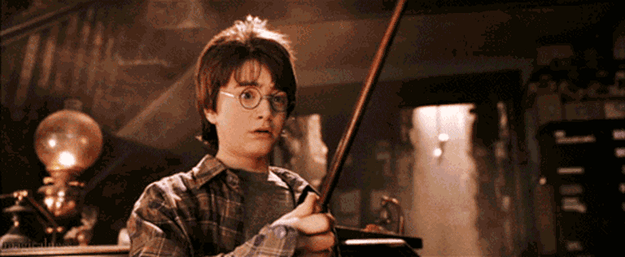

Every spell / tool has three critical components: the INPUT, the transformation, and the OUTPUT.
<br><br>
Take the simple act of multiplication. Feed it any two numbers, and it transforms them, producing a new number. For example, multiply 4 by 0, and you get 0.
<br><br>
Multiplication against zero might not seem like much... this can be used like a magic spell /tool to filter away certain information (Such as a spell to remove all color from an object but red).


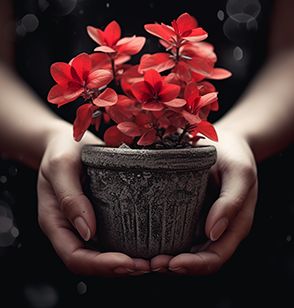

While humble of a spell, multiplication is at the root of much more complicated magic spells. Simple tools are the building blocks for more complex tools (including AI).
<br><br>
Picture setting off on an epic quest. At its close, you unlock the power to call upon a 'Binary Being'—a mystical entity that can grasp new spells just by watching. Imagine it could absorb every spell you've ever cast, decode their mysteries, and weave entirely new enchantments. What a remarkable ally that would be!



This marks the start of an extraordinary odyssey. Yet be warned: to summon this formidable ally, you must conquer a host of 'Technical Tormentors'. Each victory brings with it components essential to breathe life into the Binary Being—challenges so fierce they could scare off the faint-hearted. Only the brave will navigate through, collecting the mystical elements needed to animate this binary companion.

# Our first spell - Gradient descent

In [ ]:
# For a 'Binary Being' to perform astonishing feats, it must distinguish between the dreadful and the wonderful.
# A "gradient" is like a magical compass, a fundamental tool that points us toward hidden treasure.

# Imagine you are solving a puzzle to get one of the pieces to summon a Binary Being. You are tasked with making a flame as big as possible,
# and you only have a single knob that controls it. When you get the absolutely biggest flame, the treasure will unlock.

## Numpy Gradient Descent

In [ ]:
# Lets try that. We have a unknown / hidden function that we can sample from. lets find the local minima using the gradient as
# a tool to know which  direction to explore in.

# GOAL: Given input:  A function, find the x position that minimizes the Y value.

# STRAGEGY: Gradient Descent
    # INPUT: A starting position, and a function
    # PROCESS: Follow the slope the function until the slope is 0
    # OUTPUT: Output new positon.

In [ ]:
#@title Boilerplate import
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# @title Creating the hidden function (don't look!)

# Parameters for the hidden function.
hidden_params = np.random.rand(3)

# The hidden function is three sine waves added together.
# In real life you just have a dataset of samples and you wouldn't know how it was made
def sample_hidden_function(x):
    """Simulates a complex function by combining three sine waves."""
    return (
        np.sin(x * hidden_params[0]) +
        np.sin(x * hidden_params[2] * 2) * 0.2 +
        np.sin(x * hidden_params[2] * 3) * 0.2
    )

In [ ]:
#@title Gradient Descent
def gradient_descent(starting_x, learning_rate, objective_function):
    """
    Performs gradient descent to find the local minimum of an objective function.

    Args:
    starting_x (float):  The initial guess for the value of x where the minimum is located.
    learning_rate (float): This is how big of steps you take in any direction. Too large and you will shoot right past the answer, too small and you will never get to the right answer.
    objective_function (callable): The function to minimize.

    Returns:
    tuple: A pair of lists, (x_history, y_history), representing the trajectory of the descent.
    """
    current_x = starting_x + learning_rate * 0.0001  # Small nudge
    # Create a history of your guesses in time
    x_history = [starting_x, current_x]
    y_history = [objective_function(starting_x), objective_function(current_x)]

    for i in range(1000):
        gradient_nudge = -np.gradient(y_history, x_history)[-1] # The 'gradient' controls the magnitude and direction. Notice it's negative (we are looing for valley not hill this time)
    # Also notice we only care about the last result of the gradient. Technically we only need the last two x and y positions but here we keep all of them for displaying later
        scaled_gradient_nudge = gradient_nudge * learning_rate

        if abs(scaled_gradient_nudge) < 1e-5: # Stop looking if you found the local minima, where the gradient is close to 0
            print(f'Found local minima at: {current_x} after {i} iterations')
            break

        current_x += scaled_gradient_nudge
        x_history.append(current_x)
        y_history.append(objective_function(current_x))

    return x_history, y_history

# plt.scatter([*range(len(x_history)-7)],x_history[7:]) # To see how X changed over time
# plt.scatter([*range(len(y_history))],y_history) # To see how Y changed over time
# plt.scatter([*range(len(y_history))],np.gradient(y_history)) # To see how the gradient nudges changed over time

Found local minima at: -1.0614689281985843 after 68 iterations


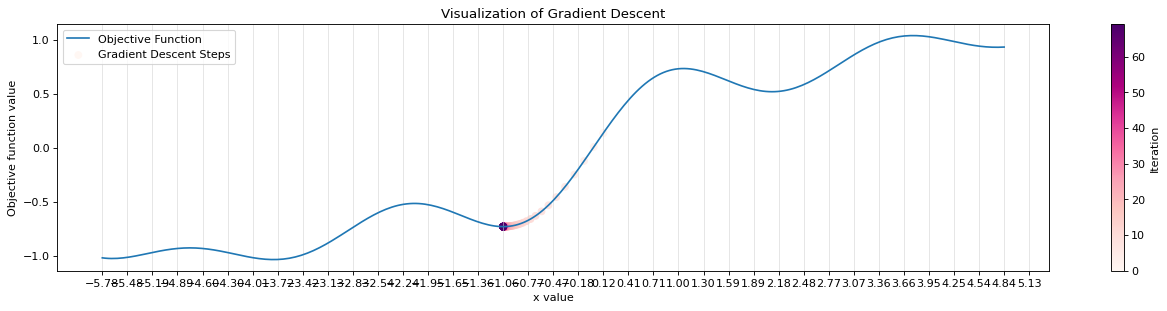

In [ ]:
#@title Visualization
def visualize_gradient_descent(x_history, y_history):
    """
    This function takes the historical positions of x and their corresponding y values
    from the gradient descent and plots them on a graph. It helps to illustrate the path
    taken by the algorithm to reach the local minimum.

    Args:
    x_history (list): The history of x values visited during the gradient descent.
    y_history (list): The history of y values (function evaluations) corresponding to x_history.
    """
    explored_range = max(x_history) - min(x_history)
    plot_min = min(x_history) - explored_range * 4
    plot_max = max(x_history) + explored_range * 4
    hidden_x = np.linspace(plot_min, plot_max, 300)
    hidden_y = np.apply_along_axis(sample_hidden_function, 0, hidden_x)

    plt.figure(figsize=(20, 4), dpi=80)
    plt.xticks(np.arange(plot_min, plot_max + 1, explored_range * 0.25))
    plt.plot(hidden_x, hidden_y, label='Objective Function')
    plt.scatter(x_history, y_history, c=np.arange(len(x_history)), cmap='RdPu', label='Gradient Descent Steps')
    plt.colorbar(label='Iteration')
    plt.grid(axis='x', color='lightgrey', linestyle='-', linewidth=0.5)
    plt.legend()
    plt.title('Visualization of Gradient Descent')
    plt.xlabel('x value')
    plt.ylabel('Objective function value')
    plt.show()

# Generate random parameters for the hidden function
hidden_params = np.random.rand(3)

# Define a starting point for gradient descent and a learning rate
starting_x = np.random.uniform(0, 10)
learning_rate = 0.1

# Run the gradient descent algorithm
x_history, y_history = gradient_descent(starting_x, learning_rate, sample_hidden_function)

# Visualize the trajectory of the gradient descent
visualize_gradient_descent(x_history, y_history)


In [ ]:
# QUESTION - You might have seen losses in models that go up locally even if it's going down globally. What would it ever go up?
# A - In real life when there are multiple variables, they are all connected to eachother in unpredictable ways. You make the best guess at that time and then correct. The variables are

## Jax

In [ ]:
# Jax is a software library designed for high-performance numerical computing and machine learning research. Its the language for AI systems currently most used at Google.

####Randomness

In [ ]:
#@title Boilter plate imports
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

Jax is funny about random number generation.
It doesn't do hidden states like hiding states like numpy where calling np.random.rand() will give you different results every time. With Jax, you need one extra step.

In [ ]:
#pseudo random number key generation
seed = jax.random.PRNGKey(0)
#Run this multiple times and see that the random variables generated won't change
print(jax.random.normal(seed, [1]))
print(jax.random.normal(seed, [1])) # Notice how the outputs are the same

[-0.20584226]
[-0.20584226]


In [ ]:
print(jax.random.normal(seed, [1]))
seed, _ = jax.random.split(seed) # Doing jax.random.split will give you a new response
print(jax.random.normal(seed, [1]))
print(jax.random.normal(seed, [1])) # But you have to keep running it, other wise the answers will still be the same


[-0.20584226]
[0.14389051]
[0.14389051]


In [ ]:
# You have to keep doing split to get new answers though:
for i in range(5):
  jax.random.uniform
  print(jax.random.normal(seed, [1]))
  seed, _ = jax.random.split(seed)

[0.14389051]
[0.8077484]
[-0.48762512]
[0.9686511]
[-1.9797853]


In [ ]:
# so that means that for all functions that need to create a random number, you NEED to pass the STATE as an argument

def not_random_function():
  seed = jax.random.PRNGKey(0)
  print(f'\t 1) {jax.random.normal(seed, [1])}')
  seed, _ = jax.random.split(seed)
  print(f'\t 2) {jax.random.normal(seed, [1])}')
print(f'Outputs of function first time:')
not_random_function()
print(f'Same outputs')
not_random_function()


def random_function(seed):  # At least one random seed needs to PASSED in to be abel to generate random numbers
                           # on the inside of the function.
  seed, _ = jax.random.split(seed)
  print(f'\t 1) {jax.random.normal(seed, [1])}')
  seed, _ = jax.random.split(seed)
  print(f'\t 2) {jax.random.normal(seed, [1])}')
  return seed
print(f'\n\nOutputs of function first time:')
seed = random_function(seed)
print(f'NEW RANDOM OUTPUTS')
seed = random_function(seed)


Outputs of function first time:
	 1) [-0.20584226]
	 2) [0.14389051]
Same outputs
	 1) [-0.20584226]
	 2) [0.14389051]


Outputs of function first time:
	 1) [-1.3754874]
	 2) [-0.9090381]
NEW RANDOM OUTPUTS
	 1) [0.14624894]
	 2) [-0.25774714]


In [ ]:
# This viral behavior is pretty annoying in that if you have a function deep in the code that needs
# a random number, all parent functions above it will need to pass this argument.

# Initialize the pseudo-random number generator (PRNG) with a seed value.
seed = jax.random.PRNGKey(0)

# Function 'a' is the top-level function that starts the chain of random number generation.
def a(seed):
  # It calls 'b', passing the PRNG seed down the call stack.
  seed = b(seed)
  return seed

# Function 'b' is an intermediate function that simply passes the seed further down.
def b(seed):
  seed = c(seed)
  return seed


# Function 'c' is where the random numbers are actually generated.
def c(seed):
  # Split the seed to get a new seed and update the PRNG state.
  seed, _ = jax.random.split(seed)
  # Generate a random number using the new seed and print it.
  print(f'\t 1) {jax.random.normal(seed, [1])}')
  # Split the seed again for a fresh PRNG state.
  seed, _ = jax.random.split(seed)
  # Generate another random number with the new seed and print it.
  print(f'\t 2) {jax.random.normal(seed, [1])}')
  return seed

# Call function 'a' with the initial seed, starting the random number generation process.

seed = a(seed)

# Call function 'a' again with the updated seed to see different random numbers.
seed = a(seed)


	 1) [0.14389051]
	 2) [0.8077484]
	 1) [-0.48762512]
	 2) [0.9686511]


## Gradient descent with Jax!

### Jax Gradient Descent

In [ ]:
# GOAL: Given input:  A function, find the x position that minimizes the Y value.

# STRAGEGY: JAX Gradient Descent
    # INPUT: A starting position, and a function
    # PROCESS: Follow the slope the function until the slope is 0
    # OUTPUT: Output new positon.

# CRITICAL STEPS:
# 1. Get a sample from dataset
# 2. Get gradient
# 3. Nudge current sampled position by gradient
# 4. Repeat steps 1-3 but with new X position

In [ ]:
#@title Updating our hidden function with Jax operations. Don't peek!

def create_new_hidden_function(seed):
    """
    Generates new hyperparameters for the hidden function using JAX's random module.
    This function is essential for simulating a scenario where we don't know the underlying
    function's parameters ahead of time.

    Args:
    seed: A JAX random number generator key.

    Returns:
    A tuple of (hyperparameters array, new random seed).
    """
    # Split the seed to generate new random values
    seed, new_seed = jax.random.split(seed) # we generate a new random number every time we use it
    # Generate three new random values between 0 and 1
    hidden_params = jax.random.uniform(new_seed, [3], minval=0, maxval=1)
    return hidden_params, seed

# The hidden function simulates the real-world process we aim to learn about.
# In a typical learning scenario, we would not know the exact form of this function.
def sample_hidden_function(x, hidden_params):
    """
    The hidden function that we are trying to optimize using gradient descent.
    It combines three sine waves with parameters defined by `hidden_params`.

    Args:
    x: Input value.
    hidden_params: Hyperparameters for the function.

    Returns:
    The output of the hidden function, simulating a real-world process.
    """
    # Combine three sine waves with varying amplitudes and frequencies
    y = jnp.sin(x * hidden_params[0]) + \
        jnp.sin(x * hidden_params[1] * 2) * 0.2 + \
        jnp.sin(x * hidden_params[2] * 3) * 0.2
    return y

In [ ]:
def gradient_descent(seed, hidden_params):
    """
    Performs gradient descent, a method to find the minimum of a function.

    Args:
    seed: A JAX random number generator key, used to start the descent from a random position.
    hidden_params: The hyperparameters of the hidden function we're optimizing against.

    Returns:
    A history of x positions and their corresponding y values as the descent progresses.
    """
    learning_rate = 0.5
    seed, new_seed = jax.random.split(seed) # Using what we learnt on jax randomization
    cur_x = jax.random.uniform(new_seed, [1], minval=0, maxval=10) # starting off in a random position between 0 and 10
    x_history = []  # Notice that unlike previous example, we don't need to initialize it with two samples to get a gradient, Jax handles this for us
    y_history = []  # Also unlike the numpy example, these history arrays are only for displaying, the grad function doesn't need the history

    # We are about to perform gradient descent in a single line which is MUCH simpler in Jax than in numpy in many ways
    # In numpy, you gave the gradient function: 1) two arrays of the history of positions as inputs.
    # BUT Each array had to have at least two items in it, so we had to initialize them. ALSO, After getting the
    # gradient, we needed to take the last item of the output array to specifically the get the gradient of the current position where we are.

    # In Jax, the inputs for the gradient are simply: 1) A *function* that you care about taking a gradient on, that outputs a single loss and 2) and the parameters that influence that function

    # BE CAREFUL the **first** argument of that function are the parameters you want to adjust**. Those parameters need to influence the result inside of this function.
    # However many parameters you input, are however many parameters it will predict / output.
    # In this case we give it an initial function, that given: an input of current X position, outputs a Y height (what we want to take a gradient on)

    #??? How does jax.grad do this? is it keep track of state of previous params vs current params?
    # Question: this is because AutoDiff (fancy algo) for tracing derrivate using chain rule

    # Notice also how grad takes in a FUNCTION. When grad_nudge is used later, it will pass through the parameters for that function

    # Jax.jit is a function to make things faster. It has to be created outside of the loop that is iterated many times over.

      # Precompile gradient function for efficiency using JIT
    grad_nudge = jax.jit(jax.grad(lambda x: sample_hidden_function(x, hidden_params)))

    for i in range(1000):
        scaled_gradient_nudge = grad_nudge(cur_x[0]) * learning_rate
        # Check for convergence, if gradient is very small
        if -0.0001 < scaled_gradient_nudge < 0.0001:  #This trick of finding local minima, gets trickier once you start having many many parameters
            print(f'!!!!! Found local minima at: {cur_x} after {i} iterations')
            break
        cur_x -= scaled_gradient_nudge  # Update position based on gradient
        x_history.append(cur_x)  # Update history
        y_history.append(sample_hidden_function(cur_x, hidden_params))

    return x_history, y_history

!!!!! Found local minima at: [8.868848] after 122 iterations


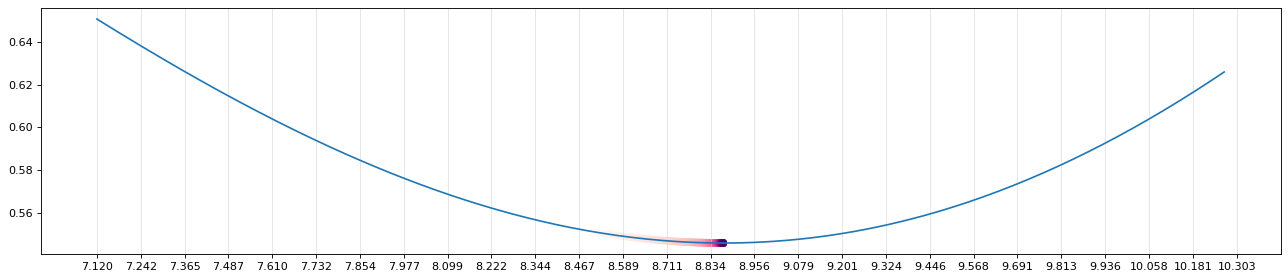

In [ ]:
#@title Now let's visualize it. Run it muliple times to see that it's not always the global minima
def visualize_gradient_descent(x_history, y_history, hidden_params):
    """
    Args:
    x_history: List of x positions visited by the gradient descent algorithm.
    y_history: List of corresponding y values for each x position.
    hidden_params: The hyperparameters used in the hidden function for reference.
    """
   #Let's reveal a bit more of the function around the explored area
    explored_range = max(x_history) - min(x_history)
    plot_min = min(x_history) - explored_range * 4
    plot_max = max(x_history) + explored_range * 4

    # Generate evenly spaced points to visualize the hidden function
    hidden_x = jnp.linspace(plot_min, plot_max, 300)
    hidden_y = jnp.apply_along_axis(lambda x: sample_hidden_function(x, hidden_params), 0, hidden_x)

    # Create the plot
    plt.figure(figsize=(20,4), dpi=80)
    plt.xticks(jnp.arange(plot_min[0], plot_max[0] + 1, explored_range[0] * 0.35))  #control the number of ticks in proportion to the range
    plt.plot(hidden_x, hidden_y)
    plt.scatter(x_history, y_history, c=jnp.arange(len(x_history)), cmap='RdPu')
    plt.grid(axis='x', color='lightgrey', linestyle='-', linewidth=0.5)
    plt.show()

# Usage
seed, _ = jax.random.split(seed)
hidden_params, seed = create_new_hidden_function(seed)
x_history, y_history = gradient_descent(seed, hidden_params)
visualize_gradient_descent(x_history, y_history, hidden_params)

## Sinusoidal Regression (single parameter) of a function using purely Gradient Descent

In [ ]:
# In the previous examples you could see that it would sometimes find a local minima and not global right?
# what's the big deal if it doesn't? Let's find out by trying to make two curves look similar

# GOAL: Get two curves to look the same by finding a value

# STRAGEGY: Use JAX Gradient Descent to find a parameter for a function
    # INPUT: A starting position, and a function
    # PROCESS: Follow the slope the function until the slope is 0
    # OUTPUT: Output new positon.


# GOAL: Given inputs: a function and a starting position
#  Given inputs: a starting position, and a function, output the nearest by position where the slope is 0. (Minimize the y value)

# WAIT...that sounds like the previous example, what is different?
#   Our 'function' has changed. Instead of  was from the loss of the network which we then took a gradient on, we used a single loss of the delta between current and previous position.
#   Instead of comparing two positions, we will compare two curves. The loss needs to be a single number, so we add a new function that tells us how different
#   the two curves are. Then we use that for the gradient of the network.

#   Previously the goal was to find the X position (a single value) that corresponded to the lowest Y value.
#   Now our new goal is to get two curves to look similar
#   The shape of these curves are controlled by a parameter, and we need to find it using gradient descent
#   We need a way to compute how much one curve 'looks' like the other one, this is the 'loss'

# STRATEGY:
# 1. sample_hidden_function( param, x_positions). returns y Pos
# 2. regression_loss (predicted_param, real_param, data ). This function returns loss
# 3. Get and apply gradient
# 4. Repeat all over again

In [ ]:
#@title Boilter plate imports
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

seed = jax.random.PRNGKey(0)

In [ ]:
#@title Our hidden function. Don't peek!

def sample_hidden_function(param, x_positions): # Let's make a hidden function from a randomly chosen frequency (param) of a sine wave
  y_positions = jnp.sin(x_positions * param * 2)
  return y_positions # So to recap, there is a sinewave whose frequency is defined by param, and given a set of X positions you can sample a set of Y positions

In [ ]:


def regression_loss(predicted_param, real_param, data): # inputs are two frequencies of sine waves, a set of x positions (data), and it returns a loss (how different they are)
  # How do we computationally evaluate if the curves look the same? well, we look at their relative Y positions
  # at the same intervals (the delta between curves, aka one minus another) and get the average wrongness.
  # ??? is this a good way to evaluate it the curves look the same???? Is that invariant to scale, and translation (not sure what rotation would be)
  predicted_positions = sample_hidden_function(predicted_param, data)
  ground_truth_positions = sample_hidden_function(real_param, data)
  return jnp.mean(jnp.square(predicted_positions - ground_truth_positions)) # This is called MSE. Mean Squared Error loss. Not sure why not use total error of deltas as a loss instead.

def gradient_descent(seed, learning_rate):
  seed, _ = jax.random.split(seed)
  hidden_param = jax.random.uniform(seed,[1],minval=2, maxval=3)[0] # the hidden number you are trying to learn in the end
  seed, _ = jax.random.split(seed)
  predicted_param= jax.random.uniform(seed,[1],minval=0, maxval=3)[0]
  x_positions = jnp.arange(0, jnp.pi*2,.1) # a set of ordered numbers from 0 to two pi in increments of .1
  pos_history = jnp.array([[predicted_param, regression_loss(predicted_param, hidden_param, x_positions )]]) # ONLY to be fancy with visualizations, not vital. Storing the predicted_param and Loss
  curve_hist = jnp.array([sample_hidden_function(predicted_param, x_positions)]) # ONLY to be fancy with visualizations, not vital. Storing what the curve looked like

  grad_nudge = jax.jit(jax.grad(regression_loss)) # jit is a funciton that compiles the code and makes it run MUCH faster. Make sure it's outside of the iterating function.
  iteration_limit = 3000 # Abort after this number of iterations

  for i in range(iteration_limit):
    scaled_gradient_nudge = grad_nudge(predicted_param, hidden_param, x_positions) * learning_rate # We take a gradient
    predicted_param-= scaled_gradient_nudge # update the predicted_param
    cur_loss = regression_loss(predicted_param, hidden_param, x_positions ) # evaluate the current loss
    if i % 100: # ONLY for visualization. Record data every N iterations
      pos_history = jnp.append(pos_history, jnp.array([[predicted_param, cur_loss]]), 0)
      curve_hist = jnp.append(curve_hist, jnp.array([sample_hidden_function(predicted_param, x_positions)]), 0 )
    if cur_loss < .0001: # note that here we KNOW that the global minimum is 0, but in most situations we wouldn't. We watch a loss, and pull the curve the progress slows down enough.
      print(f'Found global minima at: {float(predicted_param):.4f} after {i} iterations, seed: {seed} \n\n!!!\n!!!!!\nSUCCESS \n!!!!!\n!!!\n ')
      break
    if scaled_gradient_nudge < .00001 and scaled_gradient_nudge > -.00001:# checking slope of gradient. This is harder when you have more parameters.
      print(f'Stuck in local minima at predicted parameter: {float(predicted_param):.4f} after {i} iterations')
      break
    # if i%100 == 0:
    #   print(f'loss {float(cur_loss)}, iteration {i}, scaled_gradient_nudge: {scaled_gradient_nudge:.4f}, predicted_param {float(predicted_param)}')
    if i == iteration_limit-1:
      print(f'Stopped because of iteration limit')
  print(f'hidden parameter is : {hidden_param:.4f}')
  return seed, pos_history, hidden_param, curve_hist

Stuck in local minima at predicted parameter: 1.3337 after 200 iterations
hidden parameter is : 2.9525

 The goal is to get the orange line to look like the blue line


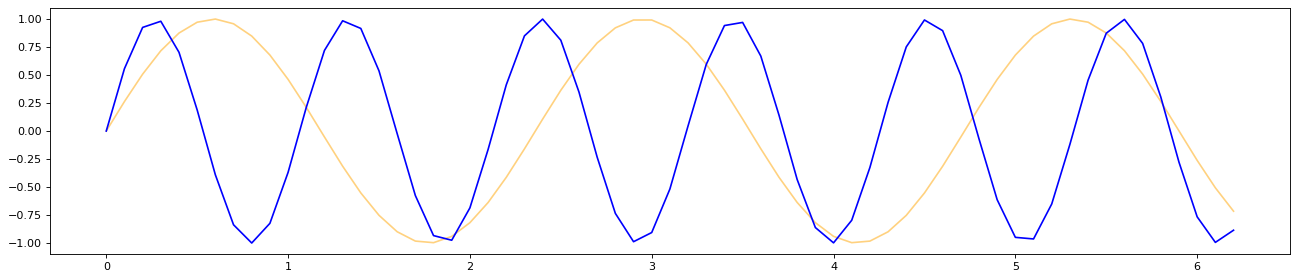


 In this graph X is the infinite possible frequencies, Y is the loss, and the purple dots are where we explored
hidden parameter is : 2.9525


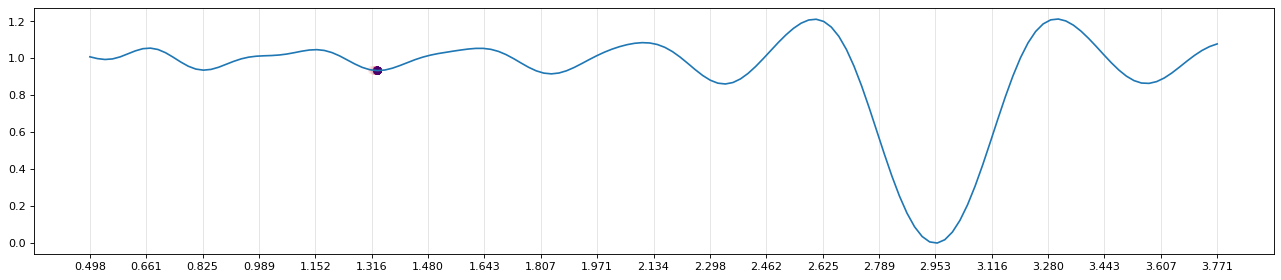

In [ ]:
#@title Visualize. Run multiple times to explore minimas.
# The visualization code is just as large as the other. Feel free to skip.

# Since we know range explored, and we know global minima. Let's show what the loss surface looks like and the area we explored via gradient descent.
def visualize_gradient_descent(pos_history, hidden_param, curve_hist):
  # plot the original curve (blue), and the animated alpha predicted curve (orange)
  plt.figure(figsize=(20,4), dpi=80)
  for idx, val in enumerate(curve_hist): # The animated (in alpha) orange curve
    if idx % 100 == 0 :
      plt.plot(jnp.arange(0,jnp.pi*2,.1), curve_hist[idx], color='orange', alpha= idx/len(curve_hist))
  plt.plot(jnp.arange(0,jnp.pi*2,.1), sample_hidden_function(hidden_param, jnp.arange(0,jnp.pi*2,.1)),color='blue') #this is the original curve (blue)
  print(f'\n The goal is to get the orange line to look like the blue line')
  plt.show()

  # Let's reveal a bit more of the loss surface around the explored area by evenly sampling between the global minima and explored range
  min_max_array = jnp.array([pos_history[:,0].min(), pos_history[:,0].max()])
  farthest_border = min_max_array[jnp.abs(min_max_array - hidden_param).argmax()] # Find furthest away border from the hidden Parameter
  borders = jnp.array((farthest_border, hidden_param))
  plot_range = borders.max() - borders.min()
  plot_min = borders.min() - plot_range * .5 # expand a bit outside of border to understand loss surface.
  plot_max = borders.max() + plot_range * .5
  hidden_x = jnp.linspace(plot_min,plot_max,150)
  hidden_y = jnp.array([regression_loss(jnp.array([z]), hidden_param, jnp.arange(0, jnp.pi*2,.1)) for z in hidden_x]) # Sample the Y values of this new range
  print(f'\n In this graph X is the infinite possible frequencies, Y is the loss, and the purple dots are where we explored')
  print(f'hidden parameter is : {hidden_param:.4f}')
  plt.figure(figsize=(20,4), dpi=80)
  plt.xticks(np.arange(plot_min, plot_max+1, plot_range * .1)) # control the number of ticks in proportion to the range
  plt.plot(hidden_x, hidden_y)
  plt.scatter(pos_history[:,0], pos_history[:,1], c = jnp.arange(len(pos_history[:,0])) ,cmap='RdPu')
  plt.grid(axis = 'x', color='lightgrey', linestyle='-', linewidth=.5)

learning_rate = .001
seed, pos_history, hidden_param, curve_hist = gradient_descent(seed,learning_rate)
visualize_gradient_descent(pos_history, hidden_param, curve_hist)

###Visualization of how predicted curve changes over time

In [ ]:
import plotly.express as px
curve_hist = curve_hist[::len(curve_hist)//100] # reduce the number of iterations to display to 100
x = np.tile(jnp.arange(0,jnp.pi*2,.1),curve_hist.shape[0])
y = curve_hist.flatten()
animation_frame = np.tile(np.arange(0,curve_hist.shape[0],1.)[:,np.newaxis],curve_hist.shape[1]).flatten()
fig = px.line(x= x ,y=y, animation_frame=animation_frame , animation_group= x)
fig.update_layout(width=1100, height=400)
fig.show()


Here we come to a important conclusion... It's really hard to find the global minima. But then how do ML algorithms work??? It might seem as problems that we use ML system to solve, are super high dimensional, and that just as long as the parameters are "dependent" on eachother (think of how a modifier key on a keyboard changes the meaning on all other keys, they influence eachother), that as ONE of them is not stuck, that they will pull all the other parameters into better minimas (pull strong enough to covercome small hills)

## Two parameter gradient descent (3D gradient descent)

Before we move on to seeing algorithms that solve this problem, let's first see what problems with two hidden variables look like. The loss curve is a 3D surface!

In [ ]:
# GOAL - Find the X and Y positions that give the lowest Z result.

# 1) Create a function that given params + x,y position, it can tell you z height
# 2) Get a gradient on that function
# 3) Nudge positions
# 4) Do it all over again
# BONUS - could we set it up in a way where you can dynamically update the number of dimensions you are predicting the local minima in?

In [ ]:
#@title Boilter plate imports
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [ ]:
#@title Our hidden function. Don't peek!

# We create a 3D noisy surface using a bunch of sine waves added together
def sample_hidden_function(params, hidden_params): #Given inputs of 'params' (the *current* X/Y positions) and  'hidden_params' (the hyper-parameters for the hidden function (constant)), output the z value
  zPos = (jnp.sin(hidden_params[0] * params[0] * .8) + jnp.sin(hidden_params[0] * params[0] * 2) * .2 + jnp.sin(hidden_params[0] * params[0] * 3) * .2) * (jnp.sin(hidden_params[1] * params[1] * .8) + jnp.sin(hidden_params[1] * params[1] * 2) * .2 + jnp.sin(hidden_params[1] * params[1] * 3) * .2)
  return zPos

seed = jax.random.PRNGKey(0)

In [ ]:
def gradient_descent(seed):
  learning_rate = 1.
  seed, _ = jax.random.split(seed)
  hidden_params = jax.random.uniform(seed,[2],minval=0, maxval=1)
  seed, _ = jax.random.split(seed)
  params = jax.random.uniform(seed,[2],minval=0, maxval=1)
  pos_history = []

  grad_nudge = jax.jit(jax.grad(sample_hidden_function)) # Notice that here we aren't directly passing the function with aguments, ie: jax.jit(jax.grad(samplePosition(params))), but instead only the function.
                                                      # Later when grad_nudge is called it will require to pass through the parameters for the function it's subsuming.

  for i in range(500):
    scaled_gradient_nudge = grad_nudge(params,hidden_params) * learning_rate
    params -= scaled_gradient_nudge
    cur_loss = sample_hidden_function(params, hidden_params)
    pos_history.append([params[0].tolist(), params[1].tolist(), cur_loss.tolist()])
    if i%50 == 0:
      print(f'loss {float(cur_loss)}, iteration {i}, nudge = {scaled_gradient_nudge}, sumNudge: {scaled_gradient_nudge.sum():.4f}')
      if np.sum(np.abs(scaled_gradient_nudge)) < .0001:
        print(f'!!!!! Found local minima at: {params} after {i} iterations, seed: {seed}')
        break
  print(f'DONE!')
  return pos_history, seed, hidden_params



In [ ]:
#@title Visulize - Run many times to see different gradient descents

# Most of this complexity comes from neatly framing the graph around the positions that gradient descent traveled
def visualize_gradient_descent(pos_history, hidden_params):
  loss_landscape_resolution = 20. # How finely do you want to sample the 3D loss surface?
  loss_landscape_buffer = 3 # How much of the neighboring loss surface do you want to show?
  pos_history = np.array(pos_history)
  x_centroid = (pos_history[:,0].max() + pos_history[:,0].min()) / 2.
  y_centroid = (pos_history[:,1].max() + pos_history[:,1].min()) / 2.
  x_range = abs(pos_history[:,0].max() - pos_history[:,0].min()) * loss_landscape_buffer
  y_range = abs(pos_history[:,1].max() - pos_history[:,1].min()) * loss_landscape_buffer
  x_plot_min = x_centroid - x_range
  x_plot_max = x_centroid + x_range
  y_plot_min = y_centroid - y_range
  y_plot_max = y_centroid + y_range
  print(f'{x_plot_min, x_plot_max, y_plot_min, y_plot_max}')
  yy, xx = np.mgrid[y_plot_min:y_plot_max:(y_range)/loss_landscape_resolution, x_plot_min:x_plot_max:(x_range)/loss_landscape_resolution]
  zz = sample_hidden_function([xx, yy], hidden_params)
  fig = go.Figure(data=[go.Scatter3d(x= pos_history[:,0], y= pos_history[:,1], z= pos_history[:,2] , mode='lines', line=dict(color=pos_history[:,2],width=15, colorscale = 'OrRd_r')), go.Surface(z=zz, x=xx, y=yy, colorscale = 'speed_r', opacity = .9)])
  fig.update_layout(autosize=False, width=450, height=450, margin=dict(l=10, r=10, b=10, t=10)) # reduce white margins around 3D renderer
  fig.show()
pos_history, seed, hidden_params = gradient_descent(seed)
visualize_gradient_descent(pos_history, hidden_params)


loss -0.04220593348145485, iteration 0, nudge = [0.32831675 0.06402821], sumNudge: 0.3923
loss -0.8833805918693542, iteration 50, nudge = [ 2.9802322e-08 -8.7902002e-04], sumNudge: -0.0009
loss -0.8833833932876587, iteration 100, nudge = [ 2.9802322e-08 -2.6760945e-06], sumNudge: -0.0000
!!!!! Found local minima at: [-1.8409345  3.7090945] after 100 iterations, seed: [2384771982 3928867769]
DONE!
(-6.10489895939827, 4.128615707159042, -6.232287257909775, 10.810081511735916)


# Two param Sinusoidal regression


In [ ]:
#@title Boilter plate imports
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

seed = jax.random.PRNGKey(0)

hidden params [0.9605205059051514, 0.4767322540283203]
starting params [0.38593602180480957, 1.8654558658599854]
loss 1.5179070234298706, iteration 0, params [0.3385201 1.8471024], hidden_params [0.9605205  0.47673225]
loss 0.34980836510658264, iteration 100, params [0.32415208 0.81223416], hidden_params [0.9605205  0.47673225]
loss 0.15357916057109833, iteration 200, params [0.33530292 0.38194844], hidden_params [0.9605205  0.47673225]
loss 0.12023547291755676, iteration 300, params [0.34476772 0.20495902], hidden_params [0.9605205  0.47673225]
loss 0.1147693619132042, iteration 400, params [0.35057977 0.13351867], hidden_params [0.9605205  0.47673225]
loss 0.11389990895986557, iteration 500, params [0.35372746 0.10512513], hidden_params [0.9605205  0.47673225]
loss 0.11376333236694336, iteration 600, params [0.35536206 0.0939224 ], hidden_params [0.9605205  0.47673225]
loss 0.11374185979366302, iteration 700, params [0.35617632 0.08950754], hidden_params [0.9605205  0.47673225]
loss 

<ipython-input-46-6cd21e1e1c4a>:72: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.



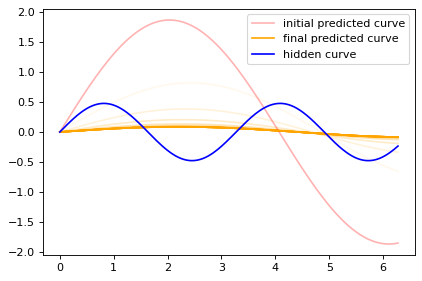

hidden params [0.9605205059051514, 0.4767322540283203]


In [ ]:
def sample_hidden_function(params, x_pos): # Let's make a funciton made up a sine wave with variable frequency and amplitude
  # sin(x_pos * freq) * amp + offset
  frequency = params[0]
  amplification = params[1]
  y_pos = jnp.sin(x_pos * frequency * 2) * amplification #+ offset
  return y_pos

def regression_loss(params, real_values):
  # How do we computationally evaluate if the curves look the same? well, we look at their relative Y positions
  # at the same intervals (the delta between curves, aka one minus another) and get the average wrongness.
  # ??? is this a good way to evaluate it the curves look the same???? Is that invariant to scale, and translation (not sure what rotation would be)
  # ??? what if you has very positive values, and very negative values, the mean could incorrectly / accidentally look the perfect answer. Is this an issue? Why not total delta
  sample_hidden_function_jit = jax.jit(sample_hidden_function)
  predictedValues = sample_hidden_function_jit(params, jnp.arange(0, jnp.pi*2,.025))
  return jnp.mean(jnp.square(predictedValues - real_values))

def gradient_descent(seed):
  learning_rate = .01
  seed, _ = jax.random.split(seed)
  hidden_params = jax.random.uniform(seed,[2],minval=0, maxval= 2)
  print(f'hidden params {hidden_params.tolist()}')
  seed, _ = jax.random.split(seed)
  params = jax.random.uniform(seed,[2],minval=0, maxval= 2)
  print(f'starting params {params.tolist()}')
  x_pos = jnp.arange(0, jnp.pi * 2, .025)
  pos_history = []
  grad_nudge = jax.jit(jax.grad(regression_loss))
  sample_hidden_function_jit = jax.jit(sample_hidden_function)
  real_values = sample_hidden_function_jit(hidden_params, x_pos)
  curve_hist = jnp.empty((0,len(real_values)))

  for i in range(6000):
    predicted_y_values = sample_hidden_function_jit(params, x_pos)
    scaled_gradient_nudge = grad_nudge(params, real_values) * learning_rate
    params -= scaled_gradient_nudge
    cur_loss = regression_loss(params, real_values)

    # For stopping early if possible
    if cur_loss < .000001: # note that here we KNOW what the global minimum is, but in most situations we wouldn't
      print(f'SUCCESS Found global minima at: {params.tolist()} after {i} iterations, seed: {seed} \n\n SUCCESS \n\n ')
      break
    # if jnp.sum(jnp.abs(scaled_gradient_nudge)) < .0001:
    #   print(f'!!!!! Found local minima at: {params.tolist()} after {i} iterations')
    #   break
    if i%100 == 0:
      print(f'loss {float(cur_loss)}, iteration {i}, params {params}, hidden_params {hidden_params}')
      # Keeping history for visualizations
      curve_hist = jnp.append(curve_hist, jnp.array([predicted_y_values]), 0 )
      pos_history.append([params[0].tolist(), params[1].tolist(), cur_loss.tolist()])
      # Taking a window average to see if loss is stuck
      if jnp.isclose(jnp.mean(jnp.array(pos_history)[:,2][-6:-3]), jnp.mean(jnp.array(pos_history)[:,2][-3:]), atol=.00000001):
        print(f'\n\n FLAT GRADIENT - FAILED - After {i} iterations, not progressing!! \n\n  ')
        break
  if cur_loss > .0001:
    print(f'FAILED...')
  print(f'hidden params {hidden_params.tolist()}')
  print(f'End params {params.tolist()}')
  return hidden_params, pos_history, curve_hist, seed

hidden_params, pos_history, curve_hist, seed  = gradient_descent(seed)

def visualize_gradient_descent(pos_history, curve_hist, hidden_params):
  pos_history = np.array(pos_history)
  x_pos = jnp.arange(0, jnp.pi * 2, .025) # Unlike daniel's example, our x sampling is even instead of random.
  sample_hidden_function_jit = jax.jit(sample_hidden_function)
  real_values = sample_hidden_function_jit(hidden_params, x_pos)

  # plot the real curve (blue), and the animated alpha predicted curve (orange), starting predicted curve (red)
  plt.figure(figsize=(6,4), dpi=80)
  for idx, val in enumerate(curve_hist): # The animated (in alpha) orange curve
    if idx % len(curve_hist) // 20 == 0 :
      plt.plot(x_pos, curve_hist[idx], 'r-',color='orange', alpha= idx/len(curve_hist))
  plt.plot(x_pos, curve_hist[0], color='red',alpha= .3, label='initial predicted curve') # show is the original predicted curve (red)
  plt.plot(x_pos, curve_hist[-1], color='orange', label='final predicted curve') # show is the original predicted curve (orange)
  plt.plot(x_pos, real_values, color='blue', label='hidden curve') # show is the hidden / true curve (blue)
  plt.legend()
  plt.show()

  # visulize 2d loss curve
  # fig2 = px.line(pos_history[:,2], title='2D Loss Curve')
  # fig2.update_layout(width=800, height=500)
  # fig2.show()

  # visualize 3D loss surface
  loss_landscape_resolution = 20.
  loss_landscape_buffer = 10
  x_centroid = (pos_history[:,0].max() + pos_history[:,0].min()) / 2.
  y_centroid = (pos_history[:,1].max() + pos_history[:,1].min()) / 2.
  x_range = abs(pos_history[:,0].max() - pos_history[:,0].min()) * loss_landscape_buffer
  y_range = abs(pos_history[:,1].max() - pos_history[:,1].min()) * loss_landscape_buffer
  x_plot_min = x_centroid - x_range
  x_plot_max = x_centroid + x_range
  y_plot_min = y_centroid - y_range
  y_plot_max = y_centroid + y_range
  yy, xx = jnp.mgrid[y_plot_min:y_plot_max:(y_range)/loss_landscape_resolution, x_plot_min:x_plot_max:(x_range)/loss_landscape_resolution,]
  zz = []
  for y in yy[:,0]:
    for x in xx[0]:
      zz.append(regression_loss(jnp.array([x,y]),real_values).tolist())
  zz = jnp.array(zz).reshape(xx.shape[0],xx.shape[1])
  print(f'hidden params {hidden_params.tolist()}')
  fig = go.Figure(data=[go.Scatter3d(x= pos_history[:,0], y= pos_history[:,1], z= pos_history[:,-1] , mode='lines', line=dict(color=pos_history[:,-1],width=15, colorscale = 'OrRd_r')), go.Surface(z=zz, x=xx, y=yy, colorscale = 'speed_r', opacity = .9)])
  fig.update_layout(width=300, height=300, margin=dict(l=10, r=10, b=10, t=10))
  fig.show()
visualize_gradient_descent(pos_history, curve_hist, hidden_params)


#Neural Networks


Before jumping into Neural Networks, let's first refresh some math that will be critical for understanding them.


## Linear Algebra / Matrix math refresh

Boilerplate for this section

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

### Vectors

Vectors, are traditionally written in arrays where the first number is x and the second is y:

In [ ]:
a = np.array([3.0,1.0])

# visualuzation
fig = px.scatter(x = [a[0]], y = [a[1]], range_x=[0,4], range_y=[0,2])
fig.update_layout(autosize=False, width=250, height=250,margin=dict(l=10, r=10, b=10, t=55))
fig.show()

These vectors live in a coordinate space. Normally it's a catesian coordinate whose basis vectors are perpendicular (facing 90 deg to eachother ) and unit vectors (magnitude of 1). This makes them linearly independent (To describe where this point lies on the coordinate space, you only need to pay attention to one axis at a time)

In [ ]:
fig = go.Figure(data=[go.Scatter(name = 'x', x=[0,0], y=[0,1],marker=dict(symbol="arrow-up",size=[0,15])),go.Scatter(name = 'y', x=[0,1], y=[0,0],marker=dict(symbol="arrow-right",size=[0,15])),])
fig.update_layout(autosize=False, width=250, height=250, xaxis = dict(autorange = False, range = (-.2,1.5), title = 'x'), yaxis = dict(autorange = False, range = (-.2,1.5), title = 'y'),margin=dict(l=10, r=10, b=10, t=55))
fig.show()

###Visualizing lower dimensional vectors in higher dimensional spaces

#### 1D Scalar x 2D Vector multiplication

In [ ]:
#You are streching out a 2D vector by the magnitude of the 1D vector
a = np.array([3.0,1.0]) # INPUT - 2D Vector A
b = np.array([2.0]) # INPUT - 1D Vector B
c = a * b #Output = 2D Vector C
data = np.concatenate(([a],[np.pad(b,(0,1))],[c]),axis=0)
fig = px.scatter(x = data[:,0], y = data[:,1] ,range_x=[0,8], range_y=[0,3], color=['a','b','c'], size = [1,1,1], size_max=10)
fig.update_layout(autosize=False, width=250, height=250,margin=dict(l=10, r=10, b=10, t=55))
fig.show()

#### 1D Scalar x 3D Vector multiplication

In [ ]:
#You are streching out a 2D vector by the magnitude of the 1D vector
a = np.array([3.0,3.0,2.0]) # INPUT - 2D Vector A
b = np.array([2.0]) # INPUT - 1D Vector B
c = a * b #Output = 2D Vector C
data = np.concatenate(([a],[np.pad(b,(0,2))],[c]),axis=0)
fig = px.scatter_3d(x = data[:,0], y = data[:,1], z = data[:,2], color=['a','b','c'], range_x = [0,10], range_y = [0,10], range_z = [0,10])
fig.update_layout(autosize=False, width=250, height=250,margin=dict(l=10, r=10, b=10, t=55), scene = dict(aspectmode="cube",xaxis=dict(nticks = 5), yaxis=dict(nticks = 5), zaxis=dict(nticks = 5)))
fig.show()

In [ ]:
#You are streching out a 2D vector by the magnitude of the 1D vector
origin = np.zeros(3)
a = np.array([3.0,3.0,2.0]) # INPUT - 2D Vector A
b = np.array([2.0,-1.0,1]) # INPUT - 1D Vector B
c = a * b #Output = 2D Vector C
data = np.concatenate(([origin],[a],[b],[c]),axis=0)
fig = px.scatter_3d(x = data[:,0], y = data[:,1], z = data[:,2], color=['origin','a','b','c'], range_x = [-10,10], range_y = [-10,10], range_z = [-10,10])
fig.update_layout(autosize=False, width=250, height=250,margin=dict(l=10, r=10, b=10, t=55), scene = dict(aspectmode="cube",xaxis=dict(nticks = 5), yaxis=dict(nticks = 5), zaxis=dict(nticks = 5)))
fig.show()

#### 2D Vector + 2D vector addition

**Tip to Tail** - Take both vectors and add their corresponding dimensions. One way to visualize it is the tip to tail method (this visualization is one of the few situations in which we allow the vector to leave the origin)

In [ ]:
a = np.array([3.0,1.0]) # INPUT - Vector A
b = np.array([.5,1.0]) # INPUT - Vector B
c = a + b # OUTPUT - Vector C
data = np.concatenate(([a],[b],[c]),axis=0)
fig = px.scatter(x = data[:,0], y = data[:,1] ,range_x=[0,4], range_y=[0,4], color=['a','b','c'], size = [1,1,1], size_max=10)
fig.update_layout(autosize=False, width=250, height=250,margin=dict(l=10, r=10, b=10, t=55))
fig.show()

### 2D Vector x 2D vector multiplication (unusual)

Take both vectors and multiply their corresponding dimensions

In [ ]:
a = np.array([3.0,2.0]) # INPUT - 2D Vector A
b = np.array([.5,6.0]) # INPUT - 2D Vector B
c = a * b # OUTPUT - 2D Vector C
print(f'c: {c}')
data = np.concatenate(([a],[b],[c]),axis=0)

fig = px.scatter(x = data[:,0], y = data[:,1], color=['a','b','c'], size = [1,1,1], size_max=10)
fig.update_layout(autosize=False, width=250, height=250,margin=dict(l=10, r=10, b=10, t=55))
fig.show()

c: [ 1.5 12. ]


### Dot Product / vector-vector multiplication

If vectors A and B are 'unit' vectors (magnitude = 1), dot product are 'magic spells' (functions) that tells you how similar the direction (angle) of those two vectors are in range from -1 to 1.

1 = same direction
0 = perpendicular
-1 = opposite direction

Dot product is sometimes called a scalar product because it doesn't return a vector, but a scalar instead.

test

In [ ]:
a = np.array([2,2])
# a = np.array([0.707106781,0.707106781])
b = np.array([4,0])

b_mag = np.linalg.norm(b)
c = a.dot(b) / b_mag
c / b_mag

np.cos(np.pi*.25)

# fig = px.scatter(x = [c[0]], y = [c[1]],range_x=[0,4],range_y=[0,2])
# fig.update_layout(autosize=False, width=250, height=250, xaxis = dict(autorange = False, range = (-.2,1.5), title = 'x'), yaxis = dict(autorange = False, range = (-.2,1.5)), margin=dict(l=10, r=10, b=10, t=55))
# fig.show()

0.7071067811865476

#### Scalar Projection

The scalar magnitude of the projection of A unto B

In [ ]:
np.sqrt(6**2 + 13**2)

14.317821063276353

In [ ]:
np.cos(np.pi*(1/4))
np.sin(np.pi*(1/4))

0.7071067811865475

In [ ]:
a = np.array([1,1])
# a = np.array([0.7071067811865475,0.7071067811865475])
b = np.array([3,1])
# b = np.array([0.8660254037844387,0.49999999999999994])
a_mag =np.linalg.norm(a)
b_mag = np.linalg.norm(b)
c = a.dot(b)/a_mag
c
# np.linalg.norm(c)
data = np.concatenate(([a],[b],[np.pad([c],(0,1))]),axis=0)
# data = np.concatenate(([a],[b],[np.pad([c],(0,1))]),axis=0)

fig = px.scatter(x = data[:,0], y = data[:,1], color=['a','b','c'], size = [1,1,1], size_max=8,range_x=[0,4],range_y=[-.2,4])
fig.update_layout(autosize=False, width=250, height=250,margin=dict(l=10, r=10, b=10, t=55))
fig.show()
# fig = px.scatter(x = [c[0]], y = [c[1]],range_x=[0,4],range_y=[0,2])
# fig.update_layout(autosize=False, width=250, height=250, xaxis = dict(autorange = False, range = (-.2,1.5), title = 'x'), yaxis = dict(autorange = False, range = (-.2,1.5)), margin=dict(l=10, r=10, b=10, t=55))
# fig.show()

## Matrices


###Intro

Matrices, are a version of vectors that have multiple columns. \

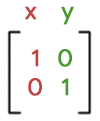

Matrices can apply linear transformations (rotate, shear, scale, translate).

This example above is an identity matrix, which means when applied unto some points it don't move them.

One might rightly ask...why do identity matrices use 1 and 0s???

When you 'matrix multiply' against this matrix the 0s and 1s act as 'magic spells' (functions) that either prevent numbers from flowing through (using 0), allow the numbers to flow through unchanged (value of 1), or scale them (any number other than 0 or 1).

So... if you saw something like this: \
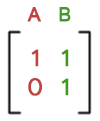

These two basis vectors A and B are not orthonormal. So if you want to calculate the final X dimension of a point, you will also need to consider BOTH the A and B dimension (vs just one)

One might wonder, what is matrix multiplcation really doing?? and where does that funky convention of multiplying and adding a bunch of numbers in strange ways come from??

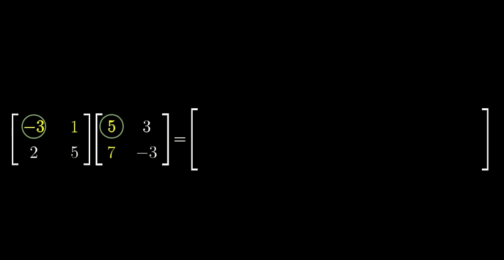

Well, it comes from the fact that matrix are linear transformations, they move data from one place to another.\
To figure out where the data lands, you take the basis vectors scale them by the numbers in the input, and then add the results per each axis back to back to get the answer:

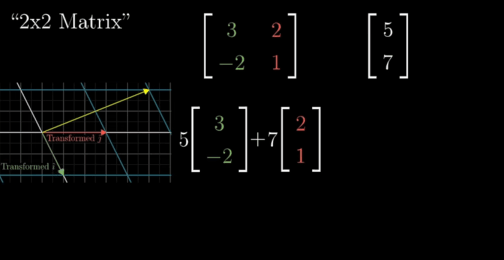

When you are applying a matrix by using 'matrix multiplication', you are doing a dot product per axis.

THINGS TO CONTRINUE EXPLORING
*   Visualizing what a mat_mult is doing when changing dimensions.
  * Notice that you can reduce dimensionality not just by multiplying by a smaller matrix, but also by  making one of the basis vectors align with another


In [ ]:
point_3D = np.random.rand(1,3)
fig = px.scatter_3d(x = point_3D[:,0], y=point_3D[:,1], z =point_3D[:,2])
fig.update_layout(autosize=False, width=450, height=450, margin=dict(l=5, r=5, b=5, t=5))
fig.show()
print(point_3D)


[[0.51220172 0.55501494 0.89534314]]


A critical aspect of neural networks is dealing with matrix multiplication.

Matrix muliplication does two critical aspects: \
1) It linearly transforms data (rotates, scales, translates, shear)\
2) It has the potential to change / flatten the number of dimensions on the data

### Visualizing linear transformation of matrix multiplication

In [ ]:
a = np.random.uniform(0,1,(2))
b = np.random.uniform(0,1,(2))
c = a@b
print(f'a: {a}')
print(f'b: {b}')
print(f'c: {c}')

a: [0.74594019 0.09718311]
b: [0.65268732 0.10366672]
c: 0.49694035775500933


In [ ]:
a = np.array([1.0,1.0])
#a.shape
b = np.array([0.,1.])
#b.shape
# b = np.array([2.])
c = np.dot(a,b) # read as A unto B
c
# c * np.linalg.norm(b)

# c = a@b.T
# c = np.pad([c],(0,1))
# fig = px.scatter(x = [a[0]], y = [a[1]],range_x=[0,15],range_y=[0,15])
# fig.add_trace(px.scatter(x = [c[0]], y = [c[1]]).data[0])
# fig.update_layout(autosize=False, width=450, height=450,margin=dict(l=10, r=10, b=10, t=55), xaxis = dict(nticks=16), yaxis = dict(nticks=16))
# fig.show()

1.0

In [ ]:
a = np.array([3.0,2.0])
#a.shape
b = np.array([4.,1.])
#b.shape
# b = np.array([2.])
c = a@b.T
c
fig = px.scatter(x = [a[0]], y = [a[1]],range_x=[0,15],range_y=[0,15])
fig.add_trace(px.scatter(x = [c.item()], y = [c.item()]).data[0])
fig.update_layout(autosize=False, width=450, height=450,margin=dict(l=10, r=10, b=10, t=55), xaxis = dict(nticks=16), yaxis = dict(nticks=16))
fig.show()

In [ ]:
a = np.array([3.0,1.0])
#a.shape
# b = np.array([4.,1.])
#b.shape
b = np.array([[1., .5],
              [0., 1.]])
# b = np.array([2.])
c = a@b.T
c
fig = px.scatter(x = [a[0]], y = [a[1]],range_x=[0,15],range_y=[0,15])
fig.add_trace(px.scatter(x = [c[0]], y = [c[1]]).data[0])
fig.update_layout(autosize=False, width=450, height=450,margin=dict(l=10, r=10, b=10, t=55), xaxis = dict(nticks=16), yaxis = dict(nticks=16))
fig.show()

In [ ]:
np.sqrt(2**2+2**2)

2.8284271247461903

In [ ]:
# Generate random 3D points, apply matrix transformation, show animation of it
import plotly.express as px
import numpy as np
import pandas as pd

def vis_mat_mult(input_matrix, transformation_matrix, interp_resolution = 9,  normalize = False):
  def normalize_mat(v): # we use this to optionally make the matrix interpolation purely translation and rotation
      norm = np.linalg.norm(v)
      if norm == 0:
        return v
      return v / norm

  num_points= len(input_matrix)
  anim_frames = interp_resolution + 2 # number of animation frames
  points = np.tile(input_matrix,(anim_frames,1,1)) #  repeats it by desired number of interpolation frames.
  eye = np.eye(3)
  interp_step = 1/(interp_resolution+1)

  for frame_idx, frame_val in enumerate(points): # frame by frame apply interpolated matrix
    interp_val = frame_idx * interp_step
    interp_mat = (transformation_matrix - eye) * interp_val + eye # create interpolated matrix
    interp_mat = interp_mat.T
    if normalize:
      interp_mat = np.array([normalize_mat(row) for row in interp_mat])
    points[frame_idx] = frame_val @ interp_mat

  # shaping in a way that dataframe can ingest
  xx = points[:,:,0].flatten()
  yy = points[:,:,1].flatten()
  zz = points[:,:,2].flatten()
  anim_frame = np.repeat(np.linspace(1,anim_frames, anim_frames),num_points)
  anim_group = np.tile(np.linspace(0,anim_frames, num_points),anim_frames)
  data_zip = list(zip(xx, yy, zz, anim_frame, anim_group))
  pf = pd.DataFrame(data_zip, columns=['xx','yy','zz', 'anim_frame', 'anim_group'])

  #visualizing it using Plotly
  points_min = np.min(points)
  points_max = np.max(points)
  fig = px.scatter_3d(pf, x = 'xx', y = 'yy', z = 'zz', animation_frame='anim_frame', color = 'anim_group', range_x=[points_min, points_max], range_y=[points_min, points_max], range_z=[points_min, points_max], )
  fig.update_layout(autosize=False, width=450, height=450, margin=dict(l=5, r=5, b=5, t=5), scene = dict(aspectmode="cube",xaxis=dict(nticks = 5), yaxis=dict(nticks = 5), zaxis=dict(nticks = 5)), coloraxis_showscale=False)
  # fig.update_traces(marker={'opacity': .9})
  fig.show()

num_points = 10

print(np.linspace(1,24,24).reshape(2,3,4))
print(np.linspace(1,24,24).reshape(2,3,4).T)

print(np.linspace(1,6,6).reshape(2,3))
print(np.linspace(1,6,6).reshape(2,3).T)


# a = np.array([3., 2., 4.]) @ np.eye(3).T
# b =
# input_matrix = np.random.rand(num_points,3)
input_matrix = np.array([[3., 2., 4.]])
transformation_matrix = np.array(
    [[0., 0., 1.],
    [0., 1., 0.],
    [-1., 0., 0.]])
# transformation_matrix = np.random.uniform(-1,1,(3,3))
vis_mat_mult(input_matrix, transformation_matrix, normalize = False )



[[[ 1.  2.  3.  4.]
  [ 5.  6.  7.  8.]
  [ 9. 10. 11. 12.]]

 [[13. 14. 15. 16.]
  [17. 18. 19. 20.]
  [21. 22. 23. 24.]]]
[[[ 1. 13.]
  [ 5. 17.]
  [ 9. 21.]]

 [[ 2. 14.]
  [ 6. 18.]
  [10. 22.]]

 [[ 3. 15.]
  [ 7. 19.]
  [11. 23.]]

 [[ 4. 16.]
  [ 8. 20.]
  [12. 24.]]]
[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 4.]
 [2. 5.]
 [3. 6.]]


In [ ]:
# Generate random 3D points, apply matrix transformation, show animation of it
import plotly.express as px
import numpy as np
import pandas as pd

def vis_mat_mult(input_matrix, transformation_matrix, interp_resolution = 9,  normalize = False):
  def normalize_mat(v): # we use this to optionally make the matrix interpolation purely translation and rotation
      norm = np.linalg.norm(v)
      if norm == 0:
        return v
      return v / norm

  num_points= len(input_matrix)
  anim_frames = interp_resolution + 2 # number of animation frames
  points = np.tile(input_matrix,(anim_frames,1,1)) #  repeats it by desired number of interpolation frames.
  eye = np.eye(3)
  interp_step = 1/(interp_resolution+1)

  for frame_idx, frame_val in enumerate(points): # frame by frame apply interpolated matrix
    interp_val = frame_idx * interp_step
    interp_mat = (transformation_matrix - eye) * interp_val + eye # create interpolated matrix
    interp_mat = interp_mat.T
    if normalize:
      interp_mat = np.array([normalize_mat(row) for row in interp_mat])
    points[frame_idx] = frame_val @ interp_mat

  # shaping in a way that dataframe can ingest
  xx = points[:,:,0].flatten()
  yy = points[:,:,1].flatten()
  zz = points[:,:,2].flatten()
  anim_frame = np.repeat(np.linspace(1,anim_frames, anim_frames),num_points)
  anim_group = np.tile(np.linspace(0,anim_frames, num_points),anim_frames)
  data_zip = list(zip(xx, yy, zz, anim_frame, anim_group))
  pf = pd.DataFrame(data_zip, columns=['xx','yy','zz', 'anim_frame', 'anim_group'])

  #visualizing it using Plotly
  points_min = np.min(points)
  points_max = np.max(points)
  fig = px.scatter_3d(pf, x = 'xx', y = 'yy', z = 'zz', animation_frame='anim_frame', color = 'anim_group', range_x=[points_min, points_max], range_y=[points_min, points_max], range_z=[points_min, points_max], )
  fig.update_layout(autosize=False, width=450, height=450, margin=dict(l=5, r=5, b=5, t=5), scene = dict(aspectmode="cube",xaxis=dict(nticks = 5), yaxis=dict(nticks = 5), zaxis=dict(nticks = 5)), coloraxis_showscale=False)
  # fig.update_traces(marker={'opacity': .9})
  fig.show()

num_points = 10
input_matrix = np.random.rand(num_points,3)
transformation_matrix = np.array(
    [[1., 0., 0.],
    [0., 1., 0.],
    [0., 0., 1.]])
transformation_matrix = np.random.uniform(-1,1,(3,3))
vis_mat_mult(input_matrix,transformation_matrix, normalize = False )



In [ ]:
num_points = 10
data = np.random.rand(num_points,3)
transformation_matrix = np.random.uniform(-3,3,(3,2))
(data @ transformation_matrix).shape

(10, 2)

###Changing dimensions of data via matrix multiplication

The most common way to teach which matrices can be multiplied is using 'one' or 'two dimensions', however that rules doesn't generalize to other dimensions.
<br><br>
Typical rule for 2D matrixes is : The matrix product 𝐴𝐵 is defined when 𝐴 has dimensions 𝑛×𝑚 and 𝐵 has dimensions 𝑚×𝑘 for any integers 𝑛,𝑚,𝑘, and the resulting matrix will have dimensions 𝑛×𝑘.
Also the right-most dimension of the matrix on the left must match the left-most dimension of the matrix on the right in order for it to work.
(Matrix can only be multiplied if the outter dimernsion of the first element is the same as the inner dimmension of the second element)
<br><br>
Globally consisten rules regardless of dimension:
* When multiplying matrix, some ndim indices have to match in dimensions (bridge dimensions) between *A* and *B* matrices.
* To predict final shape, bridge dimensions nullify each other. the result dimensions are the output dimension.
* Reduction - A Matrix can only be reduced by one dimension at a time via mat_mult (by multiplying times a matrix of 1 ndim. Match outter ndim of A to only ndim of B)
* Expansion - A Matrix can be expanded to any dimension

###Contraction of dimensions

Contraction of dimensions

*   If you multiply against a single dimension matrix, you can contract the size, but you can only drop one dimension at a time (the last dimension)
*   Bridge dimensions
  *   mat_A.shape[-2] needs to equal mat_B.shape
*   Predicting result shape
  *   Bridge dimensions cancel out. Left over ndims are output shape.

In [ ]:
(np.random.rand(3) @  np.random.rand(3)).shape == () #  result = a single number
(np.random.rand(2,3) @  np.random.rand(3)).shape == (2,) # result = 1 dim array of numbers
(np.random.rand(1,2,3) @  np.random.rand(3)).shape == (1, 2) # result = 2 dim array of numbers. So on..
(np.random.rand(6,1,2,3) @  np.random.rand(3)).shape == (6, 1, 2)
(np.random.rand(8,6,1,2,3) @  np.random.rand(3)).shape == (8, 6, 1, 2)


True

In [ ]:
# Generate random 3D points, apply matrix transformation, show animation of it
import plotly.express as px
import numpy as np

def normalize(v): # we use this to optionally make the matrix interpolation purely translation and rotation
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm


num_points= 5 # number of points to visualize
interp_frames = 9 # number of interpolation frames
anim_frames = interp_frames + 2 # number of animation frames
points = np.random.rand(num_points,3) #  sets up the first frame
points = np.tile(points,(anim_frames,1,1)) #  repeats it by desired number of interpolation frames.
ones = np.ones(3)
interp_step = 1/(interp_frames+1)
matrix = np.array([-1,0,1])
eye = np.eye(3)
# matrix = np.random.uniform(-3,3,(3))
(np.random.rand(3,3) @ np.random.rand(3,2)).shape
# frame_idx = 0
# frame_val = points[0]
for frame_idx, frame_val in enumerate(points): # frame by frame apply interpolated matrix
  interp_val =0
  # interp_val = frame_idx * interp_step
  interp_mat = (matrix - eye) * interp_val + eye # create interpolated matrix
  # interp_mat = np.array([normalize(row) for row in interp_mat]) # uncomment if you want the interpolation to be rigid (no scale or shear)
  points[frame_idx] = frame_val @ interp_mat

# shaping in a way that dataframe can ingest
xx = points[:,:,0].flatten()
yy = points[:,:,1].flatten()
zz = points[:,:,2].flatten()
anim_frame = np.repeat(np.linspace(1,anim_frames, anim_frames),num_points)
anim_group = np.tile(np.linspace(0,anim_frames, num_points),anim_frames)
data_zip = list(zip(xx, yy, zz, anim_frame, anim_group))
pf = pd.DataFrame(data_zip, columns=['xx','yy','zz', 'anim_frame', 'anim_group'])

#visualizing it using Plotly
points_min = np.min(points)
points_max = np.max(points)
fig = px.scatter_3d(pf, x = 'xx', y = 'yy', z = 'zz', animation_frame='anim_frame', color = 'anim_group', range_x=[points_min, points_max], range_y=[points_min, points_max], range_z=[points_min, points_max], )
fig.update_layout(autosize=False, width=450, height=450, margin=dict(l=5, r=5, b=5, t=5), scene = dict(aspectmode="cube",xaxis=dict(nticks = 5), yaxis=dict(nticks = 5), zaxis=dict(nticks = 5)), coloraxis_showscale=False)
# fig.update_traces(marker={'opacity': .9})
fig.show()

### Same shape matrix multiplication


In [ ]:

# Bridge dimensions
  # 1) Take shape of mat_A and pop out -2 index. (if present)
  # 2) That shape needs to match the first dimensions of mat_B
# Predicting result shape
  #same shape as bridge dimensions + Mat B.shape[-1]

(np.random.rand(2) @  np.random.rand(2)).shape == () # 1 bridge dimension. match only dim
(np.random.rand(2,3) @  np.random.rand(3,9)).shape  == (2, 9) # 1 bridge dimension. Mat A -1 index dim matches Mat B 0 index
(np.random.rand(2,3,4) @  np.random.rand(2,4,9)).shape  == (2, 3, 9) #2 bridge dimensions. Mat A -3 index dim matches Mat B -3 index. Mat A -1 index dim matches Mat B -2 index.
(np.random.rand(2,3,4,5) @ np.random.rand(2, 3, 5, 9)).shape  == (2, 3, 4, 9) # 3 bridge dimensions.Mat A -4 index dim matches Mat B -3 index. Mat A -1 index dim matches Mat B -2 index.
(np.random.rand(2,3,4,5,6) @ np.random.rand(2, 3, 4, 6, 9)).shape == (2, 3, 4, 5, 9)
(np.random.rand(2,3,4,5,6,7) @ np.random.rand(2, 3, 4, 5, 7, 9)).shape == (2, 3, 4, 5, 6, 9)

True

###Expansion

You can expand to any shape and number of elements.

Unfortunately for expansion there are two formulas, one when mat_A.ndim == 1 and another for mat_A.ndim >1


####Bridge rule for mat_A.ndim == 1

*   Bridge rule for mat_A.ndim == 1
  *   mat_a.shape needs to match mat_b.shape[-2] index
*   Predicting result shape
  * Nullify bridge dimensions, whatever shape is left over

In [ ]:
#1D
# 1 bridge dimension
(np.random.rand(2) @  np.random.rand(2,3)).shape == (3,)
(np.random.rand(2) @  np.random.rand(3,2,4)).shape == (3, 4)
(np.random.rand(2) @  np.random.rand(3,4,2,5)).shape == (3, 4, 5)
(np.random.rand(2) @  np.random.rand(3,4,5,6,2,7)).shape == (3, 4, 5, 6, 7)

True

**REVISIT THIS ENTIRE SECTION. It seems convoluded.**

####Bridge rule for mat_A.ndim > 1
>1) Take shape of mat_A and pop out -2 index <br>
>2) That *resulting* shape of step 1) needs to match mat_b.shape[ -mat_a.ndim : -1]

In [ ]:
#2D
# 1 bridge dimension
  # 2D Contraction
(np.random.rand(2,3) @  np.random.rand(3)).shape == (2,) # step 1) 1) needs to match mat_b.shape[0]
  # 2D Retain ndims
(np.random.rand(2,3) @  np.random.rand(3,4)).shape == (2, 4) # step 1) 1) needs to match mat_b.shape[-2]
  # 2D Expansion
(np.random.rand(2,3) @  np.random.rand(4,3,5)).shape == (4, 2, 5) # step 1) 1) needs to match mat_b.shape[-2]
(np.random.rand(2,3) @  np.random.rand(4,5,3,6)).shape == (4, 5, 2, 6) # step 1) 1) needs to match mat_b.shape[-2]
(np.random.rand(2,3) @  np.random.rand(4,5,6,3,7)).shape == (4, 5, 6, 2, 7) # step 1) 1) needs to match mat_b.shape[-2]

#3D
# 2 bridge dimensions
  # 3D Contraction
  # 3D Retain ndims
(np.random.rand(2,3,4) @  np.random.rand(4,4)).shape == (2,3,4) # 1) step 1) needs to match mat_b.shape[1,2] (same as everything except mat_b.shape[0,-1])

  # 3D Expansion
(np.random.rand(2,3,4) @  np.random.rand(5,2,4,6)).shape == (5, 2, 3, 6) # 1) step 1) needs to match mat_b.shape[1,2] (same as everything except mat_b.shape[0,-1])
(np.random.rand(2,3,4) @  np.random.rand(5,6,2,4,7)).shape == (5, 6, 2, 3, 7) # 1) step 1) needs to match mat_b.shape[2,3] (same as everything except mat_b.shape[0,1,-1])
(np.random.rand(2,3,4) @  np.random.rand(5,6,7,2,4,8)).shape == (5, 6, 7, 2, 3, 8) # step 1) needs to match mat_b.shape[3,4] (same as everything except mat_b.shape[0,1,2,-1])

#4D
# 3 bridge dimensions
(np.random.rand(2,3,4,5) @ np.random.rand(6, 2, 3, 5, 7)).shape == (6, 2, 3, 4, 7) # step 1) needs to match mat_b.shape[1,2,3] (same as everything except mat_b.shape[0,-1]
(np.random.rand(2,3,4,5) @ np.random.rand(6, 7, 2, 3, 5, 8)).shape == (6, 7, 2, 3, 4, 8) # step 1) needs to match mat_b.shape[2,3,4] (same as everything except mat_b.shape[0,1,-1]

#5D
# 4 Bridge dimensions
(np.random.rand(2, 3, 4, 5, 6) @ np.random.rand(7, 2, 3, 4, 6, 8)).shape == (7, 2, 3, 4, 5, 8) # step 1) needs to match mat_b.shape[1,2,3,4] (same as everything except mat_b.shape[0,-1]
(np.random.rand(2, 3, 4, 5, 6) @ np.random.rand(7, 8, 2, 3, 4, 6, 9)).shape == (7, 8, 2, 3, 4, 5, 9)# step 1) needs to match mat_b.shape[2,3,4,5] (same as everything except mat_b.shape[0,1,-1]

#6D
# 5 Bridge dimensions
(np.random.rand(2,3,4,5,6,7) @ np.random.rand(8, 2, 3, 4, 5, 7, 9)).shape == (8, 2, 3, 4, 5, 6, 9) # step 1) needs to match mat_b.shape[1,2,3,4,5] (same as everything except mat_b.shape[0,-1]
(np.random.rand(2,3,4,5,6,7) @ np.random.rand(8, 9, 2, 3, 4, 5, 7, 10)).shape == (8, 9, 2, 3, 4, 5, 6, 10)  # step 1) needs to match mat_b.shape[2,3,4,5,6] (same as everything except mat_b.shape[0,1,-1]

True

In [ ]:
# # Code to find bridge dimensions
# from itertools import permutations
# perm = list(permutations([2,3,4,5,7,8,9]))

# # Print the obtained permutations
# working_idx = 0
# for idx, val in enumerate(perm):
#     try:
#       a = np.random.rand(2,3,4,5,6) @ np.random.rand(val[0],val[1],val[2],val[3],val[4],val[5],val[6],val[7])
#       working_idx = idx
#       print(val)
#     except:
#       1+1
# #print((np.random.rand(2,3,4,5,6,7) @ np.random.rand(8, 2, 3, 4, 5, 7, 9)).shape)

## Linear Algebra comprehension


### Reshaping data with matrices

For Neural Networks you need to be able to be able to take inputs of certain shapes, and shape them into other output shapes. Let's check comprehension if we know how to do that well.

Create a matrix that takes an array of (10,50) INPUTS, and OUTPUTS an array of 50

In [ ]:
a = np.random.rand(10,3)
# FILL OUT B
b = np.random.rand()
try:
  c = b@a
  print(c.shape)
  print(c.ndim == 1)
  print(c.shape == (50,))
except:
  print(f'This created an error')
# Answer is: b = np.random.rand(10)

This created an error


Create a matrix that takes an array of 100 INPUTS, and OUTPUTS an array of 20 numbers

In [ ]:
a = np.random.rand(100) # the input data
# FILL OUT B
b = np.random.rand() # the weight
try:
  c = b@a
  print(c.shape)
  print(len(c) == 20)
except:
  print(f'This created an error')

# Answer is: b = np.random.rand(20,100)

This created an error


Create a matrix that takes an array of 100 INPUTS, and OUTPUTS an array of [8,20]

In [ ]:
a = np.random.rand(100) # the input data
# FILL OUT B
b = np.random.rand() # the weight
try:
  c = b@a
  print(c.shape)
  print(c.ndim == 2)
  print(c.shape == (8,20))
except:
  print(f'This created an error')

# Answer is: b = np.random.rand(8,20,100)

This created an error


1D to 3D
Create a matrix that takes an array of 100 INPUTS, and OUTPUTS an array of [5,25,91]

In [ ]:
a = np.random.rand(100) # the input data
# FILL OUT B
b = np.random.rand() # the weight
try:
  c = b@a
  print(c.shape)
except:
  print(f'This created an error')
print(c.ndim == 3)
print(c.shape == (5,25,91))
# Answer is b = np.random.rand(5,25,91,100)

This created an error
False
False


Compression to specific shape. INPUT [10,50], output [40]

In [ ]:
#??? There must be something simpler than this

a = np.random.rand(10,50)
b = np.random.rand(10)
c = b@a
d = b = np.random.rand(50,40)
e = c@d
try:

  print(e.shape)
  print(e.ndim == 1)
  print(e.shape == (40,))
except:
  print(f'This created an error')



(40,)
True
True


## Neural Linear regression - Single variable - using Jax

In [ ]:
# TODO
  # Sampling is somewhat broken, it's ok to have something that simulates drawing samples from a dataset, but
  # we should likely have two separate functions for the hidden function and the guessing function (that takes in the param we are looking for)

  # Sampling doesn't need X and Y

# GOAL: We are trying to get two lines to look similar. We happen to know the slope is the only thing that is changing, but don't know what it is.
# We will predicting the slope of the hidden function by observing it's outputs.
# We will create / learn a function that: given an INPUT of Y samples from a hidden linear function (multiple Y values), it will OUTPUT the predicted slope of
# the hidden linear function (single value).

# STRATEGY:
# 1) build a linear function - to test our guesses unto the hidden function
# 2) build a neural netowrk (NN) function-  to predict the slope - INPUT a batch of Y values from step 1, OUTPUT a slope (single number)
# 3) build a loss function - to check how well our curves match using MSE
# 4) utilize the 'grad' function - INPUT the loss funcion, OUTPUT updated parameters of the neural network
# 5) Repeat 2-4 steps

# Using a NN for this is overkill, but we will slowly make more complicated to show off it's true power.

In [ ]:
#@title Boilter plate imports
import numpy as np
import jax
import optax
import jax.numpy as jnp
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
seed = jax.random.PRNGKey(0)

Hidden param: 0.557
Predicted param: 0.79 

The predicted and actual most likely don't match:


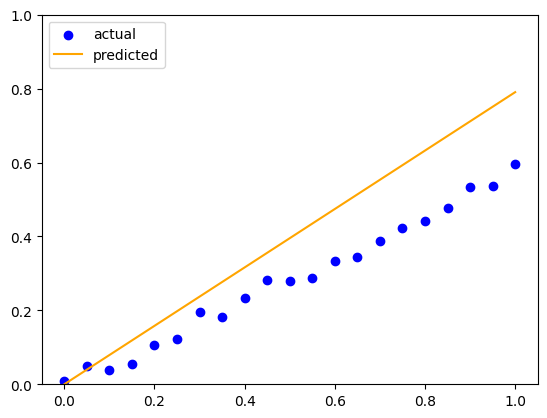

In [ ]:
#@title Sampling the hidden function & creating out linear prediction (run multiple times to get different results)

num_samples = 21
x_vals  = jnp.linspace(0,1,num_samples)

def sample_hidden_function(hidden_parameter, seed, noise = 0.02):
  noise_scaled = jax.random.normal(seed, shape=[num_samples]) * noise
  y_vals = (x_vals * hidden_parameter ) + noise_scaled
  return y_vals

def predicted_linear_function(predicted_parameter):
  y_vals = (x_vals * predicted_parameter )
  return y_vals


seed, _ = jax.random.split(seed) # Get a new target function every time we run this cell
hidden_param = jax.random.uniform(seed) # every time this and the line above get run, you get a new hidden line
print(f'Hidden param: {hidden_param:.3}')
hidden_vals = sample_hidden_function(hidden_param, seed)

seed, _ = jax.random.split(seed)
predicted_param = jax.random.uniform(seed)
print(f'Predicted param: {predicted_param:.3} \n')
predicted_vals = predicted_linear_function(predicted_param)

#Let's visualize it.
print(f"The predicted and actual most likely don't match:")
plt.scatter(x_vals, hidden_vals, label="actual" , color = "blue")
plt.plot(x_vals, predicted_vals, label="predicted", color = "orange")
plt.ylim([0, 1])
plt.legend(loc="upper left")
plt.show()



Now we will build the main architecture for our first neural network.

Conceptually, neural networks are blackboxes that when given enough examples in different situations of what this box 'should' and 'should not do', the inside of the black boxes self organize in order to achieve the task. Magical right?!

Neural Networks take numbers as inputs (the numbers can be used to describe anything!! Letters, words, images, videos, heights of people, size of a home, etc), and they generate numbers as outputs (the predicted housing prices, pixel values of an avocado chair, etc.)

If the INPUTS are numbers and the OUPUTS are numbers... is there a function we can learn to TRANSFORMS them (rotate, squoosh, stretch, bend, skew) from one to another?? (later we will see that these networks are composed of linear and non-linear transformations)

'Neural' in Neural Networks come from 'Neurons', which are tiny little functions that serve as 'logic gates' which tell you if different patters / relationships are currently present in the inputs. You can think of them like the if-then statements of a program.

At first the logic gates are randomly open and closed. Then the 'Neural Network function' calls trusty critic friend "the loss function" that tells it if it did a good or a bad job. Then magical part happens... based on the history, it can make an educated prediction on WHICH gates should have been open or closed to improve the results, makes those edits, and tries all over again.

So the patterns that the neurons are looking for look like noise at the start, and by the end they look for sharp structures present in the data. Patterns that are critical to transforming the inputs into outputs.

And that's it!!! It's pretty amazing that intelligence can arise out of such a simple system, but create things that feel truly inovative to humans. I think it's imprortant to acknowledge that the computer is being 'creative' and picking up on patterns that humans might have not even noticed yet.

Next let's peek inside the Neural Network black box a bit more and understand how it works.


As we mentioned networks have INPUTS, NEURONS AND OUTPUTS. Chaining neurons into layers gives it the special power of being able to compositionally look at patterns (patterns inside of patterns). An analogy being the same way that a new chess player can only think of the next move, and an expert can see many layers deep.

A name for a network where all of the neurons are connected to their neighboring layers is a 'fully connected network' (what we will be using today)

In this current example there are 21 INPUTS (21 Y values), we will choose for there to be two layers, each with 40 NEURONS, and then a single OUTPUT (The slope of the linear function we are trying to predict)

The image below is one you often see to describe networks, but I find it to lead to more confusion once you actually try to learn what it's happening on the inside.

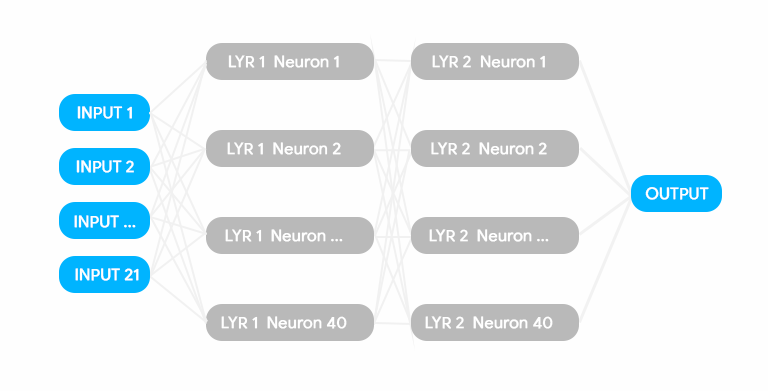

Instead it should look more like this one:

The output of the previous node isn't the only input, there are also weights and biases.

![image.png](_posJCCibNk0U4pjhV97vlTREzsUTB7lNeUDuuP3nn3/+9ttv0BLn5d96y6ynwIQgKi24HZgc/kPC9okKLkUHXArBtddeC6aLgkfzaAE/k1pV0QIuO336dBBZjAEJptNBkamtlAqR/gWhBNmVWj2lvbTesmDbH5MIpS6FqWIIniUSWawFQo99YdfQih75pArgEpz7448/1tbNYAtuBw1igBvUbpv1pdyxF5SJrEYoLwyoLzG4RLsBsOxaXo4+SxqrBS4Iqypsoqjg8tgr7QRn/CgwXbz2go4TgXGCekoLjLWYWFMobdNZx2AQ2Yp0smeuhshiKB73gx+DeoJJ93lK51xZB8illF/KLjHYoOYygfSSytEvWXEibbTKfdEjn3UxBKyBgGeUd8R1sd1fGTz0z0m9PxwBY23wqE6ufvKvIUTaqjxeWrg+O2v5WWlgBD0quFgWJ0GPZCO7tm/fjjQB4vM97Qp6McZIadrDxJxESJcj9obHt3LZdKO4rC2UhEWJ5wWLCVLXensrnxoXFWYV1SLgxFwWgbceXud31UNeyBri4kbCYl2uuN8LLbKAXPghKBpHcV4evw7NuxngiDTnKpgoJcQwiIoOtTKZcCqFyRaNUkcFXGI8TLAgnnS8Qd4JF1WMhNVTF9mlciz/K1UYnFLb5EyXwDAacwBWWHFRKAmCC+JOnYDFdmMquB34VUBHwoOW2s5xycHPstGQoQLWWYdkPQBjS2sxISfcSLq1RGDI2tjOkVS6c9hQYUxFkT2gh2ft+d/I3oelY3XWqdtAqhAXWV7OLRNaQnrJ2y2/1qW55ZKZBIaAkyOAPGHwlIWlFuFph/05qf/XF3d9ZkD0zMSgYWEeoZ5mbM4zxseMWdaaAo545ZVX4pSIHoHoxRiz6SzcZKnZAhKo3xrWwrc2XbEgzTCXtZGSCBlGdcAJGT3bZ10qR0D+g1Ll6srU8/Dirn3UGy9Zu/Tygw8+oE8Q8LPymWeekXaZWoeREo41MJRiIoyRIiVVlHP8+HG0I/iXYi9tpOZbsF5dpBbHvOAGAJoIq6fIyPUItKRLVJj64yLyq6I0mrULOEhNtrDgwrsfvhDSs3GK07UblyxZAocNhDLAbfrwww/vu+8+YUzBVu2RCi2pKxwTaR9MNKSfYCtFgblUejhMW0vvcKGtQet7ArOknrjaE2kLxuCpPQr1B5ANg3UWCmAAjMRl+2Wdll7q0txSuQrzub/bu/kqDGFN6kDAxZ24tjz7cvURKm5+xN2feATjxXuEChWfaOIVSTzDCOeqDo1trIUL55Pgh1fYpdF0JZzlqs2oqs2tqc+pQczaiqOlBjWAfdfgGBsNEDkizAqIkKiYPwiWS4SzhB0HdBbP0GDCNFWZ6OjoKVOm/PTTT5j46quvrlq1CpXIZM07JC+1CZmP8IWuS6yNlES8MBhu6KLXXHONrtVZu/oRcGK7rJHggmbRkfhdGB7ewiqMnKk0TDQi4syWUr+m7amnnsL/EDiD6jEDw20IhBgTRJmKAu+88049Vk883Jc+DMK6ikIMNmorDHdePbOk/vsYBn8JMHI410pPhumZLu3CTRFPtr799tuarqo06Rg11lO/02ilaC4VNR74nuADAF+Cwj/FNnMqIKzSJ/jaItwDtNssaunzinU0t0gJNll9CMAhBMcc8arNI1XnSdkxUriTZP9B0r7hTi3ljj7L7b6L23Itt34st20at/8h7uS7JPNHUnrE8JMW9e3VPI2QAcG3RyBCxkbNSOj+yhBc6peDAVE3JugfY6NeYzgilgbBBc3FV5Ul1lk8YKS7WLt2LfVSC+3s4u0v8NfmRpJ1vNX/WGurtlMSSUDr6uqwIGw3cXFxWiuzBqdBwMD/MafZh25FYeejFs2VK1eCsYWFhekea7gnKSmJDurfv7/2aBzzFxtBQPErVryUVfA/mfqkgv/p4buYBZOtaPXUJtBYRXr2Sz8BlemASz0KI3y09ni0IK02/sKXX9aL7fzzzz849AYGL+vSf4mYXLg1dIz4Yad/iip6RSOoorl0xFttSsKb9hB8fy0rsLzCQKuHzlZnWLZA62yra94qmP17YSHAN5HqTOFV+F+rtY0j3lEkoBsf2JcE9iKBPYmLOY/jnQtG92APZPbSnysBAzDM/vsykiNSxSidRd1s6yyiBAwZMmTv3r2NjY0wzbbYgEn8ANeUrULMstSDTUjbqQ2CTZUUjS9Tp07VXpq1OBECCm8d+2nPk8byejyO4Rt5hPRz9XFzC3BH3D5RAbSX7imsSilFVD90+XYLDBoeBkclcUBzXVPWirOI9oenOZ6R3mETozrPSXbxbvdgC/ZCpPvC82s8xX766aeph4AowboV+AMgYCqWAMXUc64fRJZGM5BGCdCjCbV66tJcl6sDhCOAqy7vBbqcosKIF41eeOgrSsYnC3r79u0rUxiuwGDV+OG+aFHLaSdZt+5LOH7QXAk9evS4++67NQN944XwWwaLfzI/8iuDo8QB3PqLhcBedijCkaxOghMCiOyWm/RxUIPKgL/C4xaiYm+RR5PFXBw+A82F3RfurdRjwSDr1b+iGMcAw2S+EwjClaN/srm9Lu78JVvMnczm2RkBXohhjNJcL6SDRryOhjJSX4oXV19E6gpJTY5gsq3NJ6Cz7QpParLx4vI2Cc2cG/FPJoF9+KDeJKi/QHM7aIGBttvzg5AQoalaIG3Sgm+9pMX6cthKB1u3bhJHpEtbTmfxFUzdUkEiEc0AJqHkYW6Uy6ZsbZgwT/7bxqZKwm13586d2BoceWfPnm1deJk0OyPQxgvtvDBCLdXl1zSWNYCwYmn8BWGtK6gVQzDxDc25a9LKdhZgDBrxt2xPYe6a82inqjbXNh2/d3fmsjO12dWkma/Lrs766uyxe3ehXboXd3f3N954g7aA1B45ckTaa906wgLAZ5Se63/ssccUhZtKZKkQWD3Bj0FPFWXKGsFfqffCoUOHxC5aR7uU3SoqDDsxfgDAR0L8zSoKgV8Eoi5AE3BxsVGsgPtCvpFK0lkICoGbQutvvvkmbpZGWvgYUay+Slhb6gp9w8Q+V9OihonzTK4gGgBiDsAxwM2HIJyWhSXzD0FA/FXyYAggr70fELrydwl/wXqxIkrYOOEvLbRu0EWhdXhbHAMpka1u4bD+ieIooUIvkSvB8mK3+2K5qkwC4QQHWbw8Q4lPZxLQg4QOJ1GXkbgb+a53832e4od+yI9Zx1+ymR/9Hd//RT55vpCg2C+RwNFWWvhGUn6CZKzhjizhtl6PoNHc8VdI7gaBFne4gswLg9aMi5md5JPoD8MNDC6IVgvLCxp1Za+1KQZmcESqj4XOBnC3HTt2LEQ1NTXBARcG2l5jNe+KE9sa4WkgLbZWkh7mxoo33HCDqY80pXqyuhoQcBiXbSyr5+s0rFQEAi1op5ele4sQzE/sopW63JrS3ZowRrDIVhwtkQ1AJJTM5WdkjTiWRLkX/v/oz/glnZiVlYWD+WIxPpIAXALA9mBG1eaCCNFFLbKIVov8C8YLp1ZPqXr66zQ2NYg1loDm+IvQsJgixqyWTtdWmFJnGFnhlQG6CQmg4NgOpchffPGFlBBLRWl7QUh7teuIXYCbgnZ8xk2ePFkcwMdOJW6GeKebLx93kzjFqIpPjFHDZINAB6Omt71kvXouDz4l2GVhUtWVFkvPXGkXgtrCXApaPPIDgvhcCO8FFht7O6HBXGG1FXln3g5hXsJUQVuMwd9edwkttF2omVUQOhemX7oRrI4XvGlxiUZp/jOzZAuTzLsvZi/HJtoBARz88o0VIkAnzuP7PceP+pqf+C8/6huQXRKLPHl95NS2JgtutdzhxdymK7gds+F6S4p22ekpih3QIARBZ5HZq//KMSO2XD58w2X9vryoyx3d0GiXxeWL4PMWnq/4hJcd9sI3FD7nZWcw8OEvnS+ls4pGDelg7Tq+lajNYteuXYjqkzzUzT9UeBhbXcYf39LuoZkuJbVlarcYVHLbtm30IBpG2vpctbZ6rMXqCDiMy2o/baF7E9urTpQp7lZsL/wnW3GAkGBQq+BhOv3/A3PjDz/8oNWv0ADeRrNz0b9SG6fCaEkTeOf333+PBnxStIuZ2hKiC6e10AXrpqnCqdVTso5QlZ39wmcQ/dxBkAFsGSZSrOLv74+/GIkWafABUZS2wmhBjAVYZ6EnnOIhAZ612A58YfERoCdYAbqwiihZfwU3gp4hxa0Rc4BppuBMdO9FeAypWwInDMChaZMKnmmaUZBtS/qij/KNkYMgA4deFQYilCyopyUFoWQRwwsFmRfGfCmkCut5u+BdAI578NE2wQiwgBa0Q2GMwV8wYLSYl1y3TS4RXH7BXLERrI4XIubi0nI/YLqEefdFqh6rqx8BOBX4JZDoy/keD/DDP+UnbOCHfQJTLgm/qP0PV17wL8JJsn0LuY2XcYeeIFm/mhxJWv1oOFRDEFl8qsuILL6tkFadfs7DKRaFfgXI0j1CccoUIYEenzBpK3369BEDCiF7+apvvxbTG238UjiGJRZFJcVeVPAoD195eFoobRTrepSsrq6GVZiGlUXupGHDhomzWMVJEeCam+XGUfvsBCFLRHcC2YpesYJBLu3dFNIkuB/IC0fiF/ZC486xf4r+Bu3GuHAjt13erqXl4qGHHqJxYRMSEhB/ytNT7pojToElsrKyxSFMbCIEnj3UGAkbJ5plfA7/nfAf76abbhINlvhcwPEpBNWSjoSBU5ETi8LFBakOsnb8aEbAWnyygGtipLbdF41SHcBrKVlEpi4kpEV0WFG+kQpDjT179tBZsr2gUaYPHUb3iGBk+s+01dbW9u7dG+7FmIWfxcoMOO9fISECTJuy4ubD915sctIvCMldzx1+UiZM3yXsmtpFtETSXvGSjoTd1N2PnP24zUcWLNYniuBZvGwkHa8oRHtR2iKYY28R5KPAZxHnx+Emq13gRBt1ib4xMKwi3m3hpjYlMVpbc23JdAza4XUgzXMmjkRoMERUUNypOEarArud8BialQsWAXjWlh0nxXu4oj1CYARtp3bOhQT05MF6O10suCtcMAVcje7Vut/UEIsUlSUlbQ828VEPswWeKOIxnTSZJb5EcAQCZhEUmSkEGSsR08oMxTAFBl3ks8XW4Kv62vMfHnvnBjgYcBx54g9/JDyiW9ZWUnbbwWURsFJbMekwbSVBYWfNmkVTNvj4+OAbWTzSLZ2owrqN3gwq3KkZKjm0qEptAABAAElEQVSMy8K9lXrKypSGL5FntA8a4QiL7CmyXlziEFjn27qicmDaptosLZZDCA6BDVo3XnsiDhh1794dp+bR9eKLL+ryZ9WeyFpsgcDLL7/8xBNPQDJicp08eRLRf5VXaSjl0laRgm2kKl14KOnThYSP5uPwAF3HeGUpra2N1dzmKcKBFVbUg4CrFz/2N8F+zApDAAjgv2fJQa5ot/C/HmEQtItvPImYwMN74QIw59uIvmjTxIkTJ8LwcfDgQdhx4AYAggjg6fmHP/74A2EH4HQnO9CsTRO175WuFpDgSZMmIaYBHTC61y1xeUs8ueBOCS5P/B5AvQ60lZRJM4PLwiKLdD9i7jGEn4eBViZWtZc2ejOodr8mKab5AWTSHKsMRkQ94VCXVsG5TtqG+Hw4+KXVT9BOGxGYGnxXe0DYZdHajWgBW4J3Ds0EDS47Z84cPE9RHMkabY1ATk4ObgFdBTdFJ5HFCPcgvusCgpdVCggT7H9ZLVm7rCKQCbEcgchJjMhajmLHkeDqTcJG8mEjSff7hfi1Bds4kNrSw4RvfYSI4NPnvuDOfSH443Yaz0dOIP7dOs72bbET+vMABu/KcwTB++qKZIvAKAsii1Mc+E68+OKL4ZCGOsbAxwx/4UsAwgdeC8czmWlWJsf4S1iFQZHxfB9Oa5i1/fjXe1x+SvK4qcvJS5+c3H/ey537jPU2XprBkTiVkZ2djSwPeAAouv/Cg8KJiKzBPV7gAxzGZd0CPJpqm2THvzhPF7dAD3pLgoaE1p6vlB3/gs0VSQLpgJhZSWV7imTHv/x6B3W+NVnXTb399tvhIYRnCvjp+fjjjy9btkzXSNZuUwRgkaVeHHiqhZti07VkwvmE2RziuuMMNStqQIBz4xNmqUERpoMaEfCNI75xfPwtQto8xKnN30oKd7Q9V8GzmtTlXOpy4eygYKmdIARVYEVEAPHRcje0/BI4pOC2IQ4jBE/GcIVsXps3bwaRhacsjmegBekD4D6LCg0+AD86ySRNVTQWaneZ1FLfXJlS+xlef+8j704ic8PkhJtKg3ccPYIsCsel2AK7sqJvW1uEnJZpcKV99NFH4a0rCmEVZ0fAYVwWp3o8O3lr4ss28ZxrS3xZENnW0z6IIxs5NR5xuCpPlDVWNLj5ufl2DwSRFePLuni59lo6LOurc4V/ZdXl1UBa6CUt8WW92sWXld4huObgqQQepqBxxYoV+FmG0M3SAaxuBwTwXAng04UQLo0m6bbDupolEEUI0Q/SVtpvRbaSHgTibhT8RlhhCOhHAE7YUZP5qMmkuY4U7uLyNpCC7W2JxKqzSOpXXOpXQpBa6n6AXAzid4l+yR2vF87HeZs45For2d9mzDZim7C/0hQ5YoAqsWLEbDsNgaMg9X/AeuvWrUMd3+OwJdPljXnWigMn7777rjRsjp1UZ8vYEgHHcVnsiiOwwoqGWO1twnc2aGQ4XtpdtMXF07XL7V3x0jVAux0n8RFMDjn04ACOLFN4wIGfaNrDWIuNEADsyMRGD5Ai1YqpScKsohWffDtXtJNUKDioWEU+E2IsAkh1kWRXq7yxirFxqkUAqcI6XczjBBjOhxXt5vI3kfwtgtWWFqRpSPuaS/uaeEdqLLUXFKlF3orMn7j01UKuCmnBSQNkowjqw8Nu7ZsgnM4kIdJ+HA7GJTxiKXn98ssvBw4ciBZU8DclJQVdqNBhqNi6eLj5+IVwpFBhHZhdRctrRkYGuCyIrEHPB5xFho15+PDhiPN1zTXXWMuWrKAfa3IQAg47++Wg/QrL4uw8TtDjHD3qyJ568803O1CZC21pON3PnDkTu/by8jp27BhiSjgGgepMbvf8DhmV3TF4mrGqRxA/7FMh2D4rDAFLEIC/EEht7r8kf7OQhExWnJzUiqzLQLgAfKClf0eyfmtzwAAOCIIWPopHGovQYcStJfhJKzgQK41jgIg0sGjCsrBhwwbECJfmmERkA3gdYB4qVjz71aoI+fjjjxH0va6uXTQuulmZkuIUsWLG2S9xrjNWjH0zOOPeLNbZoXZZi7U3TwD4E0L0v/TSS5iOaAbIfYXAHOaJYrNMQgBnSOGlRKcgDpfDiCw08OnMD3qb2/8gqS82aQtssHUQ8AjhB73JiKx1wLzApYCxhY3ikQKw+VGB1ML9AJbaxioNKjW5QqjatG9aLLUTBZ/awJ5geR0HM7BYHIPL+btdxmDPMB4JKWKm6InADb6I52P0sSSCPOJQFOJbITkOghhMmTKFOhvQfLO//CIclkVdjDiJS8w1QK+NgBhRMhErkw4MCwvD1zGMpjCgilOlSoqNxlesoqTxy7GRDkTAsXZZ5PUuFz508MMan0c4Y+4WQBBHUCx4ilSMcIMnuIZyHikTA7oLyRLxuEQsTbWCj1TOn0IGcPz+jpzEJ84hOAZrqODgUY8ePXCwEQOR42rJkiWGZrB+KyCAZNw0bSBynuG5FZ77WEGoJSLwNXDoceZsYAmE5syFa0H/lxiRNQc6NscYBPDFUbiDy10vRPXSDsCn8al1DlKrzxRXk8WdXSZ8/cFBVix+icJROcQGkX5Rir2tFYSOwUEuRKf68MMPRS+7GTNm4JE9zlEhPSR9ao8o6XCilYZIpwLAERERCOnH0YvoWq1STfsX3q5YBaIwDYdYsHRISDvPB0UlpWsg1jucH+BBK3odSHutoqRUoMPr+t4MDlfO0Qo4kMvypDZfcOSXFvhCeSELQMuPZnweZazlQFIlhfeKILHTNP9LQWT33UtKj0r64dHTkx/6AXH1ateodLF8+fK5c+cq9bA2myOACBK33nqrzZcxZoHmeu7Mp+T8tyyygTFoWToGP1njbuKT5xMXTbgSSwWy+QwBPQjg+6VgB5cHUrudNAlOZe2KQGrH853GCgl1pTaUdoMcfKFMX8Biz31JhHgsEhYbPICPnwmnAmOsztu3b6cZYmV0FnZZGodL3Dao7apVq8RLVKQcEVG6EP1A2mtkPS0tDS65lAdPmDABcjw85J8JupQ0ZgmrKGnMQvYco/xmsKcGKl7LcVy2obTNYV8KENzSaRj8gu1CuGytwsP1J1z4z8Od+Zjg/7N2SbiV72o4+jHe6yNHjty9W2EJbZGsxYoIIGHgjh07RGOAFSWbL6o6g0tdSXL/VvjCM18omylBAD9Toy4Vwm+xqAUSVFjVTgjAOgtLbd6/pOA/BUutRwjpNIYPH0NChxC8UW1UNGlftpPqdGEF33gSPoaPm6Y/7YucvtRkc+eWyVlsUD/h92GIaTF59DBFaUZJaSJJaG0tjgiPBUR7hUB4FBw4cEBXiHE9SgoY6ijWUlKHeIc1y98MDlNEjQs7jsvWZCtbwjhX4h0jQHX2C65B6eGFuz89+8xtnUpqhMOV8uIVwV/8o7xR6Xrnzp34TYn3vVIna7MJAqCw+HgaMWKETaRbKBRfeAjMXryfVJwieH8iSSwLQ2s2pDDBIteudzTi2PMhgwiyjxrh/GP2amwiQ8AoBDQhvUBqt7X51Ioz8UAvZIiQpgEWE+ueSszbyB17UeFompsv33uRnnTcbfSlCn6xYLHwKJDExg7sxSffIbjemVXwUYxcshUVFTLrrC5h+K5EcgFEn4VrgdkWWQjHXLjkooKvg/Xr1+uPZuMoJXWB4MD2tjdDc2veEAdqo7KlHcdlkX2E6CCRPrFAiTv5jo7YeBzfY6EwYH1LWBZtQDkXftJ27WbWwhBgCDAEGAIMAQEBTUivzQKprS9RwAQmlbBhPGhiyGBZEACFwfqbQGQPLdL5fUc4vv8Luugs6Ev/RJ+F10XOuTSqHYuFN13SbfQRpf7F9fcazxStRWQhB2HdYYuFYvDQ/frrr/VriF77K2lQJYcMYFxWD+yO47I67bJugi0HBVkK6xXssjycEPB/GFx221SCENnaxTuKH7NOu5m1MAQYAgwBhgBDoB0CSI1bdqQlo9h/pDK1XRe9wKNCBKkNHsQHDyBB/UzOt1xfKnxViXEVFBYgBNbZi1bLYw5AsYJtm1csGNdPCP7aVgL78ElzEbqhrcWymsgUkeILeTEVvb+sRWShKc6TXX755ai4ubmdOHEiMTHRGPXtrKQxKtl/DOOyejB3HJeF/4CyC0Grvyzcmwp3aqve5i979lP4IWgPIIlz+OQ7FdpZE0OAIcAQYAgwBHQhAKc1nBUr2kWK9ym41WIWjoj5JQlJBwJ7k4BeyK9r8NCYcLQUMbMMloTZfNcFmlH1pYhOwKWvkTvRBfUVbLHmehToUUFkinrGoMtC1wIqHEQWdBb1efPmffbZZ/pXlPbaU0npuuqpMy6r5144jsvCwcBwHIN1HMy3ksLj5GmXGyRxDO4jpUck/UT4lBm81Jg4Bu1msQuGAEOAIcAQYAhQBBAfoPQIV7SHFO8mZcd1eLsR4YsG1Na/K++XKJzl8o0liLTTvnA7ZpOK0+3blK78kvjBbwnpeRFKrHivNEBBM09+31165T1fE/id26wYZIpWIbJIVNS1a1camPbw4cN9+vQxaUP2UdIklew5mHFZPWg7kMtCKzG+bBPBcxzEl3UPxC/fNnXh5I5Pk/IUrqGCd6PxZYe1C5vXXMelriA5f5GaPOFDJHIinziXEdk2AFmNIcAQYAgwBCxBALnESg5wMJrgVZYijyMpk4wwCD7RgpucVxTvGUw8w7njr7bzc5WNb7vEF5/WARI3v/fWnX3v59yTmbWWJyZoW8pxtWeeeebZZ5/F+kg8u2nTJscp4pQrMy6r57Y5lsvqUYx1MQQYAgwBhgBDQE0IwLxSfhJBzbnSw0JFeGyoRUAt1xeeDCGD+ajLSeQEFzdN6p+OwWWRoohmxEV891mzZlkO1QUlgXFZPbebcVk94LAuhgBDgCHAEGAI6EAAJ7rgP1B5hqtMI1XnhcCxcJwzuyC3ZfBAIRlvxFgx6GxHoi/Hjh3r27cv4IG7Qk5ODksdb+o7pSO9GUzdu8HxbgZHsAEMAYYAQ4AhwBBgCMgRcPMlCG6AhFtiB+LXVmeT2hy4vXH1RaSuiJTsJ1UtyRHEMYqVmCl8r8cNniRTnOosjT/88ANV9eqrr2ZE1lnumrPoybiss9wppidDgCHAEGAIqBsB+Mv6JQgv0fmgvoTbNs1wTK6ud3dsIgtAfvxRk8No6tSp6r6LTDvnQ4D5GDjfPWMaMwQYAgwBhoDTIGBZrgS6TWf3l01PT4+Pj8deYJEtKCjw9tb4ATvNTVSBoszHQM9NcNHTx7oYAgwBhgBDgCHAELAIgYjxfP/nlZMsuPnoSfpl0aIqm4xctVSjSy+9lBFZld2cjqAO8zHoCHeR7YEhwBBgCDAE1ItAxAQ+ZBCXtkpImQv3WRd34tMFGWj5uOniMS/1Km8NzTZs2EDFTJo0yRrymAyGQDsEmI9BOzjYBUOAIeDUCDTVNJVuzy/bX1R1urwuu7qpsrG5odmpd2QH5V3cXVz93DyjfXy7BgQOCg0a3cnV29UO67IlDCLQMR4rIwVudHR0Xl4e9nvmzBkj89YaBOdCG9Ax3gw2umuMy/5/e+cBX0WV9v8zyU2vJAECQSD0JiBSVUBE1oLuqy6IhbWCZdVXsfxdxbLW1d21rr2BigXrqyyKiihKFAQRWBGCQGgJIQmQkF7n/5ucMJnMndtyW27ym8/9XM6cOec5Z74T4JdnnvMcP4GlWRIggYASqNpXkbtoR9FXeQ2V9QEduN0NFhYTnjate8bsvtE9YtvdzYXYDbUP+YItvkaOHAn02PQrOzs7xJ5Bm5lu+/hh8BNOxhj4CSzNkgAJBIhAQ03Dvld+z1uco9IF6wvk+GWg4NO9hZ/ndpvV+5g5A8IiuazCF1g7sA09wADBsh0YA2/djwT4j5Qf4dI0CZCAvwlU5Vb8OvcHeGQpZH2LGjzzFu0EWzi8fWuZ1joaAV3LnnLKKR3t3nm/gSHAGIPAcOYoJEACvidQnl2y5ZZ1tYeqfW+aFo8SiEiJGvzY6LiBSUcr+GfgCLSD18q1tbWpqallZWWKohQUFKAcOHzta6R28MPgvwdCv6z/2NIyCZCAHwnAX7hl3loKWT8ibjQNwuBM76y/ObdX+6tXr4aQxd0NGzaMQra9PuWg3xe1bNAfASdAAiTgMYGG6vptd66vLa7xuCc7eE4AnLPv/BnMPe/KHh2dwIoVKySCyZMnd3QWvH+/EaCW9RtaGiYBEvAbgb2v/l6+/YjfzNOwmUDF9lIwN9fynARcEfj2229lk4kTJ7pqy+sk0EoCjJdtJTh2IwESCBYBrPfacOFKtU4N1gQ65riKTRn59mQm6grk0w/1EMmqqqqUlBR8I1gW+WXT0tICSa+djRXqPwx+fRz0y/oVL42TAAn4nkDumzsoZH2P1ZVFMAd5V614nQSaCaxduxZCFufDhw+nkG3mwpKvCVDL+poo7ZEACfiTQH1FHTZE8OcItO2QQNHyPPB3eJkXSKAlgZUrV8oKZuNqCYZnPiZALetjoDRHAiTgVwLFPxRyZy+/EnZiHOTB30kDXiIBI4FVq1bJU2pZIxaWfU6AWtbnSGmQBEjAjwRK1hX50TpNuyJA/q4I8XoTgZqamqysLJxERERMmjSJXEjAfwS4h63/2NIyCZCA7wmU7yh1aTR+fHL6Ob2q8iv2Pdm89L73XUPQMf+D3VVby3ULPW7qb4uPKNtWUvRerl7pTgFDRPeMQ0uXHeUQxnGjB8Wlz+hVV1ZrnJ59M/tp2DpH9r5lMOp3PbalrtBn+cjSzs+IH2CxFYJphnI+7vC3nzlrOiABZJYtL9f+ro0ZMyYhIaEDEuAtB4wAtWzAUHMgEiABHxBAEgOXVuKHJneZ3KO6qNIoFtGr+/TM6K6xW29YJy0kn96l56wBdRW1EJrQcwPmjTRaLtlycPdLW8tWFxsrZbnfIyNgX5b7XD00b0mOaSBjl+j0WNl414O/yfq007tjJigXry7U7Xc/O9MWG4GAVPuZoCUm+dPUL22pEdLUvoXbdS0rhbs+HzQ+tO5A0ff7dZEtDaJSv3G0gSwe++k0aRZCVs4H9cajfM8R+/tyh7/RCMuSQF1xTd67OYezCqr2aPIupld8p4ldus3sbUuObK+Ili9fLm9t6tSp7fUeeV9thAC1bBt5EJwGCZCAWwTqy1u59mjfi9tTx6WnjO4KbSd1Xsb5fTBkwTf74KmNH56MMtRbyX8PohDXJzFpcOqQh8Zuui7L6MfFJfh3IRzR8sCXe6O7xXaZ0gOC2KhK0cZ4FK8vQvukY5u37kwa3lROHt9ZalmoaghZiG+cSnevPhNpCi5So029DG8uRsep3l7eI24Tlbqc1dtbFiCyAQeXkqd0hqDPW5ojT3W5bOzVav5GIx2tfPDb/B0Pb6ova/7RRXZkfPa/t6vv/OGpJ6e3SyDLli2T98Vg2Xb5fNvUTVHLtqnHwcmQAAm4IKDWNrho4eAylNnuN7Oh1Xr9eWDxN4XpF/eCWoUE1N2l6FddUKmfDvr3aCjCHpf12/7XjUaTkJXolX3veqlxEaIAqZp2anfdw2psjDLGEvNEXM9EuEIxB3xjXDhEIV4havcJLQoifpD2ir98V/PuD8aZmAzqp+lX9pZCducrm/Nf3SXrd4nfoLahxd0UsrKXSbaaTvURUQD/H0/4DAXcuFCMV0RYbHhYeNMaDCUiLCwmHNfDEyIaG9uEooTH2ZQwRTYLiw5TIsPCIsPDosLC0DjWZouzhcfaUAiPCUdL2bjFAKF5AiG7bf56YZUNGb8Y4NKAh0a1PzlbUFCwfv16PLHY2Njx48eH5qPjrEOGALVsyDwqTpQESMBLApB3aRO7QaEi6jRljOa5zP1wpyOb+Uv3oGVcZqKpAV67G9+8O/KY6r2gCxGuAP0Kr6c2gT92x6Ujvx1KHJKCSilw4/tqWrZ4g2fL2jLO0fzKRiErB9XluDz107fFjZdaO49bPYGwqHAIYhvUbTwELpRuOJQxNDROte8Em63FKS7ZoKFbPZw/OmL73x0PbbIUsk3DqQINEkekRHRqV8EGn3zySUOD9msntvuKioryB1vaJAGdALWsjoIFEiCB9k9g+/2bRr17sowuLVi5z4nzUvpK68qd6TMoUbzTB7Vip9kVSjZpWhZhqUUiN3mktvVR2Y4SfEMrQ9rCpRrXW1PMxVkepLtCWEJUWgzCEnSPLCy0s6Ohuh4fRJq6f19h0eGaf1dqXIhdKXml/G2qjNCcvnD9RmvKGBIZ+5m5b9/Tlvnv73IZlYEG+xfn9LxmoKfG23L7jz/+WE7vjDPOaMvz5NzaBwFq2fbxHHkXJEACbhGAlxRLteSSL2QDcNQHMbVdpx6Dq5ChjtpAyA59ZhwEJZZVFS8rcNQM9WVbNeUqQ2bhjkW5aFmeOF3TsvH9k7B4C0YQt2AMzMWlE36crtvcs3ib0RmMelui9u7eGJagx87qvWBz46zv5anJoN6mFYUJP5yJXoj+VNUWL84bKuob6psiQBCKgGS0uFzf6KytQ6ioqkK0qQ1qfUW9Wt94tVbV1GpNQ0NNfX1lPa5qn8o62MGODHUIjG5oYd+dqTZU1ddU1YuD1e40lm20CAd4f6F3EeEAjYuPVg5XEDHR+K0FS0QompMYQRFoHB2u2MLQTODPWO3/0PDGZyGtQSIbfcOHVh5wZyZYE9aetGxJScmKFSvkjU+f3vxj7A4KtiGBVhCglm0FNHYhARIIYQJVeVomBHg07aNCTYIPItWkII23jUAFRMFCL8LXa6y3L0PpVl9XicaQyAiTRcgBZGuRyIOkThqaitxh6CLXnOl9YdZYg7Vl+iVjAS5G/RRtIMjkKQrS96xfNRlEvWXuAr29ywJe9JvbNIbGmiu9OIcwrcenog6CWCtA6ZbWIbYBMlr7Lq2FRK7DpTKt0Hha24rNjRsgu2sb6o44c8B7cRNuda3IKdv97NaYY+LiBiXF9knwq6vYrQl512jJkiVILgsbI0aM6Nu3r3fG2JsEXBOw+8fIdRe2IAESIIGgEYDTq9XLv1xOWgo+pCaA4sRyfieBpzItF9pvvn6NvSa2HwgOVDhfM/6kRbhKXy/kLLpD4KZO0KIUkOPW2Mvl2q+yTVqysLheTUvKNAuri/X1Z/DRogZGdJsmg3Aqt07LGp2OunE/FeABxSfCk6xVcAYjLERKXl3gHtW+mvDVRHB5HZpp4hg6uKJO1dzHwT4a1Ly3mkK3QTh+QGLi8anJEzpjpVyD2uTq9usUsakBHKhHjjSvPjQNl5iYuHTp0hNPPNFUb3n61ltvyfpzzz3XsgErScC3BKhlfcuT1kiABPxLAJ5IjwIoPZqNFHxV+yv6zBkKqYcoWMvgAU+FLOaAAFk4faFcUdadrAd/zEdNUyXSHXhyQArDbQybAx8dtfmK1cau2ItBBkh4upjMaMRR2egJdtQmiPWIB4jE238tJtndQ/PLNoY0QNdqGhcf6F0ZCNEYNdFQ1aA2BkI0VDc01DVGRyBKokKLmtBiJxBHgXJdkyCWURP62NDNCKvQT90p4Fe10s3F+OS+sePj4xZ+ffC7zwqXu9Ox1W1cCllYhsyF2HVHzubm5n711VdyMhdeeGGrZ8WOJOA+AWpZ91mxJQmQQPAJRGfElrm9GAhZq/QZwyfnZKWX3gwFrKZCGCve0fe9btjmXWuMYay4KoUskmohvyxSE8iOeENtqXp1s9CveiJY3Xsq42jRBlEH7jh3dWuygNiGEa+dhFVlIxZPxGTkIjB4ZCFk4QOGTX8sCwN/0zRC/VQLgU2KtCX5JY3A3pe37Vug5e51fiAnV8LIlMpdZfiRqNh+RI+USItMmdXtHHw2X7u626zeKZO6ijAfr1TThezcuXNfeOEFRbGwj8Doa6655uWXX3ZHzr744osyg8GECRP699feD/AgAX8ToJb1N2HaJwES8CWBuL4JZZst9uKyHwN6Du5VvR4Bsm5qWXRBTtmo12IgEwfeN0pfPiVNySxdCEIwGke0gHMtC/0qIwrKc5pf48o4Wk132q0wM0Xuyg269HuRBcjfjVesgl8W88RkjPMx7fJl6ujNKfh7072j9U2f0RsbIsA76+TG4erOvG2YnpMLi+FKNxw6/EPBoVUF1Y2x3eh7ZOMhfGIy44+5vH/qKem+UrTuCFmMDoELmYuCSzlbWVmJNvJmr7jiClngNwn4mwC1rL8J0z4JkIAvCSSNTjvw6V7nFpHcaqfYbGoDv6ysweYF28QG01ofhJ8iQBbRBXqv7NvX97i6n36qF3YvyJY5BPQaFEzWjJf0suyobZ1gOHY8+yusGSvlTAxNtKJM5goPMbLJ4lR3FUPOIsAAwa/GqWLXLqOX1/7WNIPI57A0R5rVBmg8JBkZiXu0zvwn+JureO6YABQqdvZytFeC1k8RaKALWVQgW0LS2DR8et84ZFSn4Wd1nnZq6qSIMG1VX2VO2bZ7fol7M7HntQOxaZzW3YvDTSErR3BTzr722msHDmipG9LS0i666CIvZseuJOABAUW+C/CgB5uSAAmQQPAIIDZx3dlfI64xeFPouCNjJdbo/0xF7qqOi6BVd37wm3xsiKCF1bY8QLLvXc72sA0L07Z+6BSR/MvTP+bDv2v4sU8andrr+sFxA8x7ebQcweGZR0JWt6IHG1guBSsvLx84cGBeXh7a39t46B1Z8J6A/GGAHco2e5ja3xMeJEACJBAqBPDfPzaMDZXZtrN5pk3rTiHbimeaOiV91AcnZ1zSV+bbwgI1aFBsj4xKd3avPVxb3PPqgaM+nNJtZm89j0TJuoObrsja/uCm6gPN2SrcnJsjIYuNZ1999VVoJv245557du5sSrAA49I7i8hauRQMdowjPvroo1LIJicn33jjjcZLLJOAXwnQL+tXvDROAiTgewJV+yo2XLRSXx/j+wFo0YoAkp6OfGtS9DFxVhdZ5xcC0JTSru6Kq95fifVkhV/m6RtJYBOH9PN6dp/d1xio4Hw20JoQo6bFXl988YXco2vKlCkyPGDDhg3PPvssTCEE9sorr9Rt6t7ZhIQEbIsg63/55Rcs9pJpZZ944glqWR2Xrwr2Pwy+stwO7FDLtoOHyFsggQ5HYPdzW/MWNbuLOtz9B+OGu1/cp9d1g4Ixcscd05F8Kf/9yJ7ns/XkbgCE8I8u03ukz+gV0yveJS+YhQwtLi7WsxZs2rRp5MiRAwYMeOqpp0477TTdApyy8+fPX9x4zJw5U6+HnIUgLi0tlSK7sLBwzJgxe/bsQYPjjz9+9erV4eHhemMWfELA0Q+DT4yHuhHGGIT6E+T8SaAjEjjmyv6x/bigPnCPHrTBPHDjcSSnBOL6Jw5+fMyQp8fp8bLYIy3/w90bLvpu819W53+0u9bVLr4QRrqQxVDz5s3D93vvvQeNi6SwuIoDhX79+l122WXw1N59990Ih9Unhb5oIE9zcnImT54shWxSUtI777xDIauDYiEwBOiXDQxnjkICJOBjAog0+PWqH2rdzjXr4+E7kjnsvDXspROie7S3zLJt/xnqelGPMTDPWRWHVuZjVwU9V7HeIKZ3fOLwTrH9E/HgorrFIl0GMiTIcGeYheg8fPiwbCydsnfdddf1118/adKkbdu2oYxLDz74IL5XrVqF7Q9mzZoF56zRNdupUycEGNx///3/+Mc/ysrK0DI6OvqTTz6ZNm2aNMtv3xJw/cPg2/FCyhqXo4bU4+JkSYAEjhLA/9CDnxiz5ZZ1tYeqj9bxT98TiEiJGvzYaApZ35P1iUVFpJycjs+R9QcPfLL30Lf52MZMGsbOC/i4M0h2djaaYX/alStXQsjq0bG9evVCTC0uwe2Kb8sdbrE4TA6Rmpr69ttvU8hKGvwOMAFq2QAD53AkQAI+IxA3MGnYCxOy7/y5Ynupz4zSkIEAQgsGPnw8hawBSRstJo5KxQdJlA9nFRz67kDJuqL6xv113Z8uogv27duH9j169JC99IJLI3/84x+ffPLJ3r17u2zJBiTgDwLUsv6gSpskQAIBIgCZdewrJ+59Zdv+d3OY2cCH0JG1oNsFmcfMGYAX0z40S1N+JWBLiOh8WnrnkVuVvf+p2LandG/3qoOpVYc6VRUn11dF1VXF1NdEqvXmB4pksZgVAgmkeF24cOFxxx2HGhTwvWXLFlxCQTZDwXjcdtttCD8YNWqUsZJlEggwAcbLBhg4hyMBEvALgaq95blv7Sz6Mg+LYPwyQIcxihxPaX/onjG7D9NvBf2ZexYiWVcm9n2i7HlfVGk7bzUf2DMseYRIHqYmDhJxmSIiMSw6xRgvi7Sy6enpWOD19ddf33DDDTIPl+yOzAaIOkAZhZ9//jkurjkjm4yXdRjI2zw8S74h4NkPg2/GDBkr1LIh86g4URIgAZcEsDHS4awDR34+hKRF2Msee7TSWesSGlywtviIqO6xWB2feHxKpxO7hscwoZJLbIFo4K58qdin7FkscpeKesO+CYpNdD5B7XaaSB0rbC0SdcGsUcviTh5//PFbb70VS76wlguJZmWwwdlnn41LS5YswTfKXbp0Md4ztayRRgDK7v4wBGAqbW8Iatm290w4IxIgARIgARJA1tijea8cuj+hYne+JvZ/KVTD64ioNLXn+SLjLBHZyZIizJryy6IZMnAhUwECBs477zyZrwCiFs1OOOEEeyOm/LL2DVjjcwKufxh8PmToGKSWDZ1nxZmSAAmQAAl0JALO5EtlrrJjgdi/rIWKje+j9r5YpE8TiCtwfMh9v6666qrnn3/emGUWSQlkHi69K6Qt8sXqp7IAIXvttde+9NJLULr6vl+mNjz1OQFnPww+HyzUDFLLhtoT43xJgARIgAQ6BgFr+QIVu3OhyPu8hYrtNFLtPRtBBUIoLtlkZWVNnz4dObbs5Sz6vvrqq7qFCy64wBgji3qjkP3ss8+QyUtvzIJfCVj/MPh1yNAxTi0bOs+KMyUBEiABEuhIBMzypTJP2bnArGKTh6v95oqU0R6BcS5nHZmikHVEJgD15h+GAAwZOkOEuJatq1Wylolf14gjh0RiihgyWj3pTBERGTr8OVMSIAESIAESsCbQLF/KERcLFYuIgrrmpklD1H5XidRxzTWelCBnzzzzzNLSUkvvrL0lCNlrrrkGOykgtIAeWXs+/q5p/mFoaNoOw98jhpD9UNaytTXKW0+K3J0tcGdkqhfPo5xtwYQnJEACJEACwSVQW6zsekcUZomKPdpE4nqLzhPVXjNFRLKTeUG+jOgTe9O56Zf9oVsLFZs4WO17pejs7ft99+UshayTxxSYS9SyTjiHsJZVVi4Rq5Za3NuJZ6gn/49FPatIgARIgARIIPAEDnyjbH5YIP+r6bDFqUPni65TTNXaqdogCletfOPak4drGxk0H0nD1L6XizSL3ALNbTwp6XIW29W+8MILxqVguhkKWR1FEAvUsk7gh7KWfe5ucbjQ4t6SUtTrH7aoZxUJOCeA1IyFWcqhn0Xp76IyT/uPp6HWeQ9edUgAy6iR0jKmu0jor6YcrzmQwmMcNuYFEmjHBCBkN86HOHVwi4o64qEWcramGNkJlD0fiEptt63mI/lYzRfb2oiCZjt2JV3O2l1pUcHQghY4An5CLesEeShr2UeuF/WGyCH9LhVFvfN5/YwFEnBNADkac94U+V+1yDTuuhtbuE0AQjZ9mpr5ZxHbtNW72z3ZkARCmUBNsbJqhqgrd3YP8M6e9L4WQlC0RslfLg6tMyYoaFDFZz8VT7/uLZHix31iXcpZCllnTzAg16hlnWAOZS3rtV929erVyCeCtydOAPGSbwngBRb+0Rw/frxvzbbeWkONsuMVsftdumBbz9D9nnDW9pylrbkO4wJN96mxZQgTULa/LLCXgcsjIknUlphb2eKf+WjHM5/mZ++rcrhXgrkPz9stAWpZJ482lLXsyk/Fqs8s7s29eFlIWGxnsmbNGgsLrPIngXHjxv3www+WUVn+HNbKdkWusvEOLaKARyAJIOpgxMN00AYSOccKFgHlx0s8/hdGCRMpx6vdzhDpp4TZmiJzqGWD9QTbzrjUsk6eRQhrWWGZx6B7b3X2ze7kMXj99dcvv/xyJ2h4yX8EFi5ceMkll/jPvluWj2Qr628WNYfcasxGviUQmaKOelwkDvStVVojgSAQQFR99UFRXSiqi0TNYVFXqtSWCnwQcF9XKg6ucxwp23KyEQmi03EqFnV1nawnN6B8acmoQ5/xh8HJ4w9lLYvb0vPLlhwUSamN+WXPEBFRTm5YXiorKxs8eHBurhZZf/fdd993330uu7CB9wTuvffeBx54AHYyMjK2bNkSHx/vvc1WWkCA7E9zBdZY8AgWgchkdezL9M4GCz/H9ZgAYgAq8rRVodiwAN9V+aKqUNQc9M0/I+HR6ilfC3hkWx66fMEeXcH8B7PlrHgWeAIQLYmJTRkt6KS35x/iWtb+htyrueuuux5+WMt10KNHj61bt8bGxrrXj628IlBRUTFw4ED5K8T8+fOlrvXKYus6N1Qra+Z6/OKvdWOxlxMCCf3Uca+IMNe/fDqxwUsk4HsCSGlSvltU7FXKdonyXSg0JjZxun7Ly0ng78KEN+1t6Fp24sSJS5cupZy1R9QRaiBksefw999/L2+WWtb+oXdELZuTkzN06NCqqirgWLRo0UUXXWTPhTV+IvD222/Pnj0bxqOjozdv3pyZmemngZyYVbY9K3YtctKAlwJHoPdsdcB1gRuOI5GAPQEo17IcUbZd0b53iPI9ouqAfSuHNeHRIqqziEwRUSkiMlVEJKqRiQJruZCTzhan7P9C7PvEYV/9QuYlav9r9TO98MQTT9xyyy3ylHJWx9KhCiYh+9hjj82bN69DEXDnZjuilj3//PM/+OAD0MFqeqypbxOLkNx5Vu2iDZbcIXcEMkjgbmbOnLl48eJA3xbWe2Vd0GIHnUDPgOMZCCg29cR3GGlgIMKivwmoWqhAabaCRZ+lO0TZTs3n6jD5q2EytjgtX3JsBr5VFGK6ieh0TcUiztXJUXNYWTXTrZxckZ0szVDOWmLpIJUUsm4+6NDWsjVV6mdPVa3+oKZob0Nqj7Cx50SedXN0VKzi5Oa/+eabqVOnogEkLJIYjB492kljXvIHgbVr1+K3CJkKbcWKFSeffLI/RnFkU9n8d5H7qaOrrA8CgYyz1aF3BmFcDtlBCDTUaN7WI9saxes2Tbw6z/YKLEgeh0TIcb1EbE8Vm81qhQzN1dq6w9O9EuxGMcrZk0466bPPPmOwgR2kdlhhErKPP/74TTfd1A7v0xe3FMJatqZS/defynasa7FdQuYo2//7OD4yxlrO1tfXjxkzZsOGDUB36aWXLliwwBcMacNjAsgggTwS6DZy5EhI2/DwcI9NtK5DXYWy8ixuiNA6eP7qFR6jTv6PsDFm3V+AO5zd2iOidFuzeEXkq1rvDIJiE3E9RXwfNaGfiMsU8Zma/1Xx6T9KB1Yomx8SdRXmadhi1aF3tdj0y9yi6Zxy1gGYdltNIevRow1hLfvxI5X/eVyLeTUd02+KPu/Oppx8pksvvfTSNddcg0r8Urtt27b09HRTA54GhsD+/fuxCAx/VzEcdgC/6qqrAjOuyF+ubLo7QGNxGLcJqMMfEOmnut2cDUnASOBozIDmfEXYwDbX0a5RqdhaWcT3UxMHaOIVblc4Yv191BYru94Rhau0eFzN73sMNnZWe52vp99yOf6TTz558803y2b0zrrEFdINKGQ9fXwhrGXvGFtSsKvB/oYRbPCP9RYvg4qLi6GfCgsL0QVJDP7617/a92VNwAj8/e9/RyoDDNe5c+fs7Ozk5OQADK389ohb6zACMBUOYSTQ43/UIfz7aCTCsmMCyOeKOIHS3xXIVi3m9XcXMQNIdBXTQyT2VxMGCO3TX0DLhuZBORuaz82zWVPIesarsXUIa9mrexyuq7G4ZfzD9Uq+RRD9rbfeinATdMDaeaygxzp6i86NVe+//z6S+Z199tldunSRbWQNUtJiqzC9FzavQpJUpHzDGia90lcFOSJShp122mm6zYKCgiVLlpimoV81Fl599VX7iaESba688kpjSyfl8vJyBGZ99NFHss2pp546ZcqUPn366F3kfHB6wQUXxMXF6fVy8s4HQh4JZJNATgn0wkLdf/7zn3r3FoUmZ0aWqNij1SN2rfNEtddM950ZRmvKmjmiZLOxxkV5UKMTd+sDzc36zhMR8aIkW+x/r7my2/kiaaCoLRM7nmiudL8U0UXUFrjVHAOlTxIxjT+WlQXiyA7ziJiw/TT0u5CTtx/JdDv2DeQN7nlfVGxtvigrZV85RPO1oyVTl6PV5j+ThmrJuXiQgCUBbGiiLdLa0Rjw+ruWc0BtEVpm7oQdkuP7isQBKmSrJl77iXDrN3XmjqFwTjkbCk+p9XOkkG0dO1vrurWFXindwyz9sqi3nx6SyP773/+W9f/617+cCFm0gXrD+vpVq1bpWha5/WfNmgUl9+mnn0rRBp2HTRawkuzzzz9HlwsvvNC0JB+nlhoX+g95VZ999lk5mZdfftlS88k5DBgw4LvvvtOnsX379rlz56ILJDUmkJBgsX4Wbbp27YpmmLBxAmiPSgwqdafLCUOP4gYRiYE5HHfccZi27G6csJwPbJaUlOgvv3AqJ28SuPJ+9W88AujXGTNmoObpp5+eM2cOvOb61aYC1kxsfljbPkc/Gt0wyp7F6tD57gSZ6f2aChXa7hjuHpCYvaZrjXe82Kw1YWH4zaJynCj6tqkSzfpfImLSxJZGNXbCeyKhZ4shti82K079ctrpYsj1Wt8Vf2weQr9qLGCUkY+KlMFaXWmjrO8yWuDTdYLY/IQo+VGrlxPGVaOkNt4FGpvmpnUTYrcQ+4VwMnModaCAbDVqWVmJvkVHQUlrxm9TF+MlY9mj52LsyHL7I4AtCZDStSxHQcwAZGvpdoEa5weyXyFaAHsjJw7SxCtiBnwb7ep89MBelat/5L+3+E/qzDPP5FKwwD4BP45mFLJYno70W1zs5SbuENayY8+LtIyXHT8j0v7mb7vtttraWtRDj5577rn2DZzXQDtie4UHH3zw3XffldITBQjZ6667zug3hUpOStLCG6DSICX37t1rVHhyCIhI2RHLntAMAtEkBI0zgZSE8NVVuPGSLENo4taM9RCyxlPnZUcThssZ84dxoyJH5RVXXIEJ23t84fNGagKj09r5uPLqeeedh8cBGng0sACXc4teThb/1pUrG+erIx7yWM7Wl7cYohUncMfCMwoR2fdqIf21KECMHtoi9hg8i7krmyR4xhTRb5aISRe/3m4eDb5MqZXNF6zOpZDFKNtealKusYNEn8tFxmQxYr748QoXUlia/AHBeY0+XcwZQ296XFPkOIxeYXdmLq3p3+gOLS6PMc9oclk/NVrW29sXvH8u9jZZ0/YJIFoA+bDwyqV8j4IVWvLjUrnivrA2C95W7C8gYwZw2pEOytl2+bQhZPGbCX4/wd1RyHr6iENYy06/MXrLd3WmPAZ9RtnOmmcOHli2bBl2TAEarJfHalBPGcn2t99++3vvvQclh0wIWDqGAqQePJdGa+ecc458BQ+J1q9fP+gz7Auge1VlyyFDhqAg5alshhVp9pJXNoaghAf3rLPOMipm44go27t14YI1tXF06mjC8r6eeuop47iQqnAA4C8bZnX88cfrwQY4heTFHXmqZTErPA6YQn4JPKAvvviiebiaYm3Zr7OkjyoaqJ1GCgdJGa1vGf93en/8er+Y9K6mBYvWah4jFOoqxOZHWxje+39NinP/cjH+CU1x7hzUwqmJ1/3oWFmk6WCXBxrDIwuH69rLm9vCRarp40c148PuEb9c33zJSckkLk2n6Gg5cycG5SV7O/Y1Toz45Lk4sc9LwSWAzQiqCgRCBSrzlcrcRv3auBlsdZHTv+NHJ43ErlihldBXReSAFjbQT9uGoGMflLPt7PlTyHr5QENYyyLx1q0fxcv8sgdzGxBaMPbcSAhZU0Iu+Px0pYj18sOHD28dMoQWwEUK3YaX7NICHKImnapbhs6DyxYyFG/hTW2MTlY0gyCG8xXq0xhvqttBiCpk4o033vjzzz9bNtBbelkwTviXX36xdzlL+2gGhtDomA/KsjItLU3eLGZrL6ydTwyPA78VIJUBmmEvk40bN0ZEaAuKFcRZuswBCe/s7nctN8txPqi3V6HSdi3RvK2Zs5pM5X7TQqcaB8DbfzhToUSThrdogzAAxN3iNicuNDa3LiM2AEeOtsGH+di5QNOyKdovSD4+jDP3sWmaC2UC+MWjvkq7AeRtbWgs4He52lLtRURdKcK1lbojWtB2bXGTfq0q9CwLHmJbkSErLlON74M8WdoHuxLwsCMg5SwWGyBXN4MN7PCEUgWFrPdPK4S1LG4+Mlo55/YYfJyAeO655xAsiwZYKf+3v/3NSUuXlxB+iuhVGeoKUetct/32228w6Dyj9T333AMhCyHoSKdimRfCAKAdX3zxRV2Ru5xn6xroE8aCNlhACISlHcQSoB4c9GDcoqIieHC/+uorhEwYF8xZdrevvO+++xCwgSwTeEzPP//8//7v/2ptCr+3b2lRk/OGkvOGRb2/q6BEU4Y3R68aF4fZDx3TWatDzkvTgV7yjb+p3nSKNjLIVcYDmK7COwt/LRog9LZkvemit6eOZu6tXYv+ypeNet3iCqvaLwEkdo3u2rgrAbYk0DYm0FQsani4R4By1j1ObboVhaxPHo/FMimf2G07RiCz5GTwuh/pn7ycGJyI0sINN9zgxBREKlybCCFw5AYeNGhQWFgYAnBhBBG0TkxdffXV8N1CziJc1b4ZpDDs6AfGtW/jTo39hJFCwUlH6FfjVfie4aWW0b3GenfKeCh4NLIllug2dcHijzZ+5CxumqClu1Sf/HHPaFEEiCUoWqbXtaYAwer8rX1EYmvMOukz7FHfzNzJELzUQQggnWpMhkBEULfTRJ8rsHBTHf2MOvEj9dRv1YkfqMc/qQ66WRzzJ5E6hkLW058IyFmsEEJ4JTpK7yy0kadG2D5YBChkfUU+tP2y7lCAn096NBctWgTFhhfi7vRy1KZv377y0ogRI+zbIEZWr4QA1aMR9Eq9gHAFpP16++23IXmxoMpJCAFctpDjZ5xxBoIT7AU0RjGu/XIuQPXR9YKTCe/bt09vZiyUlpbitH///sZKlOGlXr58uYzuNV1yfoqMv3g0sg2iKZw3bkNXdSeopbsUMbL6gTewGxH7690BzysctE7kbMVe7wY42tvnMz9qmH+2EwLIeBUepd1LWLRAGQf2bENIa3jjNzZ6jUhUIxO1HV+j0kRkSuMnENmjtZl0yMPkncXa3A6JIbRvGr+NIGdoKP0P2MZ4B1XLqqLuSE19eZ1apyo2JTzWZkuMEGHa75fyQH3x2qLyLcV1R2pxKW5AUvK4NCWi2ZfcUF2f+8aOoi/yqvIro9Jj0qZ263FZv7CY8KMGtD/xBh+Lq/D+Gm+x7733XhkhYGzgwzLiAZAwFUNAYjqRpxhRvqCH/ps6dSrkLH6fbl72ZDchXJIBqXZXtApHoQ4ItH3llVccRS9IU5YTxuI2XIXOtrSclZWFq8cee6y0YPyG1JbRvcjhZax3XkbgBx4N2sBX/Ze//KWpcVxvLQW6ywMLmSe86bKV3kBZPkkEZpkRsgEgCyzCZCFkv7vAmQbVJ+eoAP0qI257Xtwi2ZZsn9SYZgt+X4S3yogFl6rX0UCyXs9jgFNT7ASScCF1lz+OsAj11O/8YZg2SaAjEDDK2Y5wv+3sHilkvX+gzbrQe1ueWVBFdUFlXUktBCs64huCtbqwSl+5rtY25H+wq2R1IdqgEt8la4vyP9iNejlQQ1X9bzf8tG/B9qq8CtGgVudV5L65Y/MNa1BvnAnWEuEVjKyBqP3vf/9rvOrbMtICwHuKUFq8bbfcV2znzp2IKJB7FsihTzzxRHfmgMQC0MdQiu40hn7FHNASS6n09rKMeqO6tZww4iIgnaGwjfOUdpB0FnERmAmyGeiW9QLyGEAc497dnCc6btq0CQ9FWsBvpXLhl3baeaKsdPGd1rx1hYuW8nJ484YObrVvdSNkA0DOAQQGwGWFdFpeHvs+1wz0PlsgD5fxgHgdOk+rKFijfUP1YkQcaSdr3/KQZZchCkeba3kMIGHlR6+saNSwCX30Cq0gT5FB1vsjYM/F+6nSAgm0SQLGYIM2OUFOypoAhaw1Fw9rg6Zl60pq1GrzDrSoQb28heJ1B6v3V5pupzq/svinpkhNeGRLfz1salD2W/G+17ebKvGCXmov5H6Sv7+aGlie5ubmIkRVP9xPdIWQAKg9eGfttWB+fj50HoJukX8Kg0ppiIL9K3vTlGRAqqnSySlSt+IqhDXmj5njG5EMqJH1po72E5bSGfNEVAbkJixAheN2pER+7bXXjILYaE1G9xprnJeRuwAPBW2mT59++umn643VnjO0t5bOD1uc2usC503MV2MzzDXunEMOdju/+eNOF9lmwz2aXxbeWUfbYrlpCklt4S6FLJ7wnEB+LihaqNiec4RM5gqvre5APfCjZjJzhjZbtMH3kGu0GlmvlVp1IHUuXL/yRjA6PoimxSkqjfuftcq21ql1z6XVw7EjCbRHAvjfDf+cNvAIKQJ4ZAwt8P6vY9C0bH1FneXs9fryrSWWDfT6oq/yLBsg5MC+Hv5C6fODu/Hjjz+2b2BfA912kuEw+jjtGxtroDuRiRY1umbVr8JzKYNoIa+xYEtKQ6hbPb+V3tK+gDf+sr3xkmntF2xCdKIBYhhwy7CMO8D2YPhGS9ToyQeMRuwnjBqkkoV3Fl5YJDSABUTW4nawmg3hEE7yyELj6ovtjENYlvEg8DhwCY8GORBatInspO3sJZoDTlpc1U4UrYFHyWXRCZkpW3Fgoy/jR77Kd8cOkgxs/IfWEKlkIT29OZBKdvdSzQBygU1cKE75VAyeo6UvgMbdcHuzYSRYQA3qMWG0wTcUMGqMO4E1t/akhJBfKFfcCEbHB4nAcOp9HLCcQuueiyfTZ1sSIAESIIH2SkDBLzBBubeqveV6OIFpAtE9NYfcrqe3iHot/MB8KKL3TUNQuXryMj3eoEWbMGXCqjNa1DSeIA+f3CghMzMT+aeiohqXL9i3a3zxbb8UFIu9pDMSPk50Muk5eFixlsu4ays8r1g+haRappboC7kpNRzKxi7GucAbijnog8pL2EgWCWshK6E1UWPv9zUZ1AfCagDj7gZo5uaEMY21a9fK0e3vBf5aSHzkHTOla7BEJI3o31VVVUOHDkV4MWqwOA86W7/UXDiwQtsxAa5N02GLVYfe5fGmXzCSv1zZ1GJ7C5Nh8yn8mvaH7omUV/VT2RJ+UySONW57CxUb203bANbUUra3NGI/qKzR3LEXa/ZxIIVn0eqmHRlM7RFE2+1UZ23gWEW+26JvWwTy2s/cZBansg0KiDow7nOmt0RqMGRUsLxTvY1dQR3+gEhvnLDdJVaQAAmQAAmQgHMCQdOyCG+VkbKm+WERWFT3WFQiELauuCnewNgGi8B6XKktov9l5rdVuXYqRwgsAhv10RRjF1nGAqOBAwdi1TxOH374Yct4VvterPETgUceeeTOO++EceTkys7ORvZf64Fqi5Vd74jCVdjlUiCzT+wxovOJai+8QHfQ3trK0dq6CmXlWZ5lbj/alX/6i0B4tDp5qeY/5kECJEACJEACnhMIWoxBeJzNcrbIZiDr4wYlWTbQ69P+0N2yQdpp1vVQS/fff7/sAi2L0FXL7qwMAIH9+/fjEciB8FAcClm0iEjGzl7qCW+p075Xp65QJ7yu9ruqlUIW1iCY6P8LwAP2aIj0aRSyHgFjYxIgARIgASOBoGlZW2KkEmUeHTW2pEg5v+TRqVHdYoxzRRk+1+SxTQliM/7cN2FYXP4QGAAAB7NJREFUJ1OD+KHJPS7tZ6rUT+fMmSPzwuL1/R133KHXsxBgAvDIyigOBOPioQRydDXzEoHdhni0EQKKTc38cxuZC6dBAiRAAiQQigSCFmOgwdLzy9arSnhjflkIWcNqHwQhIA9X2daSutJaW7wtbmAShKw5v+ybO4u+yK0+UBnVJSb11Mb8stEt8suangoCVZHSFZVIhLFmzZrRo0ebGvDU3wTWrVs3btw47CGOgb7++musJ/P3iCb7yrZnxa5FpkqeBodA74vVAdcHZ2iOSgIkQAIk0C4IBFXLBokg1vJ/+OGHGHzChAlYlQ9RG6SJdMRhIWGRUnf16tW4+RkzZsiED4EG0VCtrJkjSs252wI9DY6HrS7GvizCo0mCBEiABEiABFpNoCNqWaydxwp6rKMHNeyeetFFF7UaHzt6SgDbic2ePRu9oqOjN2/ejJwSnlrwTfuKfcpPc0WNtt8Yj+AQiEzWhGxsj+CMzlFJgARIgATaCwFzxGp7uS9n9wH9hBT9sgWyGVRUWCRDcNaf11pLAKhvv70pGSrycAVNyGL+sT3UUU9qO8XzCAqByBSNP4VsUOBzUBIgARJoXwSC65dVRe0RUYdEs3XachysMbclCsUgrxtqxaG1omSrUntEjUgQiQNF6jgtMZN+1FcpOW+K/ctE5X4Rky7Sp6l9LhPh5hVjenO9gIVHgwYNysvTdlXAHlf33XeffokF/xG49957H3jgAdjPyMjYsmULEtP6byy3LMM7u/EOBhu4xcqHjRBaMOLvFLI+JEpTJEACJNCRCQRRy6qiqkA0VLegHxYlortgXZZWCSG790MFItVwqNFdRc+ZTXIWQvbnG0Txr4brQiQOVsc8504E3uuvv3755Ze36MuTQBFYsGDBpZdeGqjRnI7TUKNsf1nsflf7hYqHvwngV9ZeF6j95oqwpnQl/h6Q9kmABEiABNo9geBp2dpizSlrf2DTIJkGvzBLOfiT/XU1dSyy5aNe2f6i2LnQvoHIvFTt37gHvcW15iosQsLar59+shiiuRFLfiAwduzYH3/8sW0tuavYq+QsEvlfinotipqH7wng19Ruf9DSb2G3Cx4kQAIkQAIk4DsCwdOylXnWnjAlXMRkaDe44zWltsTiTiMS1L5aRlLl+xmiMteiQXRXddL/WdTbVWE1PdbUy+RQdhdZ4RcCkLBZWVnjx4/3i3UvjdZXYoMx5dB6UbpN4OcTm8TSWdtqpHDBYq/dmO4iYYCaMkp0Psmd4J9Wj8aOJEACJEACHZZA8JLGq/XW0I/WK3Wl1g2gMORRXWDdoFrbpdadA4qqvt7BNNzpzzbtjAAirRFyjW2oeJAACZAACZAACYQIAcNCqwDPGP5Xy+PonkzaYi+ro7lei6y1OhBTy4MESIAESIAESIAESKADEAielrXFWeNFNgN5JA62bpA4qKm+22nWDRzVW7dmLQmQAAmQAAmQAAmQQKgSCJ6WxRovLAcxHaiJSGqqSxmtItiu5aHGdBNY+9V4qL3/LJKPbXldiORhambbWCBvnhnPSYAESIAESIAESIAEfEwgeGu/tBvR88vWC4QcwCOrCdnGhFzyNrHy5uBacWSLUluq2mR+2bEt8stiM9KcN8T+L0TlAYHQgvSpap/L3UnI5WOKNEcCJEACJEACJEACJBAMAsHVssG4Y45JAiRAAiRAAiRAAiTQXggEL8agvRDkfZAACZAACZAACZAACQSLALVssMhzXBIgARIgARIgARIgAW8JUMt6S5D9SYAESIAESIAESIAEgkWAWjZY5DkuCZAACZAACZAACZCAtwSoZb0lyP4kQAIkQAIkQAIkQALBIkAtGyzyHJcESIAESIAESIAESMBbAtSy3hJkfxIgARIgARIgARIggWARoJYNFnmOSwIkQAIkQAIkQAIk4C0BallvCbI/CZAACZAACZAACZBAsAhQywaLPMclARIgARIgARIgARLwlgC1rLcE2Z8ESIAESIAESIAESCBYBKhlg0We45IACZAACZAACZAACXhLgFrWW4LsTwIkQAIkQAIkQAIkECwC1LLBIs9xSYAESIAESIAESIAEvCVALestQfYnARIgARIgARIgARIIFgFq2WCR57gkQAIkQAIkQAIkQALeEqCW9ZYg+5MACZAACZAACZAACQSLALVssMhzXBIgARIgARIgARIgAW8JUMt6S5D9SYAESIAESIAESIAEgkWAWjZY5DkuCZAACZAACZAACZCAtwSoZb0lyP4kQAIkQAIkQAIkQALBIkAtGyzyHJcESIAESIAESIAESMBbAtSy3hJkfxIgARIgARIgARIggWARoJYNFnmOSwIkQAIkQAIkQAIk4C0BallvCbI/CZAACZAACZAACZBAsAhQywaLPMclARIgARIgARIgARLwlgC1rLcE2Z8ESIAESIAESIAESCBYBKhlg0We45IACZAACZAACZAACXhLgFrWW4LsTwIkQAIkQAIkQAIkECwC1LLBIs9xSYAESIAESIAESIAEvCVALestQfYnARIgARIgARIgARIIFgFq2WCR57gkQAIkQAIkQAIkQALeEqCW9ZYg+5MACZAACZAACZAACQSLALVssMhzXBIgARIgARIgARIgAW8J/H8p56ETCbXu1AAAAABJRU5ErkJggg==)

The onlything simplified about this image is that instead of all of these math functions being per neuron, they happen in a big matrix multiplication with all neurons in a layer at once.

Weights are like valves that control how much of the previous node you want to let flow through (Eg. how much of the previous pattern recognition filter do you want to use?). Remember, there are many weights going into a neuron, and together with their valves on and off, they define that this new pattern recognition filter is looking for.

Biases are useful for leaving certain pattners always on or off. They disregard what the inputs are.

Remember that the weights and biases in the network are the ONLY thing that is changing WHILE the network is being learned, but afterwards they are static.



For the "Summation function" you take each one of the inputs and it's corresponding weights, multiply them together, add them all up (resulting in a single numnber), and then add the bias. Every neuron has just one bias (some water valves you want 'bias' towards leaving on all the time, some you generally want to be closed).

Next, you multiply against the activation function, which you can just think as remapping values in a non-linear relationship. You can choose from different activation functions (Relu, Sigmoid, Tanh, linear, etc).



---
QUESTIONS

??? NEURON INEFFICIENCIES
??? If neurons are like detectors if patterns are present or not, is there a part of the system that makes sure that other neurons in that layer are not too similar to it? (evaluating diversity so as to remove redundancy and inefficiency of a system's capacity)

??? I imagine lots of neurons never end up finding meaningful structure and plateu in some local minima. Are there schemes where if it's not making progress, to re-initialize them to make better use of the network's capacity?

??? per each layer, wouldn't you want to not initialize randomly, but uniformly within some distribution to

??? what happens if we initialize values all to the same value? do they all get stuck in the same local minima? Can they learn nothing complex???

??? what is the logic around why we need bias? Why would we want some neurons to always be on and ignore the context of the inputs?




In [ ]:
#@title Creating variables to store weights & biases (params)
def initialize_params(seed):
  width = 40 # the network will be 40 neurons 'wide'. A bit confusing because when we think of width we think of left and right, but here the typical
  # image of a Neural Network is that width =  number of neurons up and down per layer.

  # The model will do intenral gradient descent, and as you know... where you start really matters
  # There is a super neat little trick about improving where you start by  scaling your random values for the weights and biases based on the
  # in relationship to the number of neurons in the layer
  weight_scale = 1./jnp.sqrt(width)

  # The params are [[Lyr 1 weights],[Lyr 1 biases],[Lyr 2 weights],[Lyr 2 biases]... etc ]
  # We unify weights and bias into one object because it's easier for JAX to update them that wasy.
  #  we have to use an python array instead of a numpy or jax array because it's a ragged nested list (different number of elements)

  # To get random initializations every time we run this.
  seed, _ = jax.random.split(seed)
  seed1, _ = jax.random.split(seed)
  seed2, _ = jax.random.split(seed1)

  random_params = [(weight_scale) * jax.random.normal(seed,[width,num_samples]), # weights lyr 1. Remember it's 40 neurons
                    jnp.zeros([width,]), # bias lyr 1. Bias are only one per neuron so that is 40 numbers and they are all set to zero
                    (weight_scale) * jax.random.normal(seed1,[width,width]), # weights lyr 2. So 40 neurons connected to the previous 40 neurons = 1600 numbers
                    jnp.zeros([width,]), # bias lyr 2
                    (weight_scale)*jax.random.normal(seed2,[1,width])] # weight of final lyr 3
  return random_params, seed

params, seed = initialize_params(seed)

for idx, val in enumerate(params):
  if idx % 2:
    print(f'{val.shape}      bias \n -----------------')
  else:
    print(f'Layer {idx//2 + 1}')
    print(f'{val.shape}   weights')




Layer 1
(40, 21)   weights
(40,)      bias 
 -----------------
Layer 2
(40, 40)   weights
(40,)      bias 
 -----------------
Layer 3
(1, 40)   weights


###Manual Forward pass

In [ ]:
# Next, let's go through all of the operations that happen inside of the neural network manually and see it's components and how the data is changing shape.

# First of all, what is a forawrd pass? A forward pass is pushing data through the NN blackbox. Here the inputs are
# a single X and the output is a single Y value

layer_1_mat_mult = params[0] @ hidden_vals # INPUT layer 1 weights (shape (40,21) or 840 values) matix multiplied with Y values from the data ( 21 values) = OUTPUT
                                                                                                                                  #(40 values, one per each neuron)
print(layer_1_mat_mult.shape)
layer_1_bias = layer_1_mat_mult + params[1] # INPUT layer_1_mat_mult ( 40 values) + params[1] ( 40 values) OUTPUT (40 values)
print(layer_1_bias.shape)
layer_1_activation = jax.nn.relu(layer_1_bias) # INPUT 40 values derrived from lyr 1 pre-activation (mat_mult + bias), ran through activation function OUTPUT 40 values.
                                              # Notice this outputs 40 values (vs 1) because it's an element wise operation

layer_2_mat_mult = params[2]@layer_1_activation # INPUT layer 2 weights of shape [40,40] mat_mult with 40 values from layer_1_activation. OUTPUT 40 numbers (one per each neuron)
print(layer_2_mat_mult.shape)
layer_2_bias = layer_2_mat_mult + params[3] # INPUT layer_2_mat_mult ( 40 values) + params[2] ( 40 values) OUTPUT (40 values)
print(layer_2_bias.shape)
layer_2_activation = jax.nn.relu(layer_2_bias) # INPUT 40 values derrived from lyr 2 pre-activation (mat_mult + bias), ran through activation function OUTPUT 40 values.
print(layer_2_activation.shape)

layer_3_mat_mult = params[4]@layer_2_activation # INPUT layer 3 weights of shape [1,40] mat_mult with 40 values from layer_2_out. OUTPUT 1 number
print(layer_3_mat_mult.shape)


(40,)
(40,)
(40,)
(40,)
(40,)
(1,)


In [ ]:
# Now let's create a proper function for this:

def fit_function(params, data):
  layer_1_mat_mult = params[0] @ data
  layer_1_bias = layer_1_mat_mult + params[1]
  layer_1_activation = jax.nn.relu(layer_1_bias)

  layer_2_mat_mult = params[2]@layer_1_activation
  layer_2_bias = layer_2_mat_mult + params[3]
  layer_2_activation = jax.nn.relu(layer_2_bias)

  layer_3_mat_mult = params[4]@layer_2_activation
  return layer_3_mat_mult


In [ ]:
def loss(params, hidden_param, seed): # since this will be used by g_loss, params need to be the first argument
  y_vals = sample_hidden_function(hidden_param, seed)
  predicted_param = fit_function(params, y_vals)
  predicted_y_vals = predicted_linear_function(predicted_param)
  return jnp.mean(jnp.square(predicted_y_vals - y_vals))

g_loss = jax.jit(jax.grad(loss, 0))

In [ ]:
def train_network(seed, params, training_iterations = 100, learning_rate = .1):
  # The next 3 lines are for knowing what the initial prediction was
  y_vals = sample_hidden_function(hidden_param, seed)
  initial_prediction = fit_function(params, y_vals)
  loss_history = []

  for i in range(training_iterations): # MAIN LOOP
    seed, _ = jax.random.split(seed)

    # Get new gradient (THE MAIN MAGIC)
    this_gradient = g_loss(params, hidden_param, seed)

    # update params:
    params[0] = params[0] - learning_rate * this_gradient[0]
    params[1] = params[1] - learning_rate * this_gradient[1]
    params[2] = params[2] - learning_rate * this_gradient[2]
    params[3] = params[3] - learning_rate * this_gradient[3]
    params[4] = params[4] - learning_rate * this_gradient[4]

    # The rest of this func is purely for human debugging / comprehension
    cur_loss = loss(params, hidden_param, seed)
    # Every N iterations, print and log the loss
    if i%int(training_iterations / 8) == 0: # have the print outs be proportional to the size of the iterations
      print(f"The current loss is: {cur_loss}")
    if i%int(training_iterations / 50) == 0: # have the loss curve resolution be proportional to the size of the iterations
      loss_history.append(cur_loss)
  # visualize it
  hidden_vals = sample_hidden_function(hidden_param, seed)
  predicted_param = fit_function(params, hidden_vals)
  predicted_y_vals = predicted_linear_function(predicted_param)
  plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
  plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
  plt.ylim(0, 1)
  plt.legend(loc="upper left")
  plt.show()
  plt.plot(loss_history)
  print(f'hidden param: {hidden_param}')
  print(f'initial param prediction: {initial_prediction}')
  print(f'final param prediction: {predicted_param}')


Run this a couple of times to see different results for different hidden slopes:

The current loss is: 0.0003731428296305239
The current loss is: 0.0008202381432056427
The current loss is: 0.0008492784691043198
The current loss is: 0.00032233938691206276
The current loss is: 0.00016057619359344244
The current loss is: 0.00034195854095742106
The current loss is: 0.00044656364480033517
The current loss is: 0.0004896861501038074
The current loss is: 0.00044090038863942027


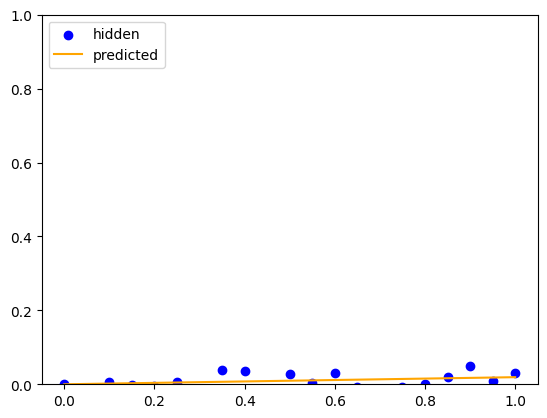

hidden param: 0.023863792419433594
initial param prediction: [0.00284041]
final param prediction: [0.01922193]


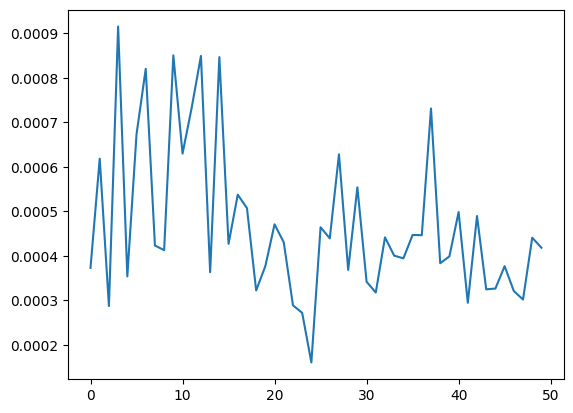

In [ ]:
seed, _ = jax.random.split(seed) # Get a new target function every time we run this cell
params, seed = initialize_params(seed)
hidden_param = jax.random.uniform(seed) # every time this and the line above get run, you get a new hidden line
train_network(seed, params, training_iterations = 100, learning_rate =.1 )


Great! now you have a spell (function) that given a SPECIFIC hidden slope, can predict it.

Could we get a spell that works with all linear functions, regardless of slope??

### Random hidden param every iteration

In [ ]:
# STRATEGY
# 1) Edit network so that at every forward pass, you have a different hidden slope

# That's easy, we add a single line of code to our previous train_network spell. (line 8)

In [ ]:
def train_network(seed, params, training_iterations = 100, learning_rate = .1):
  # The next 4 lines are for knowing what the initial prediction was
  hidden_param = jax.random.uniform(seed)
  y_vals = sample_hidden_function(hidden_param, seed)
  initial_prediction = fit_function(params, y_vals)
  loss_history = []

  for i in range(training_iterations):
    seed, _ = jax.random.split(seed)
    hidden_param = jax.random.uniform(seed) # A single line of code to randomize the hidden param every iteration

    this_gradient = g_loss(params, hidden_param, seed)

    params[0] = params[0] - learning_rate * this_gradient[0]
    params[1] = params[1] - learning_rate * this_gradient[1]
    params[2] = params[2] - learning_rate * this_gradient[2]
    params[3] = params[3] - learning_rate * this_gradient[3]
    params[4] = params[4] - learning_rate * this_gradient[4]

    cur_loss = loss(params, hidden_param, seed)
    if i%int(training_iterations / 8) == 0:
      print(f"The current loss is: {cur_loss}")
    if i%int(training_iterations / 50) == 0:
      loss_history.append(cur_loss)

  hidden_vals = sample_hidden_function(hidden_param, seed)
  predicted_param = fit_function(params, hidden_vals)
  predicted_y_vals = predicted_linear_function(predicted_param)
  plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
  plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
  plt.ylim(0, 1)
  plt.legend(loc="upper left")
  plt.show()
  plt.plot(loss_history)
  print(f'hidden param: {hidden_param}')
  print(f'initial param prediction: {initial_prediction}')
  print(f'final param prediction: {predicted_param}')



The current loss is: 0.008139239624142647
The current loss is: 0.000508548691868782
The current loss is: 0.00035347387893125415
The current loss is: 0.000247552408836782
The current loss is: 0.0002680390316527337
The current loss is: 0.0002967219625134021
The current loss is: 0.00029882637318223715
The current loss is: 0.0003269292355980724


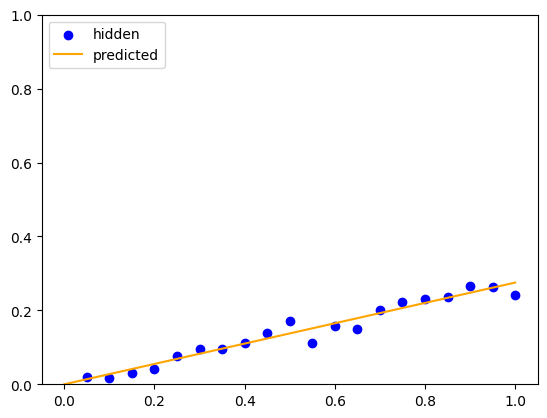

hidden param: 0.29032576084136963
initial param prediction: [0.02186859]
final param prediction: [0.2751527]


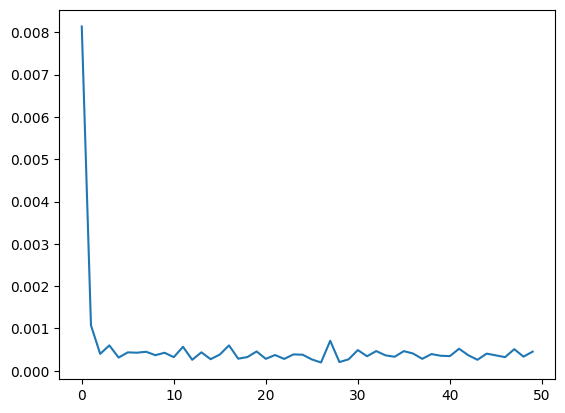

In [ ]:
seed, _ = jax.random.split(seed) # Get a new target function every time we run this cell
params, seed = initialize_params(seed)
train_network(seed, params, training_iterations = 1000, learning_rate =.1 )


Now we can randomly choose hidden slopes, and our single function we learnt should be able to predict!

(run multiple times to see if it predicts different slopes)

Hidden param: 0.182
Predicted param: 0.191 



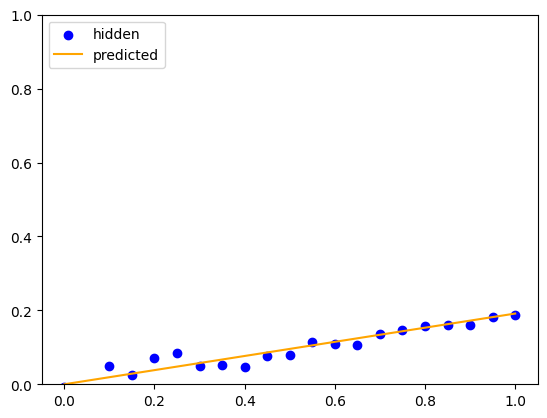

In [ ]:
seed, _ = jax.random.split(seed)
hidden_param = jax.random.uniform(seed)
print(f'Hidden param: {hidden_param:.3}')
hidden_vals = sample_hidden_function(hidden_param, seed)
predicted_param = fit_function(params, hidden_vals)
print(f'Predicted param: {predicted_param[0]:.3} \n')
predicted_y_vals = predicted_linear_function(predicted_param)
plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
plt.ylim(0, 1)
plt.legend(loc="upper left")
plt.show()

What do the distribution of params (weights / bias) look like?

In [ ]:
for idx, val in enumerate(params):
  hist_color =''
  if idx % 2:
    print(f' Layer {idx//2} BIAS')
    hist_color = 'orangered'
  else:
    print(f' Layer {idx//2} WEIGHTS')
    hist_color = 'blue'
  fig = px.histogram(params[idx].flatten(), color_discrete_sequence = [hist_color])
  fig.update_layout(width=500, height=100, margin=dict(l=10, r=10, b=10, t=10))
  fig.show()


 Layer 0 WEIGHTS


 Layer 0 BIAS


 Layer 1 WEIGHTS


 Layer 1 BIAS


 Layer 2 WEIGHTS


It seems to work pretty well for the ranges of slopes it was trained on (range 0 to 1), but what about outside of those numbers? Higher numbers like 12?

### Testing with large numbers

What about for large numbers? (like 12)

Hidden param: 1.15e+02
Predicted param: 1.13e+02 

It seems to work for higher positive slopes like 12


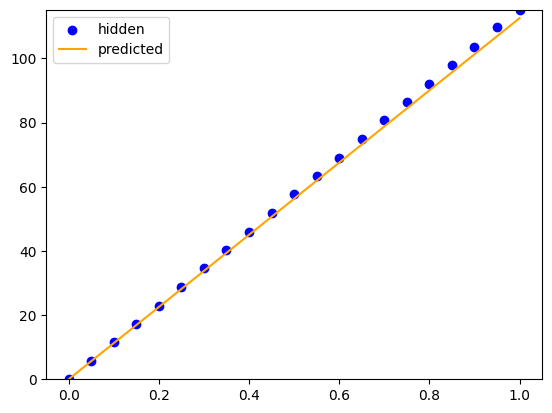

In [ ]:
seed, _ = jax.random.split(seed)
hidden_param = jax.random.uniform(seed,minval = 8, maxval = 200)
print(f'Hidden param: {hidden_param:.3}') # the only line that changed
hidden_vals = sample_hidden_function(hidden_param, seed, noise=.1)
predicted_param = fit_function(params, hidden_vals)
print(f'Predicted param: {predicted_param[0]:.3} \n')
predicted_y_vals = predicted_linear_function(predicted_param)
plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
plt.ylim([min(0,hidden_param), max(hidden_param,1)])
plt.legend(loc="upper left")
print(f'It seems to work for higher positive slopes like 12')
plt.show()

### Testing with noisy inputs

What about more **noisy** hidden signals that it wasn't trained for?

Hidden param: 0.398
Predicted param: 0.326 

Impressive!! even with high noise it does well


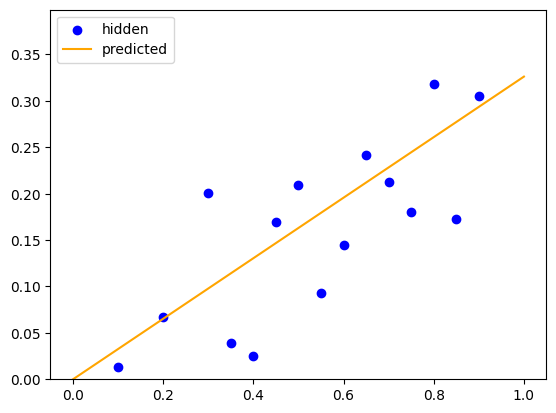

In [ ]:
seed, _ = jax.random.split(seed)
hidden_param = jax.random.uniform(seed,minval = 0, maxval = 1)
print(f'Hidden param: {hidden_param:.3}')
hidden_vals = sample_hidden_function(hidden_param, seed, noise = .1) # the only line that changed. Adding more noise
predicted_param = fit_function(params, hidden_vals)
print(f'Predicted param: {predicted_param[0]:.3} \n')
predicted_y_vals = predicted_linear_function(predicted_param)
plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
plt.ylim([0, hidden_param])
plt.legend(loc="upper left")
print(f'Impressive!! even with high noise it does well')
plt.show()

### Testing with Negative numbers

What about negative numbers?

Hidden param: -0.906
Predicted param: -0.134 

Negative predictions don't seem very good. Generally all negative predictions are around -.05 slope regardless of magnitude 


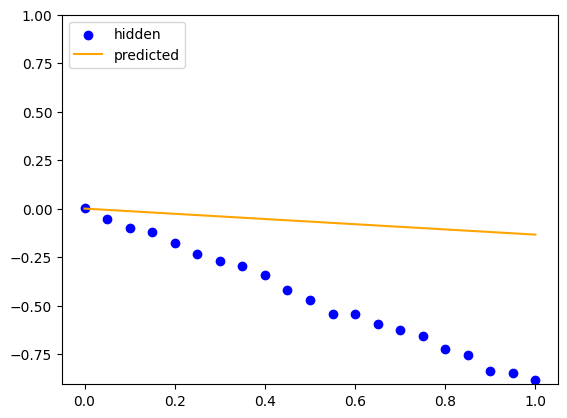

In [ ]:
seed, _ = jax.random.split(seed)
hidden_param = jax.random.uniform(seed,minval = -1, maxval = 0)
print(f'Hidden param: {hidden_param:.3}')
hidden_vals = sample_hidden_function(hidden_param, seed)
predicted_param = fit_function(params, hidden_vals)
print(f'Predicted param: {predicted_param[0]:.3} \n')
predicted_y_vals = predicted_linear_function(predicted_param)
plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
plt.ylim([min(0,hidden_param), max(hidden_param,1)])
plt.legend(loc="upper left")
print(f"Negative predictions don't seem very good. Generally all negative predictions are around -.05 slope regardless of magnitude ")
plt.show()

To check comprehension, could you fix it so that it also works for negative numbers?

What structure would need to be present in the inputs? How might it affect the architecture if there were negative numbers?


The current loss is: 0.0613400936126709
The current loss is: 0.00042193493572995067
The current loss is: 0.0005999308777973056
The current loss is: 0.0005448514129966497
The current loss is: 0.0005250009126029909
The current loss is: 0.0004450209380593151
The current loss is: 0.0006143200444057584
The current loss is: 0.0003684164839796722


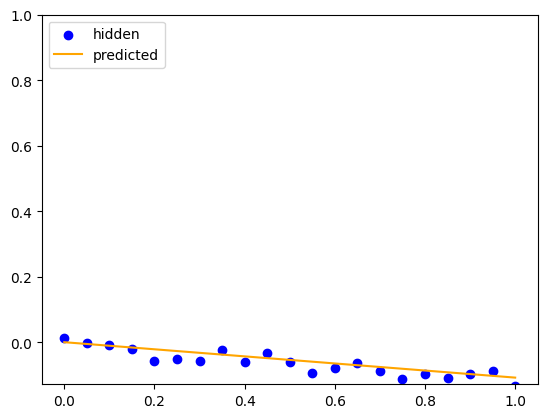

hidden param: -0.12848854064941406
initial param prediction: [0.06028617]
final param prediction: [-0.10814478]


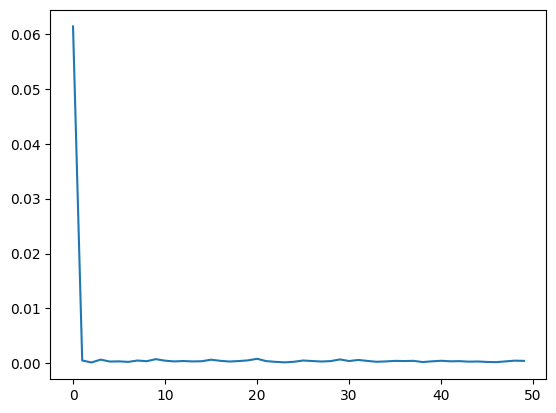

In [ ]:
# Here is one answer:

def train_network(seed, params, training_iterations = 100, learning_rate = .1):
  hidden_param = jax.random.uniform(seed)
  y_vals = sample_hidden_function(hidden_param, seed)
  initial_prediction = fit_function(params, y_vals)
  loss_history = []

  for i in range(training_iterations):
    seed, _ = jax.random.split(seed)
    hidden_param = jax.random.uniform(seed,minval = -1, maxval = 1) # A single line of code to extend the training to negative numbers

    this_gradient = g_loss(params, hidden_param, seed)

    params[0] = params[0] - learning_rate * this_gradient[0]
    params[1] = params[1] - learning_rate * this_gradient[1]
    params[2] = params[2] - learning_rate * this_gradient[2]
    params[3] = params[3] - learning_rate * this_gradient[3]
    params[4] = params[4] - learning_rate * this_gradient[4]

    cur_loss = loss(params, hidden_param, seed)
    if i%int(training_iterations / 8) == 0:
      print(f"The current loss is: {cur_loss}")
    if i%int(training_iterations / 50) == 0:
      loss_history.append(cur_loss)

  hidden_vals = sample_hidden_function(hidden_param, seed)
  predicted_param = fit_function(params, hidden_vals)
  predicted_y_vals = predicted_linear_function(predicted_param)
  plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
  plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
  plt.ylim([min(0,hidden_param), max(hidden_param,1)])
  plt.legend(loc="upper left")
  plt.show()
  plt.plot(loss_history)
  print(f'hidden param: {hidden_param}')
  print(f'initial param prediction: {initial_prediction}')
  print(f'final param prediction: {predicted_param}')

seed, _ = jax.random.split(seed) # Get a new target function every time we run this cell
params, seed = initialize_params(seed)
hidden_param = jax.random.uniform(seed,minval = -1, maxval = 0)
train_network(seed, params, training_iterations = 1000, learning_rate =.1 )


Hidden param: -0.0704
Predicted param: -0.0645 



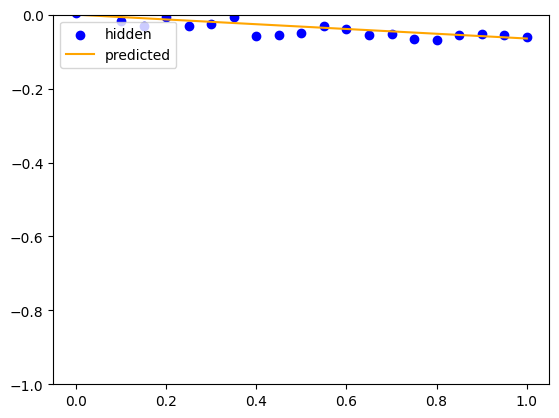

In [ ]:
seed, _ = jax.random.split(seed)
hidden_param = jax.random.uniform(seed,minval = -1, maxval = 0)
print(f'Hidden param: {hidden_param:.3}')
hidden_vals = sample_hidden_function(hidden_param, seed)
predicted_param = fit_function(params, hidden_vals)
print(f'Predicted param: {predicted_param[0]:.3} \n')
predicted_y_vals = predicted_linear_function(predicted_param)
plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
plt.legend(loc="upper left")
plt.ylim(-1, 0)
plt.show()

Question: interesting obervation is that the last mat mult is likely allowing things to be neg because ReLUs have flat curvature for neg numbers

??? if leaky relu has an oppen bottom, why does -10, ,10 range also work?
Question: likely weights are blowing up by being huge values. (training unstable). Lowering learning rate might work. Also things like L2 or layer norm might work.

??? what causes Nans?
Question: Not just divide by zero, but multiply times infinity.

??? If range is -1 to 1, why doesn't tanh work?
Question: It's because you are not doing batches for inputs. perhaps your network might need to be more complex (likely width)

??? Normally for data with negative numbers, would you remap to 0 to 1??? and remap back at prediction time? What about z score? In practice what are the most common ways to clean up data? std dev? z score?
Question: yes, if you know roughly the range. Some people have a stateful running average of what you could normalize by.

??? why batching?
Question: batching is targeting a specific type of noise. imagien you are in ocean, things are choppy. every direction it choppy in all dimensions. Take gradient in one direction, but batch averages directions to walk toward. One bad gradient nudge can get the entire network stuck. group consensus will prevent things like this from happening.





Hidden param: 0.905
Predicted param: 0.926 



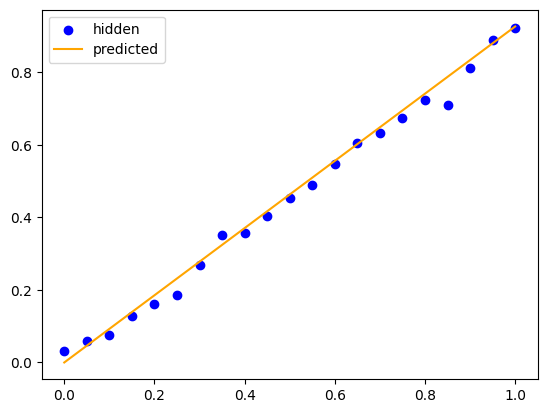

In [ ]:
seed, _ = jax.random.split(seed)
hidden_param = jax.random.uniform(seed,minval = -1, maxval = 1)
print(f'Hidden param: {hidden_param:.3}')
hidden_vals = sample_hidden_function(hidden_param, seed)
predicted_param = fit_function(params, hidden_vals)
print(f'Predicted param: {predicted_param[0]:.3} \n')
predicted_y_vals = predicted_linear_function(predicted_param)
plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
plt.legend(loc="upper left")
plt.show()

We can next try a couple of ideas:

Learn about batches of inputs

We can predict dual variable (slope and intercept)

We can preict a quadratic or sinusoidal function

is learning a single parameter that makes up a function harder than learning the entire function?

HOMEWORK:

Try batch inputs
   * do you need to give zeros to fwd layer after training?
      * Jax handles this if you only need one

* Try curvy function.
  * Try dual variable

*Should we look at layer norm and other regularization
  * Look at MNIST classifier
  * Look at ablations when you remove layer norm

Reproduce previous examples with Optax and Flax


This will come in handy when introspecting into why some trained models work and others don't

In [ ]:
from google.colab import files
filename = 'params2x5.npz'
def save_params(filename):
  np.savez(filename, params = params )
  files.download(filename)
# save_params()

In [ ]:
  # tmp_data = np.load(filename, allow_pickle=True)
  # new_params = [vals for vals in tmp_data['params']]
  # print(f'layer depth: {len(new_params)//2}\nNeuron width = {new_params[0].shape[0]}')

In [ ]:
def load_params(prefix = None):
  uploaded_file = files.upload()
  filename = list(uploaded_file.keys())[0]
  tmp_data = np.load(filename, allow_pickle=True)
  for var in tmp_data.files:
    var_name = var
    if prefix:
      var_name = prefix + var
    else:
      var_name = var
    if var_name == 'params':
      new_params = [vals for vals in tmp_data['params']] # change top level to be list not numpy array
      print(f'# of layers: {len(new_params)//2}\nNeuron width = {new_params[0].shape[0]}')
      globals()[var_name] = new_params
    else:
      globals()[var_name] = tmp_data[var]
# load_params()


## Neural Sinusoidal regression - Single variable

In [ ]:
#@title Boilter plate imports
import numpy as np
import jax
import optax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


# import plotly.graph_objects as go
seed = jax.random.PRNGKey(0)

Hidden param: 0.557
Predicted param: 0.79 

The predicted and actual most likely don't match:


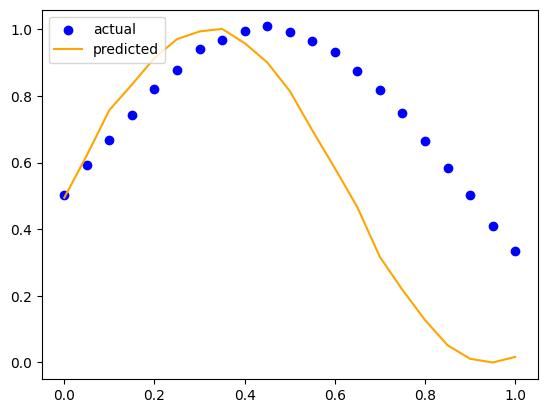

In [ ]:
#@title Sampling the hidden function & creating out linear prediction (run multiple times to get different results)

num_samples = 21
x_vals  = jnp.linspace(0,1,num_samples)

def sample_hidden_function(hidden_parameter, seed, noise = 0.02):
  noise_scaled = jax.random.normal(seed, shape=[num_samples]) * noise * hidden_parameter
  offset = jnp.ones(num_samples)
  y_vals = (jnp.sin(x_vals * hidden_parameter * jnp.pi * 2) + noise_scaled + offset) / (offset * 2.0)   # we multiply times pi so that and then times 7 to keep the ranges that can be described by num_samples interesting
  return y_vals

seed, _ = jax.random.split(seed) # Get a new target function every time we run this cell
hidden_param = jax.random.uniform(seed, minval = 0, maxval = 1)  # every time this and the line above get run, you get a new hidden line
print(f'Hidden param: {hidden_param:.3}')
y_vals = sample_hidden_function(hidden_param, seed)

seed, _ = jax.random.split(seed)
predicted_param = jax.random.uniform(seed, minval = 0, maxval = 1)
print(f'Predicted param: {predicted_param:.3} \n')
predicted_vals = sample_hidden_function(predicted_param, seed)

#Let's visualize it.
print(f"The predicted and actual most likely don't match:")
plt.scatter(x_vals, y_vals, label="actual" , color = "blue")
plt.plot(x_vals, predicted_vals, label="predicted", color = "orange")
plt.legend(loc="upper left")
plt.show()



In [ ]:
def initialize_params(seed, depth = 4, width = 8):
  scale = 1./jnp.sqrt(width)
  seed, _ = jax.random.split(seed)
  random_params = [(scale) * jax.random.normal(seed,[width,num_samples]), jnp.zeros([width,])]
  depth -= 1 # because we manually add the start and end
  for layer in range(depth):
    seed, _ = jax.random.split(seed)
    random_params.append((scale) * jax.random.normal(seed,[width,width])) #weights
    random_params.append(jnp.zeros([width,])) # bias
  random_params.append((scale)*jax.random.normal(seed,[1,width]))
  return random_params, seed

params, seed = initialize_params(seed)

for idx, val in enumerate(params):
  if idx % 2:
    print(f'{val.shape}      bias \n -----------------')
  else:
    print(f'Layer {idx//2 + 1}')
    print(f'{val.shape}   weights')



Layer 1
(8, 21)   weights
(8,)      bias 
 -----------------
Layer 2
(8, 8)   weights
(8,)      bias 
 -----------------
Layer 3
(8, 8)   weights
(8,)      bias 
 -----------------
Layer 4
(8, 8)   weights
(8,)      bias 
 -----------------
Layer 5
(1, 8)   weights


In [ ]:
def fit_function(params, data):
  num_layers = len(params) // 2 # since there are weights / bias pairs, use modulo
  for iterator in range(num_layers):
    mat_mult = params[iterator * 2] @ data
    bias = mat_mult + params[iterator * 2 + 1]
    activation = jax.nn.relu(bias)
    data = activation
  last_layer = params[-1]@data
  return last_layer
fit_function(params,y_vals)

Array([0.00638764], dtype=float32)

In [ ]:
def loss(params, hidden_param, seed): # since this will be used by g_loss, params need to be the first argument
  y_vals = sample_hidden_function(hidden_param, seed)
  predicted_param = fit_function(params, y_vals)
  seed, _ = jax.random.split(seed)
  predicted_y_vals = sample_hidden_function(predicted_param, seed)
  return jnp.mean(jnp.square(predicted_y_vals - y_vals))

g_loss = jax.jit(jax.grad(loss, 0))

In [ ]:
def train_network(seed, params, training_iterations = 100, learning_rate = .1):
  seed, _ = jax.random.split(seed)
  hidden_param = jax.random.uniform(seed, minval = 0, maxval = 1)
  initial_y_vals = sample_hidden_function(hidden_param, seed)
  initial_param_prediction = fit_function(params, initial_y_vals)
  loss_history = []

  for i in range(training_iterations): # MAIN LOOP
    seed, _ = jax.random.split(seed)
    training_hidden_param = jax.random.uniform(seed, minval = 0, maxval = 1)
    # Get new gradient (THE MAIN MAGIC)
    this_gradient = g_loss(params, training_hidden_param, seed)

    # update params:
    for idx, val in enumerate(params):
      params[idx] = params[idx] - learning_rate * this_gradient[idx]

    # The rest of this func is purely for human debugging / comprehension
    cur_loss = loss(params, training_hidden_param, seed)
    # Every N iterations, print and log the loss
    num_print_calls = 30
    if i%int(training_iterations / num_print_calls) == 0: # have the print outs be proportional to the size of the iterations
      print(f"{int(i//(training_iterations / num_print_calls)+1)}/ {num_print_calls} loss = {cur_loss:.5f}")
    if i%int(training_iterations / 200) == 0: # have the loss curve resolution be proportional to the size of the iterations
      loss_history.append(cur_loss)
  # visualize it

  post_param_prediction = fit_function(params, initial_y_vals)
  seed, _ = jax.random.split(seed)
  predicted_y_vals = sample_hidden_function(post_param_prediction, seed)
  plt.scatter(x_vals, initial_y_vals, label="hidden", color = "blue")
  plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
  plt.ylim(0, 1)
  plt.legend(loc="upper left")
  plt.show()
  plt.plot(loss_history)
  plt.show()
  print(f'hidden param: {hidden_param}')
  print(f'final param prediction: {post_param_prediction}')
  print(f'initial param prediction: {initial_param_prediction}')
  return loss_history, params



1/ 30 loss = 0.24054
2/ 30 loss = 0.16338
3/ 30 loss = 0.05485
4/ 30 loss = 0.03762
5/ 30 loss = 0.05793
6/ 30 loss = 0.03254
7/ 30 loss = 0.08396
8/ 30 loss = 0.12854
9/ 30 loss = 0.12456
10/ 30 loss = 0.00177
11/ 30 loss = 0.01015
12/ 30 loss = 0.00210
13/ 30 loss = 0.02496
14/ 30 loss = 0.11471
15/ 30 loss = 0.10079
16/ 30 loss = 0.02963
17/ 30 loss = 0.11395
18/ 30 loss = 0.11236
19/ 30 loss = 0.00016
20/ 30 loss = 0.00287
21/ 30 loss = 0.07757
22/ 30 loss = 0.11816
23/ 30 loss = 0.00033
24/ 30 loss = 0.09913
25/ 30 loss = 0.09813
26/ 30 loss = 0.10992
27/ 30 loss = 0.04616
28/ 30 loss = 0.01864
29/ 30 loss = 0.00883
30/ 30 loss = 0.02168


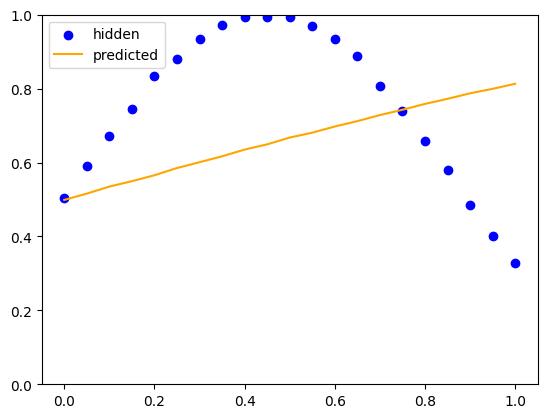

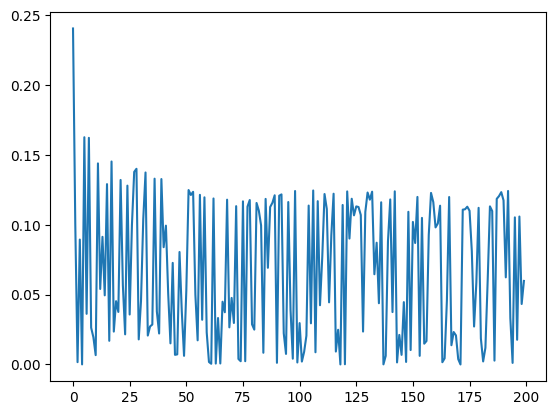

hidden param: 0.5605741739273071
final param prediction: [0.10769632]
initial param prediction: [-0.03654344]


In [ ]:
#@title Train network
seed, _ = jax.random.split(seed)
params, seed = initialize_params(seed, depth = 4, width = 8)
loss_history, params = train_network(seed, params, training_iterations = 15000, learning_rate = .001 )

Hidden param: 0.561
Predicted param: 0.108 



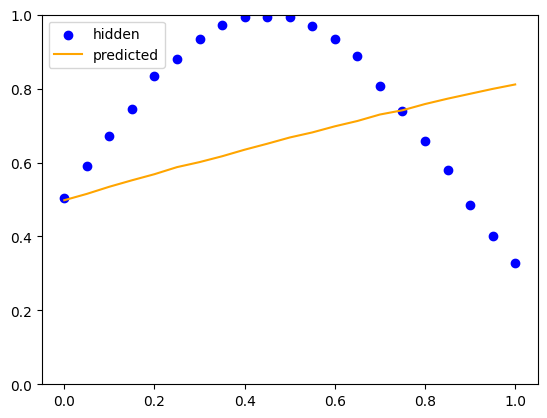

In [ ]:
#@title Run multiple times to see if different results are working
seed, _ = jax.random.split(seed)
hidden_param = jax.random.uniform(seed, minval = 0, maxval = 1)
print(f'Hidden param: {hidden_param:.3}')
hidden_vals = sample_hidden_function(hidden_param, seed)
predicted_param = fit_function(params, hidden_vals)
print(f'Predicted param: {predicted_param[0]:.3} \n')
seed, _ = jax.random.split(seed)
predicted_y_vals = sample_hidden_function(predicted_param, seed)
plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()


In [ ]:
# That didn't work... Let's do some real situation debugging

# What could it be?

# Could it be that the input data range is negative and we are using Relu which flattens the negative numbers?
 # TRIED - I forced the inputs to be  within 0 to 1 range
# We could look at the weights to see how they are behaving.
  # TRIED - looking at ranges of params, they seemed normal. Also, checked for inf and nans, none
# We could look at the relationship between the hidden and predicted params by mapping a 2D plot of it.
  # TRIED - oddly enough they are in the shape of a sine wave. Not sure what that means.
# should we change the width / depth of our network
  # TRIED - changing the width, and depth no luck.
# Simplified problem by looking at sine wave frequency range at start where it's almost linear?
    # TRIED - yes, that works. This proves nothing wrong with the network.
# To make things easier to test: you can lower variables like num_samples since you don't need 50 num_samples for seeing a seeing a simple sine wave
  # TRIED - lowering from 50 num_samples to 15
# sweep of hyper params
  # do any of the possible options ever work? does network have capacity to solve answer?
  # The difference betewen:  is it hard to find optimal minim vs is it even possible with this network setup?
    # TRIED - I randommly sumpled upon a good solution early while training, so it is possible with this network to capture a sine wave.

# ANSWER!!!! - 1) Increase learning rate than what I was initially testing
#          2) During training, sweep through learning rates to go from rough to fine.
#          See next code cell for example.


#Things I didn't get to try:
  # To evaluate the entire model, we are testing it on a single curve, shouldn't we be evaluaiting it on multiple samples form the dataset and averaging all those out?
  # maybe we need to use batch inputs?
  # try adam optimizer?
  # right now we are trying to have a function memorize regression over a 'range'. what if you just do a 'single' hidden param?
  # Is MSE the right error loss for curvy functions?

#Questions
  #??? are there things in fancier architectures like flax that recucitate after finding nans? (go back to best loss and keep training?)

### Creating a learning rate schedule (learning rate annealing)

 CURRENT LEARNING RATE = 0.10000000149011612
1/ 30 loss = 0.00053
2/ 30 loss = 0.00109
3/ 30 loss = 0.05492
4/ 30 loss = 0.08236
5/ 30 loss = 0.12052
6/ 30 loss = 0.11422
7/ 30 loss = 0.11876
8/ 30 loss = 0.00100
9/ 30 loss = 0.12326
10/ 30 loss = 0.11137
11/ 30 loss = 0.10782
12/ 30 loss = 0.00006
13/ 30 loss = 0.02969
14/ 30 loss = 0.00070
15/ 30 loss = 0.12397
16/ 30 loss = 0.00281
17/ 30 loss = 0.11918
18/ 30 loss = 0.02431
19/ 30 loss = 0.09450
20/ 30 loss = 0.08305
21/ 30 loss = 0.00001
22/ 30 loss = 0.12127
23/ 30 loss = 0.00124
24/ 30 loss = 0.00074
25/ 30 loss = 0.00005
26/ 30 loss = 0.06985
27/ 30 loss = 0.10174
28/ 30 loss = 0.12324
29/ 30 loss = 0.00000
30/ 30 loss = 0.12255


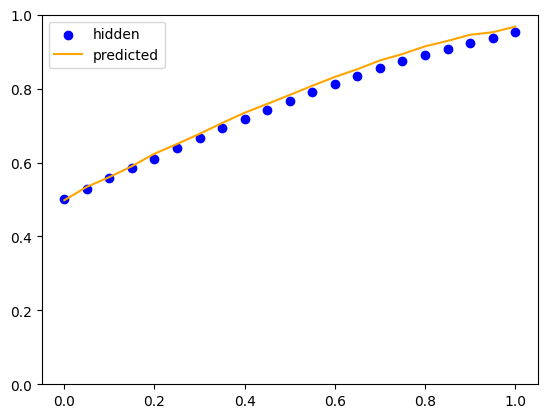

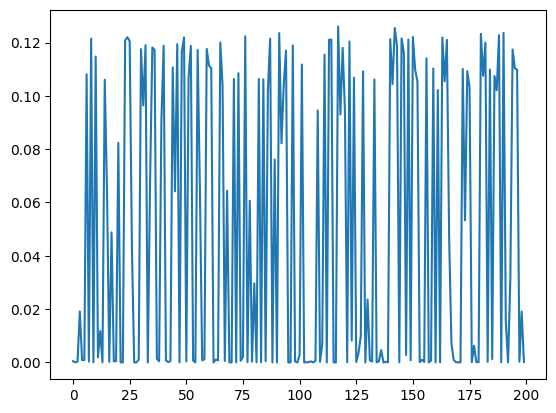

hidden param: 0.17850685119628906
final param prediction: [0.19278377]
initial param prediction: [-0.03949559]
 CURRENT LEARNING RATE = 0.06833332777023315
1/ 30 loss = 0.00005
2/ 30 loss = 0.00029
3/ 30 loss = 0.04668
4/ 30 loss = 0.08332
5/ 30 loss = 0.12052
6/ 30 loss = 0.11402
7/ 30 loss = 0.11876
8/ 30 loss = 0.00004
9/ 30 loss = 0.12316
10/ 30 loss = 0.11167
11/ 30 loss = 0.10785
12/ 30 loss = 0.00002
13/ 30 loss = 0.05474
14/ 30 loss = 0.00052
15/ 30 loss = 0.12221
16/ 30 loss = 0.00004
17/ 30 loss = 0.11903
18/ 30 loss = 0.00028
19/ 30 loss = 0.03599
20/ 30 loss = 0.00118
21/ 30 loss = 0.00041
22/ 30 loss = 0.00024
23/ 30 loss = 0.00004
24/ 30 loss = 0.00004
25/ 30 loss = 0.00000
26/ 30 loss = 0.00064
27/ 30 loss = 0.00023
28/ 30 loss = 0.00011
29/ 30 loss = 0.00001
30/ 30 loss = 0.00009


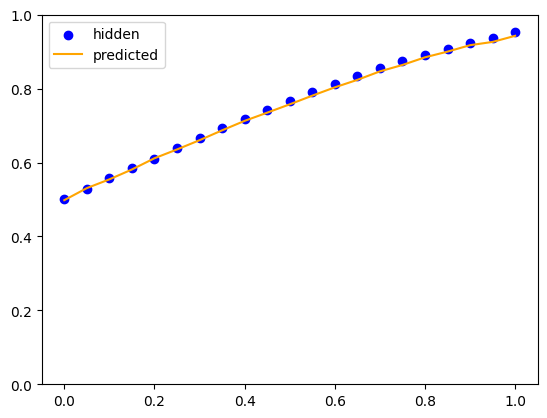

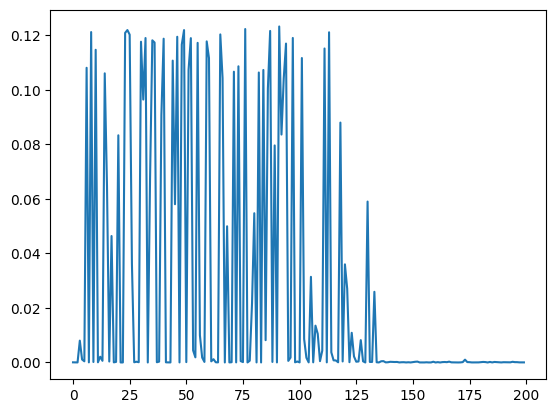

hidden param: 0.17850685119628906
final param prediction: [0.1734099]
initial param prediction: [0.19278377]
 CURRENT LEARNING RATE = 0.036666665226221085
1/ 30 loss = 0.00003
2/ 30 loss = 0.00005
3/ 30 loss = 0.00007
4/ 30 loss = 0.00005
5/ 30 loss = 0.00011
6/ 30 loss = 0.00020
7/ 30 loss = 0.00012
8/ 30 loss = 0.00001
9/ 30 loss = 0.00008
10/ 30 loss = 0.00014
11/ 30 loss = 0.00012
12/ 30 loss = 0.00001
13/ 30 loss = 0.00005
14/ 30 loss = 0.00000
15/ 30 loss = 0.00008
16/ 30 loss = 0.00004
17/ 30 loss = 0.00013
18/ 30 loss = 0.00004
19/ 30 loss = 0.00011
20/ 30 loss = 0.00005
21/ 30 loss = 0.00001
22/ 30 loss = 0.00014
23/ 30 loss = 0.00004
24/ 30 loss = 0.00003
25/ 30 loss = 0.00001
26/ 30 loss = 0.00004
27/ 30 loss = 0.00018
28/ 30 loss = 0.00012
29/ 30 loss = 0.00001
30/ 30 loss = 0.00010


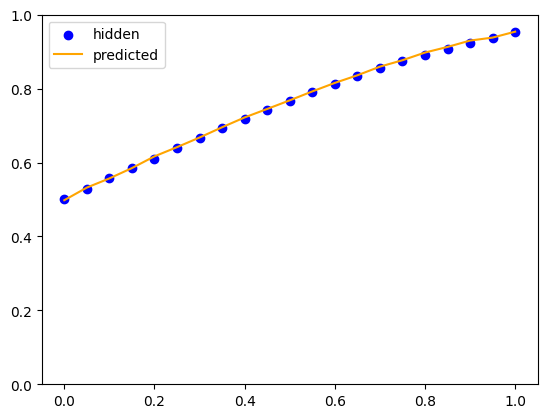

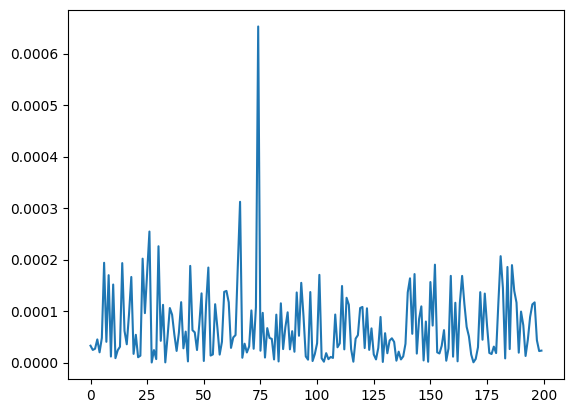

hidden param: 0.17850685119628906
final param prediction: [0.18154337]
initial param prediction: [0.1734099]
 CURRENT LEARNING RATE = 0.004999999888241291
1/ 30 loss = 0.00001
2/ 30 loss = 0.00007
3/ 30 loss = 0.00005
4/ 30 loss = 0.00006
5/ 30 loss = 0.00012
6/ 30 loss = 0.00021
7/ 30 loss = 0.00014
8/ 30 loss = 0.00001
9/ 30 loss = 0.00007
10/ 30 loss = 0.00014
11/ 30 loss = 0.00014
12/ 30 loss = 0.00002
13/ 30 loss = 0.00005
14/ 30 loss = 0.00000
15/ 30 loss = 0.00007
16/ 30 loss = 0.00004
17/ 30 loss = 0.00013
18/ 30 loss = 0.00004
19/ 30 loss = 0.00011
20/ 30 loss = 0.00005
21/ 30 loss = 0.00001
22/ 30 loss = 0.00014
23/ 30 loss = 0.00004
24/ 30 loss = 0.00003
25/ 30 loss = 0.00001
26/ 30 loss = 0.00004
27/ 30 loss = 0.00020
28/ 30 loss = 0.00011
29/ 30 loss = 0.00000
30/ 30 loss = 0.00013


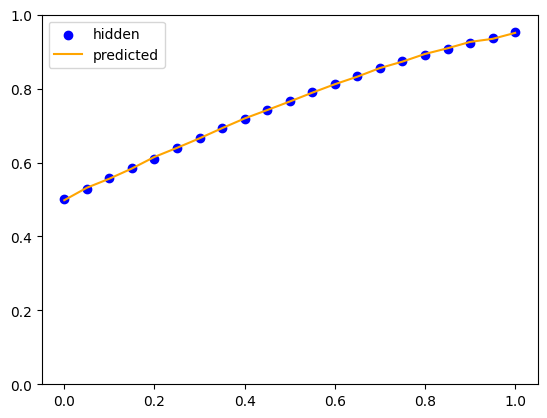

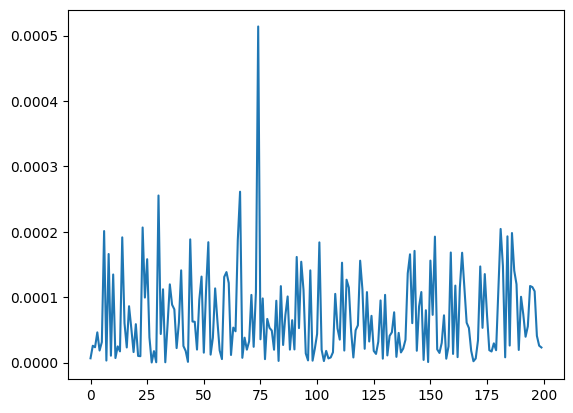

hidden param: 0.17850685119628906
final param prediction: [0.17911074]
initial param prediction: [0.18154337]


In [ ]:
seed, _ = jax.random.split(seed)
params, seed = initialize_params(seed, depth = 4, width = 8)
for cur_learning_rate in jnp.linspace(.1,.005,4):
  print(f' CURRENT LEARNING RATE = {cur_learning_rate}')
  train_network(seed, params, training_iterations = 12000, learning_rate = cur_learning_rate )

Hidden param: 0.179
Predicted param: 0.179 



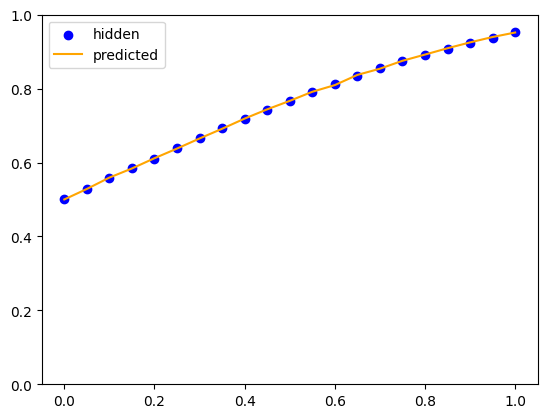

In [ ]:
#@title Run multiple times to see if different results are working
seed, _ = jax.random.split(seed)
hidden_param = jax.random.uniform(seed, minval = 0, maxval = 1)
print(f'Hidden param: {hidden_param:.3}')
hidden_vals = sample_hidden_function(hidden_param, seed)
predicted_param = fit_function(params, hidden_vals)
print(f'Predicted param: {predicted_param[0]:.3} \n')
seed, _ = jax.random.split(seed)
predicted_y_vals = sample_hidden_function(predicted_param, seed)
plt.scatter(x_vals, hidden_vals, label="hidden", color = "blue")
plt.plot(x_vals, predicted_y_vals, label="predicted", color = "orange")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()


In [ ]:
#@title Visualizing the matrix transformations from input to output
num_layers = len(params) // 2 # since there are weights / bias pairs, use modulo
interp_frames = 100
network_width = params[1].shape[0]
input_yy, input_xx = np.mgrid[0:1:1/interp_frames, 0:num_samples:1]
input_zz = np.zeros((interp_frames, num_samples))
activation_yy ,activation_xx = np.mgrid[0:1:1/interp_frames, 0:network_width:1]
bias_yy ,bias_xx = np.mgrid[0:1:1/interp_frames, 0:network_width:1]
mat_mult_1_zz = np.zeros((interp_frames, network_width))
mat_mult_2_zz = np.zeros((interp_frames, network_width))
bias_1_zz = np.zeros((interp_frames, network_width))
bias_2_zz = np.zeros((interp_frames, network_width))
relu_1_zz = np.zeros((interp_frames, network_width))
relu_2_zz = np.zeros((interp_frames, network_width))
hidden_vs_result = np.zeros((interp_frames,2))

for idx, hidden_param in enumerate(np.linspace(0,1,interp_frames)):
  input_zz[idx]  = sample_hidden_function(hidden_param, seed)
  mat_mult_1_zz[idx] = params[0] @ input_zz[idx]
  bias_1_zz[idx] = mat_mult_1_zz[idx] + params[1]
  relu_1_zz[idx] = jax.nn.relu(bias_1_zz[idx])
  mat_mult_2_zz[idx] = params[2] @ relu_1_zz[idx]
  bias_2_zz[idx] = mat_mult_2_zz[idx] + params[3]
  relu_2_zz[idx] = jax.nn.relu(bias_2_zz[idx])
  last_layer = params[4]@relu_2_zz[idx]
  hidden_vs_result[idx] = np.array([hidden_param,last_layer[0]])

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(horizontal_spacing=0.0, vertical_spacing=.05,rows=2, cols=4, subplot_titles=('Original inputs','Mat Mult 1','Bias 1','Relu 1 ','Mat Mult 2','Bias 2','Relu 2','Output in relation to hidden Para'), specs=[[{'type': 'scene'},{'type': 'scene'},{'type': 'scene'},{'type': 'scene'}],[{'type': 'scene'},{'type': 'scene'},{'type': 'scene'},{'type': 'xy'}]])

fig.add_trace(go.Surface(z=input_zz, x=input_xx, y=input_yy,colorscale = 'balance_r',showscale=False), row=1, col=1)
fig.add_trace(go.Surface(z=mat_mult_1_zz, x=activation_xx, y=activation_yy,colorscale = 'balance_r',showscale=False), row=1, col=2)
fig.add_trace(go.Surface(z=bias_1_zz, x=bias_xx, y=bias_yy, colorscale = 'balance_r',showscale=False), row=1, col=3)
fig.add_trace(go.Scatter3d(x=bias_xx[0], y=bias_yy[0], z=params[1],mode='lines', line=dict(color='#9467bd', width=5), showlegend=False), row=1, col=3)
fig.add_trace(go.Surface(z=relu_1_zz, x=bias_xx, y=bias_yy,colorscale = 'balance_r',showscale=False), row=1, col=4)
fig.add_trace(go.Surface(z=mat_mult_2_zz, x=activation_xx, y=activation_yy,colorscale = 'balance_r',showscale=False), row=2, col=1)
fig.add_trace(go.Surface(z=bias_2_zz, x=bias_xx, y=bias_yy, colorscale = 'balance_r',showscale=False), row=2, col=2)
fig.add_trace(go.Scatter3d(x=bias_xx[0], y=bias_yy[0], z=params[3],mode='lines', line=dict(color='#9467bd', width=5), showlegend=False), row=2, col=2)
fig.add_trace(go.Surface(z=relu_2_zz, x=bias_xx, y=bias_yy,colorscale = 'balance_r',showscale=False), row=2, col=3)
fig.add_trace(px.line(x = hidden_vs_result[:,0], y = hidden_vs_result[:,1]).data[0], row=2, col=4)
fig.update_layout(autosize=False, width=1700, height=1000,
                  scene = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Original inputs'), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene2 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Mat Mult 1', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene3 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Bias 1', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene4 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Relu 1 ', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene5 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Mat Mult 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene6 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Bias 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene7 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Relu 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene8 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Output in relation to hidden Param', nticks=3)),
                  margin=dict(l=0, r=0, b=10, t=55)) # reduce white margins around 3D renderer
fig.show()

In [ ]:
'''
???
  * If matrix are linear transformations, in step 0, inputs are a straight line, but mat_mutl_1 has curves. Why?
  * What patterns could each neuron be picking up? slope, number of curvature changes, average height of values,
  * Where are the if statements in a neural network? Is is specificially the relu?

observations
  * It would be a fun exercise to ask people to manually come up with the pre activation graph that solves the answer
  * What are plaussible strategies for manually solving this problem?
    * memorize values to numbers
    * Creating a look up table for the last input number tells you half of the answers. Ratio of 14 to 15 tells you the rest.
  * true statement are positive values (everything else gets cut off by activataion)
  * if statements are created by multiplying two curves together. Anything multiplied by 0 will be 0.
Question:
Questions:
  * How do you know if your network is memorizing / generalizing:
    * What happens outside of the range in which you trained it?
    * Drop out might tell you resiliency of network
    * truncate network at a certain depth and see if you can still solve problem

What does relu turn off from the inputs
 Wiggle freq instead of inputs so that it's more in domain to the original training dataset.
'''

"\n???\n  * If matrix are linear transformations, in step 0, inputs are a straight line, but mat_mutl_1 has curves. Why?\n  * What patterns could each neuron be picking up? slope, number of curvature changes, average height of values,\n  * Where are the if statements in a neural network? Is is specificially the relu?\n\nobservations\n  * It would be a fun exercise to ask people to manually come up with the pre activation graph that solves the answer\n  * What are plaussible strategies for manually solving this problem?\n    * memorize values to numbers\n    * Creating a look up table for the last input number tells you half of the answers. Ratio of 14 to 15 tells you the rest.\n  * true statement are positive values (everything else gets cut off by activataion)\n  * if statements are created by multiplying two curves together. Anything multiplied by 0 will be 0.\n\nD:\n  * How do you know if your network is memorizing / generalizing:\n    * What happens outside of the range in which yo

In [ ]:
num_layers = len(params) // 2 # since there are weights / bias pairs, use modulo
interp_frames = 10
network_width = params[1].shape[0]
input_yy, input_xx = np.mgrid[0:1:1/interp_frames, 0:num_samples:1]
input_zz = np.zeros((interp_frames, num_samples))
activation_yy ,activation_xx = np.mgrid[0:1:1/interp_frames, 0:network_width:1]
bias_yy ,bias_xx = np.mgrid[0:1:1/interp_frames, 0:network_width:1]
mat_mult_1_zz = np.zeros((interp_frames, network_width))
mat_mult_2_zz = np.zeros((interp_frames, network_width))
bias_1_zz = np.zeros((interp_frames, network_width))
bias_2_zz = np.zeros((interp_frames, network_width))
relu_1_zz = np.zeros((interp_frames, network_width))
relu_2_zz = np.zeros((interp_frames, network_width))
hidden_vs_result = np.zeros((interp_frames,2))

for idx, hidden_param in enumerate(np.linspace(0,1,interp_frames)):
  input_zz[idx]  = np.ones(num_samples) * .5
  input_zz[idx,0] = hidden_param
  mat_mult_1_zz[idx] = params[0] @ input_zz[idx]
  bias_1_zz[idx] = mat_mult_1_zz[idx] + params[1]
  relu_1_zz[idx] = jax.nn.relu(bias_1_zz[idx])
  mat_mult_2_zz[idx] = params[2] @ relu_1_zz[idx]
  bias_2_zz[idx] = mat_mult_2_zz[idx] + params[3]
  relu_2_zz[idx] = jax.nn.relu(bias_2_zz[idx])
  last_layer = params[4]@relu_2_zz[idx]
  hidden_vs_result[idx] = np.array([hidden_param,last_layer[0]])

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(horizontal_spacing=0.0, vertical_spacing=.05,rows=2, cols=4, subplot_titles=('Original inputs','Mat Mult 1','Bias 1','Relu 1 ','Mat Mult 2','Bias 2','Relu 2','Output in relation to hidden Para'), specs=[[{'type': 'scene'},{'type': 'scene'},{'type': 'scene'},{'type': 'scene'}],[{'type': 'scene'},{'type': 'scene'},{'type': 'scene'},{'type': 'xy'}]])

fig.add_trace(go.Surface(z=input_zz, x=input_xx, y=input_yy,colorscale = 'balance_r',showscale=False), row=1, col=1)
fig.add_trace(go.Surface(z=mat_mult_1_zz, x=activation_xx, y=activation_yy,colorscale = 'balance_r',showscale=False), row=1, col=2)
fig.add_trace(go.Surface(z=bias_1_zz, x=bias_xx, y=bias_yy, colorscale = 'balance_r',showscale=False), row=1, col=3)
fig.add_trace(go.Scatter3d(x=bias_xx[0], y=bias_yy[0], z=params[1],mode='lines', line=dict(color='#9467bd', width=5), showlegend=False), row=1, col=3)
fig.add_trace(go.Surface(z=relu_1_zz, x=bias_xx, y=bias_yy,colorscale = 'balance_r',showscale=False), row=1, col=4)
fig.add_trace(go.Surface(z=mat_mult_2_zz, x=activation_xx, y=activation_yy,colorscale = 'balance_r',showscale=False), row=2, col=1)
fig.add_trace(go.Surface(z=bias_2_zz, x=bias_xx, y=bias_yy, colorscale = 'balance_r',showscale=False), row=2, col=2)
fig.add_trace(go.Scatter3d(x=bias_xx[0], y=bias_yy[0], z=params[3],mode='lines', line=dict(color='#9467bd', width=5), showlegend=False), row=2, col=2)
fig.add_trace(go.Surface(z=relu_2_zz, x=bias_xx, y=bias_yy,colorscale = 'balance_r',showscale=False), row=2, col=3)
# fig.add_trace(px.line(x = hidden_vs_result[:,0], y = hidden_vs_result[:,1]).data[0], row=2, col=4)
fig.update_layout(autosize=False, width=1700, height=1000,
                  scene = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Original inputs'), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene2 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Mat Mult 1', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene3 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Bias 1', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene4 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Relu 1 ', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene5 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Mat Mult 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene6 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Bias 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene7 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Relu 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  # scene8 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Output in relation to hidden Param', nticks=3)),
                  margin=dict(l=0, r=0, b=10, t=55)) # reduce white margins around 3D renderer
fig.show()

In [ ]:
num_layers = len(params) // 2 # since there are weights / bias pairs, use modulo
interp_frames = 10
network_width = params[1].shape[0]
input_yy, input_xx = np.mgrid[0:1:1/interp_frames, 0:num_samples:1]
input_zz = np.zeros((interp_frames, num_samples))
activation_yy ,activation_xx = np.mgrid[0:1:1/interp_frames, 0:network_width:1]
bias_yy ,bias_xx = np.mgrid[0:1:1/interp_frames, 0:network_width:1]
mat_mult_1_zz = np.zeros((interp_frames, network_width))
mat_mult_2_zz = np.zeros((interp_frames, network_width))
bias_1_zz = np.zeros((interp_frames, network_width))
bias_2_zz = np.zeros((interp_frames, network_width))
relu_1_zz = np.zeros((interp_frames, network_width))
relu_2_zz = np.zeros((interp_frames, network_width))
hidden_vs_result = np.zeros((interp_frames,2))

for idx, hidden_param in enumerate(np.linspace(0,1,interp_frames)):
  input_zz[idx]  = np.ones(num_samples) * .5
  input_zz[idx,-1] = hidden_param
  mat_mult_1_zz[idx] = params[0] @ input_zz[idx]
  bias_1_zz[idx] = mat_mult_1_zz[idx] + params[1]
  relu_1_zz[idx] = jax.nn.relu(bias_1_zz[idx])
  mat_mult_2_zz[idx] = params[2] @ relu_1_zz[idx]
  bias_2_zz[idx] = mat_mult_2_zz[idx] + params[3]
  relu_2_zz[idx] = jax.nn.relu(bias_2_zz[idx])
  last_layer = params[4]@relu_2_zz[idx]
  hidden_vs_result[idx] = np.array([hidden_param,last_layer[0]])

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(horizontal_spacing=0.0, vertical_spacing=.05,rows=2, cols=4, subplot_titles=('Original inputs','Mat Mult 1','Bias 1','Relu 1 ','Mat Mult 2','Bias 2','Relu 2','Output in relation to hidden Para'), specs=[[{'type': 'scene'},{'type': 'scene'},{'type': 'scene'},{'type': 'scene'}],[{'type': 'scene'},{'type': 'scene'},{'type': 'scene'},{'type': 'xy'}]])

fig.add_trace(go.Surface(z=input_zz, x=input_xx, y=input_yy,colorscale = 'balance_r',showscale=False), row=1, col=1)
fig.add_trace(go.Surface(z=mat_mult_1_zz, x=activation_xx, y=activation_yy,colorscale = 'balance_r',showscale=False), row=1, col=2)
fig.add_trace(go.Surface(z=bias_1_zz, x=bias_xx, y=bias_yy, colorscale = 'balance_r',showscale=False), row=1, col=3)
fig.add_trace(go.Scatter3d(x=bias_xx[0], y=bias_yy[0], z=params[1],mode='lines', line=dict(color='#9467bd', width=5), showlegend=False), row=1, col=3)
fig.add_trace(go.Surface(z=relu_1_zz, x=bias_xx, y=bias_yy,colorscale = 'balance_r',showscale=False), row=1, col=4)
fig.add_trace(go.Surface(z=mat_mult_2_zz, x=activation_xx, y=activation_yy,colorscale = 'balance_r',showscale=False), row=2, col=1)
fig.add_trace(go.Surface(z=bias_2_zz, x=bias_xx, y=bias_yy, colorscale = 'balance_r',showscale=False), row=2, col=2)
fig.add_trace(go.Scatter3d(x=bias_xx[0], y=bias_yy[0], z=params[3],mode='lines', line=dict(color='#9467bd', width=5), showlegend=False), row=2, col=2)
fig.add_trace(go.Surface(z=relu_2_zz, x=bias_xx, y=bias_yy,colorscale = 'balance_r',showscale=False), row=2, col=3)
# fig.add_trace(px.line(x = hidden_vs_result[:,0], y = hidden_vs_result[:,1]).data[0], row=2, col=4)
fig.update_layout(autosize=False, width=1700, height=1000,
                  scene = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Original inputs'), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene2 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Mat Mult 1', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene3 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Bias 1', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene4 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Relu 1 ', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene5 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Mat Mult 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene6 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Bias 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  scene7 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Relu 2', nticks=5), camera = dict(up=dict(x=0,y=0,z=1),center=dict(x=0,y=0,z=0),eye=dict(x=.7,y=-2.75,z=.95))),
                  # scene8 = dict(yaxis=dict(title = 'hidden_param sweep'), xaxis=dict(title = 'Output in relation to hidden Param', nticks=3)),
                  margin=dict(l=0, r=0, b=10, t=55)) # reduce white margins around 3D renderer
fig.show()

In [ ]:
#@title Are NaNs or Inf. present in weights?
print(f'Nans present: {jnp.any(jnp.array([jnp.any(jnp.isnan(i)) == True for i in params]) == True)}')
print(f'Inf present: {jnp.any(jnp.array([jnp.any(jnp.isinf(i)) == True for i in params]) == True)}')


Nans present: False
Inf present: False


In [ ]:
#@title What do the distribution of params (weights / bias) look like?
for idx, val in enumerate(params):
  hist_color =''
  if idx % 2:
    print(f' Layer {idx//2} BIAS')
    hist_color = 'orangered'
  else:
    print(f' Layer {idx//2} WEIGHTS')
    hist_color = 'blue'
  fig = px.histogram(params[idx].flatten(), color_discrete_sequence = [hist_color])
  fig.update_layout(width=500, height=100, margin=dict(l=10, r=10, b=10, t=10))
  fig.show()


 Layer 0 WEIGHTS


 Layer 0 BIAS


 Layer 1 WEIGHTS


 Layer 1 BIAS


 Layer 2 WEIGHTS


 Layer 2 BIAS


 Layer 3 WEIGHTS


 Layer 3 BIAS


 Layer 4 WEIGHTS


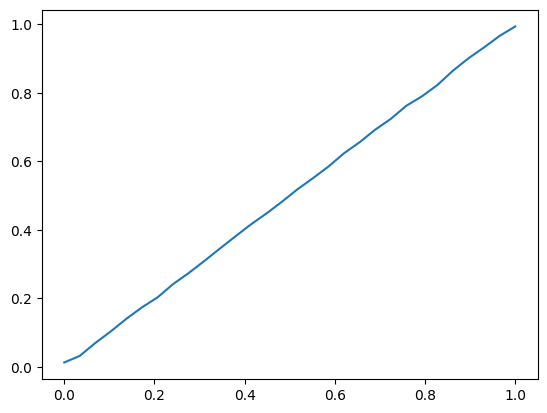

In [ ]:
#@title  Sweeping through hidden params to see predicted params

# Instead of looking at the final curves, what is the relationship between the
# predicted and actual hidden param?
x = []
y = []
for i in jnp.linspace(0,1,30):
  x.append(i)
  seed, _ = jax.random.split(seed)
  hidden_param = i
  hidden_vals = sample_hidden_function(hidden_param, seed)
  predicted_param = fit_function(params, hidden_vals)
  y.append(predicted_param)
plt.plot(x,y,)

#Intro to langauge models


Before we build transformers, it's important to get a real understanding for what unique problems they can solve that MLPs can't.

With that ethos of practical understanding, we will try to get MLP to predict next token on Shapespere dataset ands see where it succeeded / fails. We will begin with one hot encodings and move up to pre-trained word embeddings.

GOALS:

*   Create StarWars scrip data loader
*   Split giant block of text into tokens that make sense (if only broken up by whitespace the string 'hello!' would be different than 'hello'
*   Encode dataset using new tokens
*   Build way to randomly sample N tokens from the sequence
*   Look at distribution of words
*   Look at Ngram distributions
*   Build generative model that noisily samples from the mode of the distribution

Questions

*   What about the word's character level, is there any meaningful structure in the words.






In [ ]:
#@title StarWars script data loader
import re
import numpy as np
import requests

url = 'https://raw.githubusercontent.com/alonsorobots/ML-tutorials/main/star-wars-scripts.txt'
response = requests.get(url)
original_scripts = response.text

print(original_scripts[:500])


A NEW HOPE

A long time ago, in a galaxy far, far, away...

A vast sea of stars serves as the backdrop for the main title. War drums echo through the heavens as a rollup slowly crawls into infinity.

It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire.

During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the Death Star, an armored space station with enough power to dest


##Split up tokens

How do we break up the dataset into units of meaningful tokens?

*   Do characters have semantic meaning by themselves?
*   Do sub-words? (such as submarine, made up of "sub" and "marine")
*   Do words?
  *   This seems like a fairly obvious answer, but:
     * How do you even know what words are?
        * Do we look them up in a dictionary?
        * Is there something about the distribution of characters that tells us that it might be more than random chance (repetition)?

There are many ways to create tokens, but for now lets start with word tokens.







## Words Tokens

In [ ]:
#@title To simplify things a bit, let's convert uppercase letters to lower case
lowercase_scripts = original_scripts.lower()

In [ ]:
#@title Splitting text using newline (and keeping the '\n' token)
# we want to keep the line breaks so that we can create models that know how to break up sentences.
newline_split = list(filter(None, re.split('(\n)',lowercase_scripts)))
newline_split[:10]

['a new hope',
 '\n',
 '\n',
 'a long time ago, in a galaxy far, far, away...',
 '\n',
 '\n',
 'a vast sea of stars serves as the backdrop for the main title. war drums echo through the heavens as a rollup slowly crawls into infinity.',
 '\n',
 '\n',
 'it is a period of civil war. rebel spaceships, striking from a hidden base, have won their first victory against the evil galactic empire.']

In [ ]:
#@title Splitting text using whitespace
whitespace_split = []
for line in newline_split:
  if line != '\n':
    whitespace_split.extend(line.split())
  else:
    whitespace_split.extend(line)
print(whitespace_split[:50])

['a', 'new', 'hope', '\n', '\n', 'a', 'long', 'time', 'ago,', 'in', 'a', 'galaxy', 'far,', 'far,', 'away...', '\n', '\n', 'a', 'vast', 'sea', 'of', 'stars', 'serves', 'as', 'the', 'backdrop', 'for', 'the', 'main', 'title.', 'war', 'drums', 'echo', 'through', 'the', 'heavens', 'as', 'a', 'rollup', 'slowly', 'crawls', 'into', 'infinity.', '\n', '\n', 'it', 'is', 'a', 'period', 'of']


In [ ]:
#@title Lets look at some potential edge cases (literally) of splitting up tokens using only whitespace

token_set = set(whitespace_split)
simple_words = []
complex_words = []
for token in token_set:
  if re.search(r"[\W\d]+",token): # next separate if they have non letter symbols
    complex_words.append(token)
  else:
    simple_words.append(token)

print(f'Number of words with non letter symbols at edges of word (complex): {len(complex_words)}\n')
print([complex_words[i] for i in np.random.randint(0, len(complex_words), 50)])
print("\nIf you break up using whitespace, you will get two different tokens for 'Hello' vs 'Hello.'   Perhaps you can further split them into ['Hello','!']")

Number of words with non letter symbols at edges of word (complex): 19642

['mirror,', 'hesitate.', '"', 'dare.', 'fuel-line.', 'happen?', '(indicating', 'tc-14.', 'two...', 'nighttime,', 'mando?', '#l', 'boy!', 'lowering!', 'maneuvers.', 'forcepush.', 'gantry,', "yes...i've", 'speculation.', '(cut', 't-sixty', '(moaning)', 'jango.', 'well-earned.', 'ev-a4-d:', 'woves:', 'panaka:', 'chatter.', 'crisis?', 'device)', "there's", 'fall,', 'works?', "maul's", 'unduli,', 'sake.', 'tings,', 'worshipfulness.', 'modest,', 'poe.', 'dead...and', 'effective,', 'iego’s', 'konn?', 'flowered,', 'immunity,', 'ugly,', 'shadow’s', '...here', "'crazy"]

If you break up using whitespace, you will get two different tokens for 'Hello' vs 'Hello.'   Perhaps you can further split them into ['Hello','!']


In [ ]:
#@title Create an expression that looks splits non-alphanumeric symbols at start and end of word (But not in the middle)
# This isn't a perfect solution, but it will do for now.
split_complex_words = []
print_count = 0
print_output = ''
for word in complex_words:
  cur_split_tokens = list(filter(None, re.split(r'(^\W+|\W+$|\d)',word)))
  split_complex_words.extend(cur_split_tokens)
  if print_count < 30:
    print(f'{word} --> {str(cur_split_tokens)}')
  print_count += 1

pit-day --> ['pit-day']
living? --> ['living', '?']
fives? --> ['fives', '?']
(v.o) --> ['(', 'v.o', ')']
cheaper, --> ['cheaper', ',']
clouds. --> ['clouds', '.']
another, --> ['another', ',']
coruscant...wow...how --> ['coruscant...wow...how']
mine? --> ['mine', '?']
destroyed? --> ['destroyed', '?']
chance. --> ['chance', '.']
go! --> ['go', '!']
[gasping --> ['[', 'gasping']
l--lando. --> ['l--lando', '.']
co-pilot. --> ['co-pilot', '.']
business... --> ['business', '...']
hitches. --> ['hitches', '.']
pass. --> ['pass', '.']
shot... --> ['shot', '...']
file. --> ['file', '.']
river-day --> ['river-day']
hiding, --> ['hiding', ',']
pod, --> ['pod', ',']
eggs. --> ['eggs', '.']
mustafar? --> ['mustafar', '?']
noloff: --> ['noloff', ':']
hunter: --> ['hunter', ':']
(stands, --> ['(', 'stands', ',']
frustrated. --> ['frustrated', '.']
camie, --> ['camie', ',']


In [ ]:
#@title Creating a dictionary of unique words using that tokenizer and encode original

unsorted_dictionary = set(simple_words + split_complex_words + ['\n'])
compression_ratio = round(len(unsorted_dictionary)*100/len(token_set))
print(f'That step compressed the dictionary from {len(token_set)} to {len(unsorted_dictionary)}, {compression_ratio}%}}')
print(f'That means that {compression_ratio}% of tokens were have relationships that would have been lost otherwise!\n')

That step compressed the dictionary from 32302 to 18060, 56%}
That means that 56% of tokens were have relationships that would have been lost otherwise!



In [ ]:
print(f'Here are some examples of final tokens:')

dictionary = sorted(list(unsorted_dictionary))
print([dictionary[i] for i in np.random.randint(0, len(dictionary), 50)])
print("\nAgain.... the dictionary is not perfect, but it will do for now")

Here are some examples of final tokens:
['crossvalley', 'feelsomething', 'girds', 'munchen', 'indicating', 'shipsflying', 'peddling', 'bath', 'either', 'force-jump', 'ignited', 'unthinkable', 'deceptive', "or...i'm", '’,', "thing's", 'survivors', 'touchy', 'ticket', 'tosee', 'ready', 'surprise-attack', 'sputter', 'incidents', 'battlestations-republic', 'civilization', 'throughout', 'recognise', 'speakers', 'installation', 'gloomy-looking', 'mixer', 'hushed', 'outcropping', 'memories', 'foolhardy', 'fiery', 'theconsequences', 'finalorder', 'exceptional', 'speech', 'riot', 'reigning', 'mountainous', 'paralyzing', 'kagi', 'bins', 'snarling', 'relax', 'theindividual']

Again.... the dictionary is not perfect, but it will do for now


In [ ]:
#@title Dictionary creation function (Putting it all together)
def create_dictionary( original_scripts):
  lowercase_scripts = original_scripts.lower()
  newline_split = list(filter(None, re.split('(\n)',lowercase_scripts)))
  whitespace_split = []
  for line in newline_split:
    if line != '\n':
      whitespace_split.extend(line.split())
    else:
      whitespace_split.extend(line)
  token_set = set(whitespace_split)
  simple_words = []
  complex_words = []
  for token in token_set:
    if re.search(r"[\W\d]+",token): # next separate if they have non letter symbols
      complex_words.append(token)
    else:
      simple_words.append(token)
  split_complex_words = []
  for word in complex_words:
    cur_split_tokens = list(filter(None, re.split(r'(^\W+|\W+$|\d)',word)))
    split_complex_words.extend(cur_split_tokens)
  unsorted_dictionary = set(simple_words + split_complex_words + ['\n'])
  dictionary = sorted(list(unsorted_dictionary))
  return dictionary

dictionary = create_dictionary(original_scripts)
dictionary[100:200]

[':',
 ':)',
 ';',
 '>',
 '?',
 '?!',
 '?!!',
 '?!!!?',
 '?!"',
 '?!?',
 '?"',
 '?)',
 '?),',
 '?-',
 '?..',
 '?...',
 '?:',
 '??',
 '??!',
 '??!!',
 '??!?',
 '??)',
 '?’',
 '?�',
 '[',
 '[-',
 ']',
 '],',
 '].',
 ']:',
 'a',
 'a-blazin',
 'a-ha',
 'a-ok',
 'a-twenty',
 'a-wing',
 'a...jedi',
 'aaaall',
 'aaaargh',
 'aaaggghhh',
 'aaagh',
 'aaah',
 'aaargh',
 'aah',
 'aahhh',
 'aak',
 'aarrrrggghhhhh',
 'aawww...you',
 'aayla',
 "aayla's",
 'aback',
 'abajub',
 'abandon',
 'abandoned',
 'abandoning',
 'abang',
 'abated',
 'abducted',
 'abducting',
 'abduction',
 'abeautiful',
 'abide',
 'abilities',
 'ability',
 'ablaster',
 'ablaze',
 'able',
 'ableto',
 'ablue',
 'aboard',
 'abort',
 'about',
 'aboutthis',
 'aboutto',
 'above',
 'aboveevery',
 'abovethe',
 'abovewe',
 'abregado',
 'abright',
 'abrupt',
 'abruptly',
 'abruptness',
 'absence',
 'absolute',
 'absolutely',
 'absolutes',
 'absolutly',
 'absorbs',
 'absurd',
 'abunch',
 'abyss',
 'abyssin',
 'academy',
 'acatharsis',
 'acc

In [ ]:
#@title Encoding the script (Translating the original text using this new dictionary)
def encode(dictionary, original_scripts):
  lowercase_scripts = original_scripts.lower()
  newline_split = list(filter(None, re.split('(\n)',lowercase_scripts)))
  whitespace_split = []
  for line in newline_split:
    if line != '\n':
      whitespace_split.extend(line.split())
    else:
      whitespace_split.extend(line)
  encoded_script = []
  for token in whitespace_split:
    if token == '\n':
      encoded_script.append(dictionary.index(token))
    else:
      if re.search(r"[\W\d]+",token):
        split_complex_words = []
        cur_split_tokens = list(filter(None, re.split(r'(^\W+|\W+$|\d)',token)))
        for cur_complex_token in cur_split_tokens:
          encoded_script.append(dictionary.index(cur_complex_token))
      else:
        encoded_script.append(dictionary.index(token))
  return encoded_script

# encoded_script = encode(dictionary, original_scripts)

In [ ]:
#@title Encoding can be slow, so let's just load the answers
!pip install dill
import dill

url = 'https://raw.githubusercontent.com/alonsorobots/ML-tutorials/main/star-wars-dict-and-encoded-script.dill'
response = requests.get(url)
dictionary, encoded_script = dill.loads(response.content)
encoded_script[:30]

[130,
 10250,
 7489,
 0,
 0,
 130,
 9084,
 15974,
 412,
 45,
 7838,
 130,
 6320,
 5553,
 45,
 5553,
 45,
 1227,
 75,
 0,
 0,
 130,
 16972,
 13350,
 10518,
 14686,
 13538,
 1012,
 15584,
 1278]

In [ ]:
#@title Decoding the script
import jax
def decode( encoded_script ):
  if isinstance(encoded_script,jax.Array):
    if encoded_script.size == 1:
      return dictionary[encoded_script]
  if isinstance(encoded_script,int):
    return dictionary[encoded_script]
  decoded_script = ''
  for token in encoded_script:
    decoded_script+=(' ' +dictionary[token])
  return decoded_script

print(decode(encoded_script[:100]))

 a new hope 
 
 a long time ago , in a galaxy far , far , away ... 
 
 a vast sea of stars serves as the backdrop for the main title . war drums echo through the heavens as a rollup slowly crawls into infinity . 
 
 it is a period of civil war . rebel spaceships , striking from a hidden base , have won their first victory against the evil galactic empire . 
 
 during the battle , rebel spies managed to steal secret plans to the empire's ultimate weapon , the death


##Analysing the data distribution


In [ ]:
#@title Size of dictionary
print(f'The dictionary has a size of: {"{:,}".format(len(dictionary))}')
print(f'That means there is a {100/len(dictionary):.4f}% change of choosing a specific word')


The dictionary has a size of: 18,060
That means there is a 0.0055% change of choosing a specific word


In [ ]:
#@title Total tokens in scripts
print(f'Our encoded dataset has {"{:,}".format(len(encoded_script))} tokens in it')

Our encoded dataset has 556,534 tokens in it


Word count (Unigram distribution)

In [ ]:
import collections
counter = collections.Counter(encoded_script)
most_common = counter.most_common()
print(f'Most common tokens:\n')
for count_item in most_common[:200]:
  print(f'{repr(dictionary[count_item[0]])}     occurances: {count_item[1]} ')
  # print(f'\t\ttoken#: {count_item[0]}')

Most common tokens:

'\n'     occurances: 54907 
'.'     occurances: 40975 
'the'     occurances: 24379 
','     occurances: 19604 
':'     occurances: 15678 
'to'     occurances: 9373 
'and'     occurances: 8348 
'a'     occurances: 8136 
'of'     occurances: 6266 
'you'     occurances: 6264 
'i'     occurances: 4742 
'!'     occurances: 4492 
'is'     occurances: 4430 
'in'     occurances: 4338 
'?'     occurances: 4242 
'it'     occurances: 3550 
'on'     occurances: 3172 
'his'     occurances: 2750 
'('     occurances: 2674 
'he'     occurances: 2654 
'-'     occurances: 2643 
'we'     occurances: 2355 
'anakin'     occurances: 2326 
'as'     occurances: 2318 
'are'     occurances: 2204 
'with'     occurances: 2157 
')'     occurances: 2058 
'that'     occurances: 2056 
'this'     occurances: 2043 
'out'     occurances: 1935 
'at'     occurances: 1884 
'for'     occurances: 1843 
'obi-wan'     occurances: 1785 
'up'     occurances: 1779 
'luke'     occurances: 1741 
'have'     occu

In [ ]:
print(f'Least common tokens:\n')
for count_item in most_common[-20:]:
  print(f'{repr(dictionary[count_item[0]])}     occurances: {count_item[1]} ')
  # print(f'\t\ttoken#: {count_item[0]}')


Least common tokens:

'solved'     occurances: 1 
'bivouacked'     occurances: 1 
'interceptors'     occurances: 1 
'neutralized'     occurances: 1 
'penetration'     occurances: 1 
'misdirection'     occurances: 1 
'surrenders'     occurances: 1 
'two-seven-four-three'     occurances: 1 
'two-eight-four-six'     occurances: 1 
'mudscuffer'     occurances: 1 
'mesmerizing'     occurances: 1 
'salvo'     occurances: 1 
'accurately'     occurances: 1 
'murderous'     occurances: 1 
'blessed'     occurances: 1 
'properties'     occurances: 1 
'sparing'     occurances: 1 
'yield'     occurances: 1 
'pretender'     occurances: 1 
'dings'     occurances: 1 


In [ ]:
#@title Visualizing frequency

import plotly.express as px
import pandas as pd

df = pd.DataFrame(most_common, columns = ['token_ID', 'frequency'])
df['token_word'] = [dictionary[i[0]] for i in most_common]

print(f'Something like 50% of words are used once!!!!!')
print(f'~80% of words are used less than 10 times')
print(f'***** That means that we might not pick up complex patterns in which these words are used in different contexts!!!')
px.line(df, y = 'frequency', hover_name='token_word',log_x=False, log_y=False)

Something like 50% of words are used once!!!!!
~80% of words are used less than 10 times
***** That means that we might not pick up complex patterns in which these words are used in different contexts!!!


Possible relationships to look into:

> likelyhood of token sequences where all members are present (ngram)

> likelyhood of token sequences where tokens are present at specific locations (the token 'she' might might often be near the token 'thought' but perhaps N spaces away)

In [ ]:
np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.2f}'.format})

In [ ]:
#@title Creating Bi-gram network and occurance count
def create_bi_gram_network(dictionary, encoded_script):
  bi_gram_likelihood = [[] for i in dictionary]
  for idx, token in enumerate(encoded_script[:-1]):
    next_token = encoded_script[idx + 1]
    try:
      populated_token_list = [populated_tokens[0] for populated_tokens in bi_gram_likelihood[token]]
      next_token_idx = populated_token_list.index(next_token) # this is often the line that can trigger the exception
      bi_gram_likelihood[token][next_token_idx][1] += 1
    except:
      bi_gram_likelihood[token].append([next_token, 1])
  return bi_gram_likelihood

# bi_gram_likelihood = create_bi_gram_network(dictionary, encoded_script)

In [ ]:
#@title Convert count to probability
def convert_count_to_probability(bi_gram_likelihood, dictionary):
  normalized_sorted_bigrams = []
  for idx, token_network in enumerate(bi_gram_likelihood):
    token_network_array = np.array(token_network, dtype=float)
    token_network_array[:, 1] = token_network_array[:, 1] / np.sum(token_network_array[:, 1])
    normalized_sorted_bigrams.append(token_network_array[token_network_array[:, 1].argsort()[::-1]])
  return normalized_sorted_bigrams

# normalized_sorted_bigrams = convert_count_to_probability(bi_gram_likelihood, dictionary)

This is takes a while to compute, so let's just load it:

In [ ]:
#@title Loading bi-gram network
!pip install dill
import dill
import requests
import numpy as np

url = 'https://raw.githubusercontent.com/alonsorobots/ML-tutorials/main/star-wars-bigram-tree.dill'
response = requests.get(url)
normalized_sorted_bigrams = dill.loads(response.content)[0]

for i in np.random.randint(len(dictionary),size=30):
  print(f'word: \n  {dictionary[i]}\n bi-gram and associated probability:\n{[[dictionary[int(j[0])], j[1]] for j in normalized_sorted_bigrams[i]]}\n\n')


word: 
  saber's
 bi-gram and associated probability:
[['hilt', 1.0]]


word: 
  ton
 bi-gram and associated probability:
[['.', 1.0]]


word: 
  eliminated
 bi-gram and associated probability:
[['.', 1.0]]


word: 
  knife-
 bi-gram and associated probability:
[['9', 0.5], ['8', 0.5]]


word: 
  hello
 bi-gram and associated probability:
[[',', 0.2972972972972973], ['.', 0.24324324324324326], ['?', 0.21621621621621623], ['master', 0.05405405405405406], ['!', 0.05405405405405406], ['there', 0.05405405405405406], ['little', 0.02702702702702703], ['when', 0.02702702702702703], ['shyly', 0.02702702702702703]]


word: 
  leather-bound
 bi-gram and associated probability:
[['package', 1.0]]


word: 
  ah-twa
 bi-gram and associated probability:
[['.', 1.0]]


word: 
  stacked
 bi-gram and associated probability:
[['some', 0.25], ['in', 0.25], ['up', 0.25], ['under', 0.25]]


word: 
  judge
 bi-gram and associated probability:
[['of', 0.6], ['by', 0.2], ['me', 0.2]]


word: 
  tahyt's
 bi-gr

##Generative script using owr bi-grams!

In [ ]:
start_word = np.random.randint(len(dictionary))
sentence = [start_word]
i = 0
for i in range(1000):
  attention_token = int(sentence[-1])
  new_token = int(np.random.choice(normalized_sorted_bigrams[attention_token][:,0], p = normalized_sorted_bigrams[attention_token][:,1]))
  sentence.append(new_token)
print(' '.join([dictionary[i] for i in sentence]))

tion medon : they’ll spot at luke bends down . 
 palpatine : they notice when you know . jar . 
 
 bail organa : so back to do you made a rope , quarterstaff in picking up . the battle between tall , if you saw on ! are you . 
 just touched down . 
 cassian andor : i’ve got it to his hand . 
 luke jumps over there they race , we’ve got a worm glow across the tanks move out of 
 it's getting her . we've engaged the jedi to team to the human lifetimes . 
 
 as they overshot us , let's hope we have proper arm reaches the exterior . the other creatures are heard the debris , master anakin : hit by chewie finally , and stands up here speaks to hear the child and startfiring . 
 resustus wagatito : ( over the prisoner 
 
 comamndo droid poppers , victory . hoth - control . 
 
 
 
 
 luke adjusts some dirt to the man of corellia . jedi ? 
 as in jedi . not discuss in . death star . 
 
 
 artoo , nearly divulged his shoulders . 
 lando's proffered arm on . you copy that . after the clearing - 

Storing bigram tree as matrix

In [ ]:
# say we have word occurrences in this matrix
# rows are words
# columns are words
# entries are "number of times word in row is followed by word in column in corpus"
word_occurrences = np.array([[0, 5, 10, 20],
                              [0, 2, 4, 100],
                              [2, 4, 0, 3],
                              [3, 3, 3, 3]]) # followed by itself 0 times,

In [ ]:
# transition_probabilities = word_occurrences /
transition_probabilities = word_occurrences / np.sum(word_occurrences, axis=1).reshape((-1,1))
prob_distribution_of_next_word = np.array([1.,0.,0.,0.]) @ transition_probabilities
prob_distribution_of_next_word

array([0.00, 0.14, 0.29, 0.57])

##Neural Networkd (MLP) next token predictor

Input: N random words, and 1 missing token
Output: likely missing word

Four ways that I can think of to set it up:
1.   Missing token is always the last of a sequence (predict token given past)
2.   Missing token is always the first of a sequence (predict token given future)
3.   Missing token is always in the middle of a sequence (predict token given n tokens of past and future)
4.   Missing token can be any index inside of a sequence (predict token given potential past and or present)

In [ ]:
#@title Things I did:
'''
* Didn't properly solve tracer errors of slicing an array (dynamic length)
  * As hack created dataset with pre-extracted slices
* Normalized dicitonary so it was a float form 0 to 1 (vs an interger of 0 to ~18k)
  * Is this better? should it be 0-1 or -1 to 1?
  Question: I'm not sure I would suggest this.
* It's likely that a binary loss will not be sufficient to learn (no gradient)
  Question: Correct, you should never use an actual binary loss, since there is no graident.
'''

"\n* Didn't properly solve tracer errors of slicing an array (dynamic length)\n  * As hack created dataset with pre-extracted slices\n* Normalized dicitonary so it was a float form 0 to 1 (vs an interger of 0 to ~18k)\n  * Is this better? should it be 0-1 or -1 to 1?\n  D: I'm not sure I would suggest this.\n* It's likely that a binary loss will not be sufficient to learn (no gradient)\n  D: Correct, you should never use an actual binary loss, since there is no graident.\n"

In [ ]:
#@title Quesitons

'''
* Ways of making it non-binary
  * Could there be a loss based on not matching word distribution found in original?
  Question: Yes, this is something people do. It's an expensive computation since you need many samples of the output to compare the distributions.
* The outputs of the randomly initialized params ran throught the fit func are outside of the range of the ideal distribution. Does that matter?
   * Sometimes it mostly gives negative numebrs and all our outputs will be from 0 to 1
  Question: People tried doing things like this in the past, but now they just brute force.
* Why randomly sample from dataset, vs go item by sequence by sequence?? or at least prevent repretitive sampling from same items?
  Question: People do in practice sample only once, but at random.
* Do we need to learn about perplexity, KL-Divergance?
  Question: It's up to you. Doesn't seem completely necessary.
'''

"\n* Ways of making it non-binary\n  * Could there be a loss based on not matching word distribution found in original?\n  D: Yes, this is something people do. It's an expensive computation since you need many samples of the output to compare the distributions.\n* The outputs of the randomly initialized params ran throught the fit func are outside of the range of the ideal distribution. Does that matter?\n   * Sometimes it mostly gives negative numebrs and all our outputs will be from 0 to 1\n  D: People tried doing things like this in the past, but now they just brute force.\n* Why randomly sample from dataset, vs go item by sequence by sequence?? or at least prevent repretitive sampling from same items?\n  D: People do in practice sample only once, but at random.\n* Do we need to learn about perplexity, KL-Divergance?\n  D: It's up to you. Doesn't seem completely necessary.\n"

In [ ]:
#@title Boilerplate
!pip install dill
import numpy as np
import jax
import jax.numpy as jnp
seed = jax.random.PRNGKey(0)
import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd
import dill
import plotly.express as px


# Fetch the file from GitHub
url = 'https://raw.githubusercontent.com/alonsorobots/ML-tutorials/main/star-wars-dict-and-encoded-script.dill'
response = requests.get(url)
dictionary, encoded_script = dill.loads(response.content)

np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.5f}'.format})
encoded_script = jnp.array(encoded_script)

In [ ]:
def decode( encoded_data):
  if isinstance(encoded_data,jax.Array):
    if encoded_data.size == 1:
      if encoded_data < 0 or encoded_data >= 1:
        return 'TOKEN_OUTSIDE_RANGE'
      else:
        return dictionary[round(encoded_data * len(dictionary))]
  decoded_script = ''
  for token in encoded_data:
    if token < 0 or token >= 1:
      decoded_script+= ' TOKEN_OUTSIDE_RANGE'
    else:
      decoded_script+=(' ' +dictionary[round(token * len(dictionary))]) # un-normalize with length of script
  return decoded_script

decode(jnp.array(.899))

'transferring'

In [ ]:
#@title Create dataset of N sequential samples

def create_dataset(encoded_script, dataset_size = 100000, token_size = 5):
  dataset = np.zeros((dataset_size, token_size),float)
  for idx,val in enumerate(dataset):
    random_index = np.random.randint(0,len(encoded_script) - token_size)
    dataset[idx] = encoded_script[random_index:random_index + token_size]
  dataset /= len(dictionary) # normalize dataset (0 to 1)
  return jnp.array(dataset)
dataset = create_dataset(encoded_script)

In [ ]:
#@title Data Loader
def sample_inputs(dataset, seed):
  random_index = jax.random.randint(seed,[1],0,len(dataset))
  return dataset[random_index,:-1][0]
print(f'input: \t{decode(sample_inputs(dataset, seed))}')

def sample_hidden_token(dataset, seed):
  random_index = jax.random.randint(seed,[1],0,len(dataset))
  return dataset[random_index,-1][0]
print(f'hidden_token: {decode(sample_hidden_token(dataset, seed))}')
seed, _ = jax.random.split(seed)

input: 	 the ship in orbit
hidden_token: .


In [ ]:
def initialize_params(seed, depth = 5, width = 40, num_samples = 4):
  scale = 1./jnp.sqrt(width) * 1.5 +.05 # The initial predictions were being out of range so I added this??? perhaps this is bad
  seed, _ = jax.random.split(seed)
  random_params = [(scale) * jax.random.normal(seed,[width, num_samples]), jnp.zeros([width,])]
  depth -= 1 # because we manually add the start and end
  for layer in range(depth):
    seed, _ = jax.random.split(seed)
    random_params.append((scale) * jax.random.normal(seed,[width, width])) #weights
    random_params.append(jnp.zeros([width,])) # bias
  random_params.append((scale) * jax.random.normal(seed,[1, width]))
  return random_params, seed

params, seed = initialize_params(seed)
seed, _ = jax.random.split(seed)
inputs = sample_inputs(dataset, seed)

print(f'{inputs.shape} Inputs \n -----------------')
for idx, val in enumerate(params):
  if idx % 2:
    print(f'{val.shape}      bias \n -----------------')
  else:
    print(f'Layer {idx//2 + 1}')
    print(f'{val.shape}   weights')

# params[0] @ inputs

(4,) Inputs 
 -----------------
Layer 1
(40, 4)   weights
(40,)      bias 
 -----------------
Layer 2
(40, 40)   weights
(40,)      bias 
 -----------------
Layer 3
(40, 40)   weights
(40,)      bias 
 -----------------
Layer 4
(40, 40)   weights
(40,)      bias 
 -----------------
Layer 5
(40, 40)   weights
(40,)      bias 
 -----------------
Layer 6
(1, 40)   weights


In [ ]:
def fit_function(params, inputs):
  depth = len(params) // 2 # since there are weights / bias pairs, use modulo
  for layer in range(depth):
    mat_mult = params[layer * 2] @ inputs
    bias = mat_mult + params[layer * 2 + 1]
    activation = jax.nn.relu(bias)
    inputs = activation
  last_layer = params[-1] @ inputs
  return last_layer[0] #???? Is this correct to change the type here? out dictionary addresses are ints not floats

seed, _ = jax.random.split(seed)
inputs = sample_inputs(dataset, seed)
predicted_token = fit_function(params, inputs)
print(f'{predicted_token}')
print(f'predicted_token: {decode(predicted_token)}')

0.4952816069126129
predicted_token: lifepods


predicted tokens: [Array(0.14272, dtype=float32), Array(0.11080, dtype=float32), Array(-0.30354, dtype=float32), Array(-0.73046, dtype=float32), Array(-0.10888, dtype=float32), Array(0.86192, dtype=float32), Array(0.08722, dtype=float32), Array(0.10508, dtype=float32), Array(0.31467, dtype=float32), Array(-0.71088, dtype=float32), Array(1.14309, dtype=float32), Array(-0.13314, dtype=float32), Array(0.24481, dtype=float32), Array(-0.52499, dtype=float32), Array(-0.45964, dtype=float32), Array(0.22006, dtype=float32), Array(0.50913, dtype=float32), Array(0.82487, dtype=float32), Array(0.47161, dtype=float32), Array(0.19725, dtype=float32), Array(0.26411, dtype=float32), Array(0.58657, dtype=float32), Array(-0.13912, dtype=float32), Array(1.09213, dtype=float32), Array(0.52210, dtype=float32), Array(-0.06272, dtype=float32), Array(0.33425, dtype=float32), Array(0.11849, dtype=float32), Array(0.05391, dtype=float32), Array(0.06918, dtype=float32), Array(0.21943, dtype=float32), Array(0.142

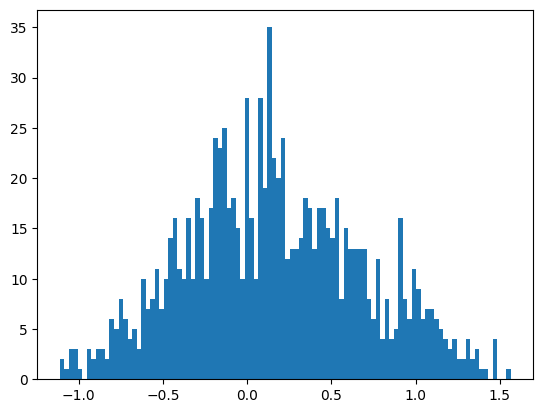

In [ ]:
outputs = []
for i in range(1000):
  seed, _ = jax.random.split(seed)
  inputs = sample_inputs(dataset, seed)
  predicted_token = fit_function(params, inputs)
  outputs.append(predicted_token)
print(f'predicted tokens: {outputs}')
plt.hist(outputs,100)
plt.show()

In [ ]:
# One can already imagine an issue of there not being enough of a gradient for this binary loss
# The rewards are too sparse. It will get the correct answer, every len(dictionary) iterations

def loss(params, seed):
  inputs = sample_inputs(dataset, seed)
  hidden_token = sample_hidden_token(dataset, seed)
  predicted_token = fit_function(params, inputs)
  predicted_word = round(predicted_token * len(dictionary))
  hidden_word = round(hidden_token * len(dictionary))
  return (predicted_word != hidden_word).astype(float)

#Sanity check, at random params, it should still give a right answer every once in while
# for i in range(len(dictionary)):
#   seed, _ = jax.random.split(seed)
#   if loss(params, seed) == 0:
#     print(f'TRUE')

g_loss = jax.jit(jax.grad(loss,0))

In [ ]:
def train_network(seed, params, training_iterations = 100, learning_rate = .1):
  loss_history = []

  for i in range(training_iterations): # MAIN LOOP
    seed, _ = jax.random.split(seed)
    # Get new gradient (THE MAIN MAGIC)
    this_gradient = g_loss(params, seed)

    # update params:
    for idx, val in enumerate(params):
      params[idx] = params[idx] - learning_rate * this_gradient[idx]

    # The rest of this func is purely for human debugging / comprehension

    # Every N iterations, print and log the loss
    num_print_calls = 30
    if i%int(training_iterations / num_print_calls) == 0: # have the print outs be proportional to the size of the iterations
      cur_loss = loss(params, seed)
      print(f"{int(i//(training_iterations / num_print_calls)+1)}/ {num_print_calls} loss = {cur_loss:.5f}")
    if i%int(training_iterations / 200) == 0: # have the loss curve resolution be proportional to the size of the iterations
      cur_loss = loss(params, seed)
      loss_history.append(cur_loss)
  # visualize it
  plt.plot(loss_history)
  plt.show()
  return loss_history, params

1/ 30 loss = 1.00000
2/ 30 loss = 1.00000
3/ 30 loss = 1.00000
4/ 30 loss = 1.00000
5/ 30 loss = 1.00000
6/ 30 loss = 1.00000
7/ 30 loss = 1.00000
8/ 30 loss = 1.00000
9/ 30 loss = 1.00000
10/ 30 loss = 1.00000
11/ 30 loss = 1.00000
12/ 30 loss = 1.00000
13/ 30 loss = 1.00000
14/ 30 loss = 1.00000
15/ 30 loss = 1.00000
16/ 30 loss = 1.00000
17/ 30 loss = 1.00000
18/ 30 loss = 1.00000
19/ 30 loss = 1.00000
20/ 30 loss = 1.00000
21/ 30 loss = 1.00000
22/ 30 loss = 1.00000
23/ 30 loss = 1.00000
24/ 30 loss = 1.00000
25/ 30 loss = 1.00000
26/ 30 loss = 1.00000
27/ 30 loss = 1.00000
28/ 30 loss = 1.00000
29/ 30 loss = 1.00000
30/ 30 loss = 1.00000


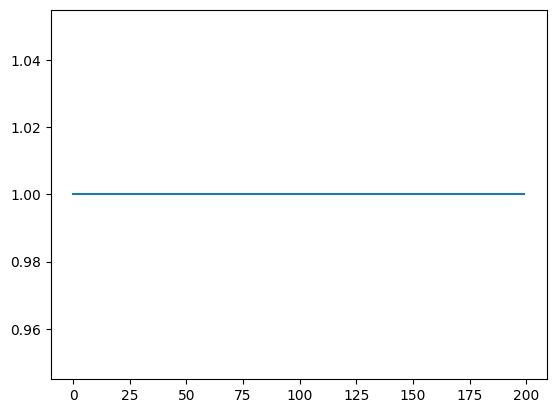

In [ ]:
#@title Train network
seed, _ = jax.random.split(seed)
params, seed = initialize_params(seed, depth = 5, width = 40,)
loss_history, params = train_network(seed, params, training_iterations = 18000 * 2, learning_rate = .001 )


Successfully predicted token!


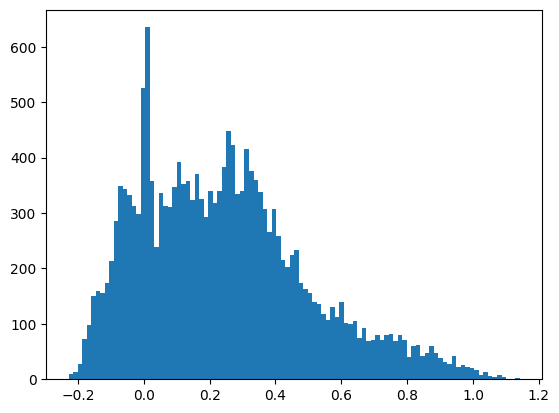

In [ ]:
#@title Let's check the range of the predictions
outputs = []
for i in range(len(dictionary)):
  seed, _ = jax.random.split(seed)
  inputs = sample_inputs(dataset, seed)
  hidden_token = sample_hidden_token(dataset, seed)
  hidden_word = round(hidden_token * len(dictionary))
  predicted_token = fit_function(params, inputs)
  predicted_word = round(predicted_token * len(dictionary))
  if predicted_word == hidden_word:
      print(f'Successfully predicted token!')
  outputs.append(predicted_token)
plt.hist(outputs,100)
plt.show()

## Vmap


In [ ]:
#@title  Vmap basics ( useuful for using batches as inputs)
# vmap turns a function that acts on inputs with dim [x] into a function that acts on inputs with dimension [b, x]
import jax.numpy as jnp

def f(x):
  return x*x

input = jnp.array([1,2,3])

print(f"Not vmap'd yet.  Output: {f(input)} with input shape {input.shape}")

v_f = jax.vmap(f)

batched_input = jnp.array([ [1,2,3],
                          [2,3,4],
                          [5,6,7] ])
print(f"After vmap'd.  Output: {v_f(batched_input)} with input shape {batched_input.shape}")

Not vmap'd yet.  Output: [1 4 9] with input shape (3,)
After vmap'd.  Output: [[ 1  4  9]
 [ 4  9 16]
 [25 36 49]] with input shape (3, 3)


In [ ]:
def g(x, y):
  return x * y
x = 3
y = jnp.array([1,2,3])
print(f"Not vmap'd yet.  Output: {g(x,y)} with input shape {y.shape}")

v_g = jax.vmap(g, in_axes=[None, 0]) # in_axes is saying, look at params, only vectorize / iterate through these input params

batched_y = jnp.array([ [1,2,3],
                        [2,3,4],
                        [5,6,7] ])

v_g(x, batched_y)

Not vmap'd yet.  Output: [3 6 9] with input shape (3,)


Array([[ 3,  6,  9],
       [ 6,  9, 12],
       [15, 18, 21]], dtype=int32)

##Neural BPE token prediction

In [ ]:
#@title Boilerplate

!pip install dill
import dill
import numpy as np
import jax
from jax.config import config
config.update("jax_debug_nans", False)
import jax.numpy as jnp
import matplotlib.pyplot as plt
import plotly.express as px
import re
import numpy as np
import requests
import json
import os
import pandas as pd

url = 'https://raw.githubusercontent.com/alonsorobots/ML-tutorials/main/star-wars-scripts.txt'
response = requests.get(url)
original_scripts = response.text

np.set_printoptions(suppress=True,formatter={'float_kind':'{:0.5f}'.format})

seed = jax.random.PRNGKey(0)
seed, _ = jax.random.split(seed)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.5 MB/s eta 0:00:00


<ipython-input-1-70faf9bea379>:7: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


### Using BPE tokens

In [ ]:
"""
BPE encoding (minGPT implementation by Andrej Karpathy)
https://github.com/karpathy/minGPT/blob/master/mingpt/bpe.py

bpe is short for Byte Pair Encoder. It translates arbitrary utf-8 strings into
sequences of integers, where each integer represents small chunks of commonly
occuring characters. This implementation is based on openai's gpt2 encoder.py:
https://github.com/openai/gpt-2/blob/master/src/encoder.py
but was mildly modified because the original implementation is a bit confusing.
I also tried to add as many comments as possible, my own understanding of what's
going on.
"""
import json
import regex as re


# -----------------------------------------------------------------------------

def bytes_to_unicode():
    """
    Every possible byte (really an integer 0..255) gets mapped by OpenAI to a unicode
    character that represents it visually. Some bytes have their appearance preserved
    because they don't cause any trouble. These are defined in list bs. For example:
    chr(33) returns "!", so in the returned dictionary we simply have d[33] -> "!".
    However, chr(0), for example, is '\x00', which looks ugly. So OpenAI maps these
    bytes, into new characters in a range where chr() returns a single nice character.
    So in the final dictionary we have d[0] -> 'Ā' instead, which is just chr(0 + 2**8).
    In particular, the space character is 32, which we can see by ord(' '). Instead,
    this function will shift space (32) by 256 to 288, so d[32] -> 'Ġ'.
    So this is just a simple one-to-one mapping of bytes 0..255 into unicode characters
    that "look nice", either in their original form, or a funny shifted character
    like 'Ā', or 'Ġ', etc.
    """
    # the 188 integers that render fine in their original form and need no shifting
    bs = list(range(ord("!"), ord("~")+1))+list(range(ord("¡"), ord("¬")+1))+list(range(ord("®"), ord("ÿ")+1))
    cs = bs[:] # all integers b in bs will simply map to chr(b) in the output dict
    # now get the representations of the other 68 integers that do need shifting
    # each will get mapped chr(256 + n), where n will grow from 0...67 in the loop
    n = 0
    for b in range(2**8):
        if b not in bs:
            # if this byte is "ugly" then map it to the next available "nice" character
            bs.append(b)
            cs.append(2**8+n)
            n += 1
    cs = [chr(n) for n in cs]
    d = dict(zip(bs, cs))
    return d

def get_pairs(word):
    """
    Return all bigrams as a set of tuples, of consecutive elements in the iterable word.
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs

class Encoder:

    def __init__(self, encoder, bpe_merges):
        # byte encoder/decoder
        self.byte_encoder = bytes_to_unicode()
        self.byte_decoder = {v:k for k, v in self.byte_encoder.items()}
        # bpe token encoder/decoder
        self.encoder = encoder
        self.decoder = {v:k for k,v in self.encoder.items()}
        # bpe merge list that defines the bpe "tree", of tuples (a,b) that are to merge to token ab
        self.bpe_ranks = dict(zip(bpe_merges, range(len(bpe_merges))))
        # the splitting pattern used for pre-tokenization
        # Should haved added re.IGNORECASE so BPE merges can happen for capitalized versions of contractions <-- original openai comment
        """
        ok so what is this regex looking for, exactly?
        python re reference: https://docs.python.org/3/library/re.html
        - the vertical bars | is OR, so re.findall will chunkate text as the pieces match, from left to right
        - '\'s' would split up things like Andrej's -> (Andrej, 's)
        - ' ?\p{L}': optional space followed by 1+ unicode code points in the category "letter"
        - ' ?\p{N}': optional space followed by 1+ unicode code points in the category "number"
        - ' ?[^\s\p{L}\p{N}]+': optional space, then 1+ things that are NOT a whitespace, letter or number
        - '\s+(?!\S)': 1+ whitespace characters (e.g. space or tab or etc) UNLESS they are followed by non-whitespace
                       so this will consume whitespace characters in a sequence but exclude the last whitespace in
                       that sequence. that last whitespace has the opportunity to then match the optional ' ?' in
                       earlier patterns.
        - '\s+': 1+ whitespace characters, intended probably to catch a full trailing sequence of whitespaces at end of string
        So TLDR:
        - we are special casing a few common apostrophe constructs ('s, 't, 're, ...) and making those into separate tokens
        - we then separate out strings into consecutive chunks of 1) letters, 2) numbers, 3) non-letter-numbers, 4) whitespaces
        """
        self.pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")
        self.cache = {}

    def bpe(self, token):
        """
        this function uses self.bpe_ranks to iteratively merge all the possible bpe tokens
        up the tree. token is a string of one individual 'word' (after regex tokenization)
        and after byte encoding, e.g. 'Ġthere'.
        """
        # token is a string of one individual 'word', after byte encoding, e.g. 'Ġthere'

        # memoization, for efficiency
        if token in self.cache:
            return self.cache[token]

        word = tuple(token) # individual characters that make up the token, in a tuple
        pairs = get_pairs(word) # get all bigrams

        if not pairs:
            return token

        while True:

            # find the next lowest rank bigram that can be merged
            bigram = min(pairs, key = lambda pair: self.bpe_ranks.get(pair, float('inf')))
            if bigram not in self.bpe_ranks:
                break # no more bigrams are eligible to be merged
            first, second = bigram

            # we will now replace all occurences of (first, second) in the list of current
            # words into one merged token first_second, in the output list new_words
            new_word = []
            i = 0
            while i < len(word):

                # find the next occurence of first in the sequence of current words
                try:
                    j = word.index(first, i)
                    new_word.extend(word[i:j])
                    i = j
                except:
                    new_word.extend(word[i:])
                    break

                # if this occurence is also followed by second, then merge them into one
                if word[i] == first and i < len(word)-1 and word[i+1] == second:
                    new_word.append(first+second)
                    i += 2
                else:
                    new_word.append(word[i])
                    i += 1

            # all occurences of (first, second) have been merged to first_second
            new_word = tuple(new_word)
            word = new_word
            if len(word) == 1:
                break
            else:
                pairs = get_pairs(word)

        # concat all words into a string, and use ' ' as the separator. Note that
        # by now all characters have been byte encoded, guaranteeing that ' ' is
        # not used in the actual data and is a 'special' delimiter character
        word = ' '.join(word)

        # cache the result and return
        self.cache[token] = word
        return word

    def encode(self, text):
        """ string goes in, list of integers comes out """
        bpe_idx = []
        # pre-tokenize the input text into string tokens (words, roughly speaking)
        tokens = re.findall(self.pat, text)
        # process each token into BPE integers
        for token in tokens:
            # encode the token as a bytes (b'') object
            token_bytes = token.encode('utf-8')
            # translate all bytes to their unicode string representation and flatten
            token_translated = ''.join(self.byte_encoder[b] for b in token_bytes)
            # perform all the applicable bpe merges according to self.bpe_ranks
            token_merged = self.bpe(token_translated).split(' ')
            # translate all bpe tokens to integers
            token_ix = [self.encoder[bpe_token] for bpe_token in token_merged]
            # extend our running list of all output integers
            bpe_idx.extend(token_ix)
        return bpe_idx

    def encode_and_show_work(self, text):
        """ debugging function, same as encode but returns all intermediate work """
        bpe_idx = []
        parts = []
        tokens = re.findall(self.pat, text)
        for token in tokens:
            token_bytes = token.encode('utf-8')
            token_translated = ''.join(self.byte_encoder[b] for b in token_bytes)
            token_merged = self.bpe(token_translated).split(' ')
            token_ix = [self.encoder[bpe_token] for bpe_token in token_merged]
            bpe_idx.extend(token_ix)
            parts.append({
                'token': token,
                'token_bytes': token_bytes,
                'token_translated': token_translated,
                'token_merged': token_merged,
                'token_ix': token_ix,
            })
        out = {
            'bpe_idx': bpe_idx, # the actual output sequence
            'tokens': tokens, # result of pre-tokenization
            'parts': parts, # intermediates for each token part
        }
        return out

    def decode(self, bpe_idx):
        """ list of integers comes in, string comes out """
        # inverse map the integers to get the tokens
        tokens_merged = [self.decoder[token] for token in bpe_idx]
        # inverse the byte encoder, e.g. recovering 'Ġ' -> ' ', and get the bytes
        tokens_flat = ''.join(tokens_merged)
        tokens_bytes = bytearray([self.byte_decoder[c] for c in tokens_flat])
        # recover the full utf-8 string
        text = tokens_bytes.decode('utf-8', errors='replace')
        return text

def get_encoder():
    """
    Returns an instance of the GPT BPE Encoder/Decoder
    and handles caching of "database" files.
    """
    # load encoder.json that has the raw mappings from token -> bpe index
    url = 'https://openaipublic.blob.core.windows.net/gpt-2/models/124M/encoder.json'
    response = requests.get(url)
    encoder = response.json()
    assert len(encoder) == 50257 # 256 individual byte tokens, 50,000 merged tokens, and 1 special <|endoftext|> token

    # load vocab.bpe that contains the bpe merges, i.e. the bpe tree structure
    # in the form tuples (a, b), that indicate that (a, b) is to be merged to one token ab
    url = 'https://openaipublic.blob.core.windows.net/gpt-2/models/124M/vocab.bpe'
    response = requests.get(url)
    bpe_data = response.content.decode('utf-8')
    # light postprocessing: strip the version on first line and the last line is a blank
    bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
    assert len(bpe_merges) == 50000 # 50,000 merged tokens

    # construct the Encoder object and return
    enc = Encoder(encoder, bpe_merges)
    return enc

e = get_encoder()

def decode( encoded_input ):
  if isinstance(encoded_input , jax.Array):
    encoded_input = encoded_input.tolist()
  if isinstance(encoded_input , int):
    encoded_input = [encoded_input]
  output = []
  for token in encoded_input:
    if token > 50256 or token < 0:
      output.append('TOKEN_PREDICTION_OUT_OF_RANGE ')
    else:
       output.append(e.decode([token]))
  return output

# -----------------------------------------------------------------------------

class BPETokenizer:
    """ PyTorch-aware class that wraps the Encoder above """

    def __init__(self):
        self.encoder = get_encoder()

    def __call__(self, text, return_tensors='pt'):
        # PyTorch only; here because we want to match huggingface/transformers interface
        assert return_tensors == 'pt'
        # single string input for now, in the future potentially a list of strings
        assert isinstance(text, str)
        # encode and create a "batch dimension" of 1
        idx = [self.encoder.encode(text)]
        # wrap into PyTorch tensor
        out = jnp.array(idx, dtype=long)
        return out

    def decode(self, idx):
        # ensure a simple 1D tensor for now
        assert idx.ndim == 1
        # decode indices to text
        text = self.encoder.decode(idx.tolist())
        return text

In [ ]:
#@title Exploring the BPE dictionary
dictionary_size = 50256
dictionary = []
for i in range(dictionary_size):
  dictionary.append(decode(i))
dictionary[1000:1030]

[['ale'],
 [' Se'],
 [' If'],
 ['//'],
 [' Le'],
 [' ret'],
 [' ref'],
 [' trans'],
 ['ner'],
 ['ution'],
 ['ters'],
 [' take'],
 [' Cl'],
 [' conf'],
 ['way'],
 ['ave'],
 [' going'],
 [' sl'],
 ['ug'],
 [' Americ'],
 [' spec'],
 [' hand'],
 [' between'],
 ['ists'],
 [' De'],
 ['oot'],
 ['It'],
 [' ear'],
 [' against'],
 [' high']]

In [ ]:
#@title Encoding StarWars with BPE
e = get_encoder()
r = e.encode_and_show_work(original_scripts)
encoded_script = r['bpe_idx']
print(''.join(decode(encoded_script[:20])))

A NEW HOPE

A long time ago, in a galaxy far, far, away...


###Neural prediction

In [ ]:
#@title HyperParams
dict_size = len(dictionary)
sequence_size = 10
batch_size = 1000
model_depth = 4
model_width = 512
training_iter = 1000000
learning_rates = jnp.linspace(1e-2, 1e-10, 7)
activation_function = 'relu'
l2_regularization_weight = .0001
dataset_size = 100000
test_train_split_ratio = .8

In [ ]:

#@title Download data
def load_dataset():
  url = 'https://raw.githubusercontent.com/alonsorobots/ML-tutorials/main/star-wars-bpe-dict-and-encoded-script.dill'
  response = requests.get(url)
  dictionary, encoded_script = dill.loads(response.content)
  return dictionary, encoded_script

dictionary, encoded_script = load_dataset()

In [ ]:
#@title Test_train_split

def test_train_split(
    seed, dataset, num_examples, sequence_size, test_train_split_ratio=0.85
):
  num_numbers = len(dataset)
  max_unique_sequences = num_numbers - sequence_size + 1
  num_examples = min(num_examples, max_unique_sequences)

  # Generate unique random indices
  seed, subkey = jax.random.split(seed)
  indices = jax.random.choice(
      subkey,
      jnp.arange(max_unique_sequences),
      shape=(num_examples,),
      replace=False,
  )

  # Generate examples
  examples = jnp.vstack([jnp.array(dataset[idx : idx + sequence_size]) for idx in indices])

  # Create indices for shuffling
  seed, subkey = jax.random.split(seed)
  shuffle_indices = jax.random.permutation(subkey, jnp.arange(len(examples)))

  # Calculate the split index
  split_idx = int(test_train_split_ratio * len(examples))

  # Split the shuffled indices into train and test indices
  train_indices = shuffle_indices[:split_idx]
  test_indices = shuffle_indices[split_idx:]

  # Select the train and test data using the indices
  train = examples[train_indices]
  test = examples[test_indices]

  return test, train
# Example usage
# num_examples = 1000
# sequence_size = 10
# test_train_split_ratio = 0.8
# test_dataset, train_dataset = test_train_split(seed, encoded_script, num_examples, sequence_size, test_train_split_ratio)
# print("Train data:")
# print([decode(x) for x in train_dataset[:30]])
# print("Test data:")
# print([decode(x) for x in test_dataset[:30]])

In [ ]:
#@title Onehot

# We decided to try a classification architecture in which the last layer
# of the network has just as many neurons as words. We hope that when we are
# predicting the right word, only one of the neuron  would ideally be
# firing...the one for the hidden word. This idea of an array
# with all zeros except for one number is called a 'Onehot'. Since we know the
# hidden token, we substract those two numbers form eachother and we get part
# of the network's loss.

def index_to_onehot(idx, dict_size):
  zeros = jnp.zeros(dict_size)
  one_hot = zeros.at[idx].set(1)
  return one_hot


j_index_to_onehot = jax.jit(
    jax.vmap(index_to_onehot, in_axes=(0, None)), static_argnums=(1,)
)

# Example usage
# dict_size = len(dictionary)
# j_index_to_onehot(jnp.array([0,1]), dict_size)

In [ ]:
#@title Data sampling
def sample_inputs(dataset, seed):
  random_index = jax.random.randint(seed, [1], 0, len(dataset))
  return dataset[random_index, :-1][0]


def sample_hidden_token(dataset, seed):
  random_index = jax.random.randint(seed, [1], 0, len(dataset))
  return dataset[random_index, -1][0]

# Example usage
#print(f'hidden_token: {decode(sample_hidden_token(train_dataset, seed))}')

In [ ]:
#@title Init params
def initialize_params(seed, depth=5, width=40, sequence_size=10):
  num_inputs = sequence_size - 1
  scale = 1.0 / jnp.sqrt(width)
  scale_dict = 1.0 / jnp.sqrt(50256)
  seed, _ = jax.random.split(seed)
  random_params = [
      (scale) * jax.random.normal(seed, [width, num_inputs]),
      jnp.zeros([
          width,
      ]),
  ]
  depth -= 1  # because we manually add the start and end
  for _ in range(depth):
    seed, _ = jax.random.split(seed)
    random_params.append(
        (scale) * jax.random.normal(seed, [width, width])
    )  # weights
    random_params.append(
        jnp.zeros([
            width,
        ])
    )  # bias
  random_params.append((scale_dict) * jax.random.normal(seed, [50256, width]))
  return random_params

#Example usage
params = initialize_params(seed, depth =model_depth, width = model_width, sequence_size = sequence_size)
# seed, _ = jax.random.split(seed)
inputs = sample_inputs(train_dataset, seed)

print(f'{inputs.shape} Inputs \n -----------------')
for idx, val in enumerate(params):
 if idx % 2:
   print(f'{val.shape}      bias \n -----------------')
 else:
   print(f'Layer {idx//2 + 1}')
   print(f'{val.shape}   weights')
print(f'\n')
print(params[0] @ inputs)


In [ ]:
#@title Fit
def fit_function(params, inputs, activation_function):
  depth = len(params) // 2  # since there are weights / bias pairs, use modulo
  for layer in range(depth):
    mat_mult = params[layer * 2] @ inputs
    bias = mat_mult + params[layer * 2 + 1]
    if activation_function == 'relu':
      activation = jax.nn.relu(bias)
    elif activation_function == 'leakyrelu':
      activation = jax.nn.leaky_relu(bias)
    elif activation_function == 'sigmoid':
      activation = jax.nn.sigmoid(bias)
    elif activation_function == 'tanh':
      activation = jax.nn.tanh(bias)
    elif activation_function == 'gelu':
      activation = jax.nn.gelu(bias)
    inputs = activation
  last_layer = params[-1] @ inputs
  return last_layer

#Example usage
# seed, _ = jax.random.split(seed)
# inputs = sample_inputs(train_dataset, seed)
# fit = fit_function(params, inputs, activation_function)
# plt.hist(fit,100)


In [ ]:
#@title Loss

# There are many fundamental questions here: this loss only really looks at how
# well that one neuron was being activated, and not the rest. It doesn't
# penalize any other neurons for getting it wrong. We should later explore why
# that might be.

def loss(
    params,
    seed,
    dataset,
    dict_size,
    activation_function,
    l2_regularization_weight,
):
  l2_regularization = 0.0
  inputs = sample_inputs(dataset, seed)
  logits = fit_function(params, inputs, activation_function)
  hidden_token = sample_hidden_token(dataset, seed)
  for layer_params in params:
    l2_regularization += jnp.sum(layer_params.flatten() ** 2)
  return (-jnp.sum(
      index_to_onehot(jnp.array([hidden_token]), dict_size)
      * jax.nn.log_softmax(logits, axis=-1),
      axis=-1,
  ) + (l2_regularization_weight * l2_regularization))/1e5


v_loss = jax.vmap(loss, in_axes=[None, 0, None, None, None, None])

def batch_loss(
    params,
    seed,
    dataset,
    dict_size,
    batch_size=100,
    activation_function='relu',
    l2_regularization_weight=0.001,
):
  return jnp.mean(
      v_loss(
          params,
          jax.random.split(seed, batch_size),
          dataset,
          dict_size,
          activation_function,
          l2_regularization_weight,
      )
  )


g_loss = jax.jit(jax.grad(batch_loss, 0), static_argnums=(3, 4, 5, 6))

#Example usage
# g_loss(params, seed, train_dataset, dict_size, batch_size, activation_function, l2_regularization_weight)

In [ ]:
#@title Train
def train_network(
    seed,
    params,
    train_loss_history,
    test_loss_history,
    train_dataset,
    test_dataset,
    dict_size,
    sequence_size=10,
    batch_size=1000,
    model_depth=16,
    model_width=128,
    training_iter=1200000,
    learning_rates=[0.00001],
    activation_function='relu',
    l2_regularization_weight=0.001,
):
  training_per_learning_rate = training_iter // len(learning_rates)
  training_iter = training_per_learning_rate * len(learning_rates)
  prev_best_test_loss = jnp.inf
  for cur_learning_rate_idx, cur_learning_rate in enumerate(learning_rates):
    min_inter = cur_learning_rate_idx * training_per_learning_rate
    max_iter = (cur_learning_rate_idx + 1) * training_per_learning_rate
    for cur_training_iter in range(min_inter, max_iter):  # MAIN LOOP
      seed, _ = jax.random.split(seed)
      this_gradient = g_loss(
          params,
          seed,
          train_dataset,
          dict_size,
          batch_size,
          activation_function,
          l2_regularization_weight,
      )

      # update params:
      for idx, _ in enumerate(params):
        params[idx] = params[idx] - cur_learning_rate * this_gradient[idx]

      # The rest is for human comprehension by logging loss
      if cur_training_iter % int(training_iter / 100) == 0:
        cur_train_loss = batch_loss(
            params,
            seed,
            train_dataset,
            dict_size,
            batch_size,
            activation_function,
            l2_regularization_weight,
        )
        cur_test_loss = batch_loss(
            params,
            seed,
            test_dataset,
            dict_size,
            batch_size,
            activation_function,
            0.0,
        )
        # if jnp.isnan(cur_train_loss) == True or jnp.isnan(cur_train_loss) == True:
        #   print(f'Got Nans, trying different learning rate')
        #   train_loss_history, test_loss_history = [],[]
        #   seed, _ = jax.random.split(seed)
        #   params = initialize_params(seed, model_depth, model_width, sequence_size)
        #   continue
        train_loss_history.append(cur_train_loss)
        test_loss_history.append(cur_test_loss)
        percertange_done = int(cur_training_iter * 100 / training_iter)
        log_string = (
            f' {percertange_done}% Done   '
            f' train_loss = {cur_train_loss:.5f}'
            f' test_loss = {cur_test_loss:.5f}'
        )
        print(log_string)
        if cur_test_loss < prev_best_test_loss:
          print(
              f'Found better test_loss at iteration:{cur_training_iter}'
          )
    print('DONE with current Learning rate')
  print(f'Done training')
  return train_loss_history, test_loss_history, params

#Example usage
dictionary, encoded_script = load_dataset()

dict_size = len(dictionary)
sequence_size = 10
batch_size = 1000
model_depth = 2
model_width = 1024
training_iter = 1000000
learning_rates = jnp.linspace(1e-2, 1e-10, 7)
activation_function = 'relu'
l2_regularization_weight = .0001
dataset_size = 100000
test_train_split_ratio = .8

seed = jax.random.PRNGKey(0)
seed, _ = jax.random.split(seed)

train_dataset, test_dataset = test_train_split(
    seed,
    encoded_script,
    dataset_size,
    sequence_size,
    test_train_split_ratio,
)
params = initialize_params(
    seed,
    model_depth,
    model_width,
    sequence_size
)
train_loss_history, test_loss_history = [],[]
train_loss_history, test_loss_history, params = train_network(
    seed,
    params,
    train_loss_history,
    test_loss_history,
    train_dataset,
    test_dataset,
    dict_size,
    sequence_size,
    batch_size,
    model_depth,
    model_width,
    training_iter,
    learning_rates,
    activation_function,
    l2_regularization_weight,
)



 0% Done    train_loss = 0.00235 test_loss = 0.00243
Found better test_loss at iteration:0



### Things I've done so far:

*   When building a new model, verify that it's working by training the model with a single repeating input to see it at least overfitting.
*   Initially I was getting nans, so my mentor Daniel suggested lowering learning rate until no more
*   Changed loss from MSE to cross entropy (like MNIST)
*   Used batch inputs for data
*   Did hyperparam sweeps for sequence_size, batch_size, learning_rate, width, depth

* Apply vmap to batch inputs for MLP
* Created new test train split function that doesn't use replacement (insuring uniquness of samples)
* Build in checkpoints for best testloss per training run
* Get some generations with best model
* Sweep activations
* Add L2 regularization (sum squares of params). where you add regularization to the loss at the end of the fwd function.


## Exploring Outputs

In [ ]:
#@title Let's check the range of the predictions
def check_output_distribution():
  outputs = []
  for i in range(1000):
    seed = jax.random.PRNGKey(0)
    seed, _ = jax.random.split(seed)
    inputs = sample_inputs(train_dataset, seed)
    hidden_token = sample_hidden_token(train_dataset, seed)
    predicted_token = int(jnp.argmax(fit_function(params, inputs, activation_function)))
    if predicted_token == hidden_token:
        print(f'Successfully predicted token!')
    outputs.append(predicted_token)
  plt.hist(outputs,100)
  print(f'outputs: {outputs[:30]}')
  plt.show()
check_output_distribution()

In [ ]:
#@title Questions
'''

* Rouhgly speaking how does PRNG work and why do you need two uint32?
* Why not jit every function?
  Question: Yes, try to jit the largest thing you can
* Does the @jax.jit @jax.vmap flags only work for the next function?
  Question: Yes
* So all jitted functions have to be static? for example the one_hot_encoding function has to have the dataset_size as pre_determined?
  * As soon as a variable is defined outside of the function, it doesn't work? even as argument.

* When you think of the size of the model, how do you think of the relationship between width and depth? Any intuition on setting those?
* What is the relationship between model size and learning rate? I noticed when I make my model bigger, the learning rate needs to be much smaller.
  Question: realationship between learning rate and batch size
  Question: capacity vs exressiveness vs optimizability
      deeper = more expressive but harder to optimize, but higher capacity
      wider = more capcity, slightly more express, easier to optimize

* When talking about big models and the limit to how many tokens they can pay attention to at once (because of quadratic nature of transformers) that is an
  issue with memory and not compute right? Dragonfish could hold less tokens as context than viperfish?

* Should I be using selection with replacement when creating the dataset?
  Question: A not so talked about aspect of ML is that most train and test are contaminated. This is not ideal but happens. If you can keep sets not
     cross polinating. Multiple copies within the same set is ok but perhaps not ideal.
* Tools to always save params that performed best on test?
  Question: Those are custom built per application
'''


### Exploring diversity of token prediction

In [ ]:
from collections import Counter
import numpy as np

seed = jax.random.PRNGKey(0)
seed, _ = jax.random.split(seed)
outputs = []
filename_split = best_model.split('/')[-1].split('_')
dictionary, encoded_script = load_dataset()
if hyper_param_dict:
  sequence_size_idx = filename_split.index('ss') + 1
  sequence_size = int(filename_split[sequence_size_idx])
  for i in range(5000):
    seed, _ = jax.random.split(seed)
    start_word_idx = np.random.randint(len(dictionary))
    num_inputs = sequence_size - 1
    inputs = jnp.array(encoded_script[start_word_idx:start_word_idx + num_inputs])
    # print(''.join(decode(inputs)))
    hidden_token = encoded_script[start_word_idx + sequence_size]
    predicted_token = int(np.argmax(fit_function(params, inputs, activation_function)))
    # print(f'predicted_token: {predicted_token}, hidden_token: {hidden_token}')
    # if predicted_token == hidden_token:
    #     print(f'Successfully predicted token!')
    outputs.append(predicted_token)
  # Create a frequency dictionary using Counter
  frequency_dict = Counter(outputs)
  # Print the frequency dictionary
  print(frequency_dict)
  plt.hist(outputs,100)
  plt.show()
else:
  print(f'File missing')


### Generative token prediction


In [ ]:
num_inputs = sequence_size - 1
start_word_idx = np.random.randint(len(dictionary))
sentence = encoded_script[start_word_idx:start_word_idx + num_inputs]
for i in range(1000):
  inputs = jnp.array(sentence[-num_inputs:])
  # print(''.join(decode(sentence[-num_inputs:])))
  fit = fit_function(params, inputs, activation_function)
  sentence.append(int(np.argmax(fit)))
print(''.join(decode(sentence)))


### TODO

In [ ]:
'''
* Scale the loss based on worst possible batch score. (Currently it's huge and we might run into precision errors)
* Next text token generator - Don't generate / predict using single most probable token (argmax), use full distribution of tokens and associated probabilities
* Download new data - perhaps something larger than fits in memory is good task
  * DATALOADER
    * TFDS data loader
    * SeqIO
* KL LOSS
* check to see if all params are being initiated in the same way for different experiments

Future stuff:
* try Adam loss?
  AdamW might automatically set the regularization scalar
'''